**<p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Analysis of US Citizens by Income Levels</p>**

# Aim of the Project

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;
1. Analyzing the characteristics of individuals according to income groups
2. Preparing data to create a model that will predict the income levels of people according to their characteristics (So the "salary" feature is the target feature)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 32561 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
import patoolib

patoolib.extract_archive("adult_eda.rar")

patool: Extracting adult_eda.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- D:\GitHub\04_Projects\03_EDA_US_Citizens\adult_eda.rar
patool:     with cwd=.\Unpack_v9ucsarf
patool: ... adult_eda.rar extracted to `adult_eda5' (local file exists).


'adult_eda5'

In [4]:
df0 = pd.read_csv("adult_eda.csv", sep = ",")
df = df0.copy()
df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors         13.000   
1       50  Self-emp-not-inc   83311   Bachelors         13.000   
2       38           Private  215646     HS-grad          9.000   
3       53           Private  234721        11th          7.000   
4       28           Private  338409   Bachelors         13.000   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm         12.000   
32557   40           Private  154374     HS-grad          9.000   
32558   58           Private  151910     HS-grad          9.000   
32559   22           Private  201490     HS-grad          9.000   
32560   52      Self-emp-inc  287927     HS-grad          9.000   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical            NaN  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country salary  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32561 rows x 15 columns]

### 1.Try to understand what the data looks like
- Check the head, shape, data-types of the features.
- Check if there are some dublicate rows or not. If there are, then drop them. 
- Check the statistical values of features.
- If needed, rename the columns' names for easy use. 
- Basically check the missing values.

In [5]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors         13.000   
1   50  Self-emp-not-inc   83311  Bachelors         13.000   
2   38           Private  215646    HS-grad          9.000   
3   53           Private  234721       11th          7.000   
4   28           Private  338409  Bachelors         13.000   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [6]:
df.sample(10)

age  workclass  fnlwgt     education  education-num  \
11132   37  State-gov  150566       HS-grad            NaN   
17275   55    Private  106498          10th          6.000   
2142    56  Local-gov  242670  Some-college         10.000   
20729   40    Private  202872  Some-college         10.000   
23267   19          ?  440417  Some-college         10.000   
10322   35    Private   52187  Some-college         10.000   
30175   21    Private  132243    Assoc-acdm         12.000   
13423   36  Local-gov  109766     Bachelors         13.000   
18807   21    Private  351381       HS-grad          9.000   
14612   49    Private  194962          11th          7.000   

           marital-status        occupation   relationship   race     sex  \
11132           Separated      Craft-repair  Not-in-family  White    Male   
17275             Widowed  Transport-moving  Not-in-family  Black  Female   
2142              Widowed      Adm-clerical      Unmarried  White  Female   
20729            Divorced      Adm-clerical      Unmarried  White  Female   
23267       Never-married                 ?            NaN  White  Female   
10322       Never-married     Other-service  Not-in-family  White    Male   
30175       Never-married     Other-service            NaN  White  Female   
13423       Never-married   Protective-serv  Not-in-family  White    Male   
18807       Never-married      Adm-clerical            NaN  White  Female   
14612  Married-civ-spouse     Other-service           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country salary  
11132             0             0              44  United-States  <=50K  
17275             0             0              35  United-States  <=50K  
2142              0             0              40  United-States  <=50K  
20729             0             0              24  United-States  <=50K  
23267             0             0              15  United-States  <=50K  
10322             0             0              30  United-States  <=50K  
30175             0             0               5  United-States  <=50K  
13423             0             0              60  United-States  <=50K  
18807             0             0              40  United-States  <=50K  
14612             0             0               6  United-States  <=50K

In [7]:
df.shape

(32561, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [9]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [10]:
df.drop_duplicates(keep="first", inplace=True)

In [11]:
df.shape

(32537, 15)

In [12]:
df.describe().T

count       mean        std       min        25%  \
age            32537.000     38.586     13.638    17.000     28.000   
fnlwgt         32537.000 189780.849 105556.471 12285.000 117827.000   
education-num  31735.000     10.084      2.575     1.000      9.000   
capital-gain   32537.000   1078.444   7387.957     0.000      0.000   
capital-loss   32537.000     87.368    403.102     0.000      0.000   
hours-per-week 32537.000     40.440     12.347     1.000     40.000   

                      50%        75%         max  
age                37.000     48.000      90.000  
fnlwgt         178356.000 236993.000 1484705.000  
education-num      10.000     12.000      16.000  
capital-gain        0.000      0.000   99999.000  
capital-loss        0.000      0.000    4356.000  
hours-per-week     40.000     45.000      99.000

**Rename the features of;**<br>
**``"education-num"``**, **``"marital-status"``**, **``"capital-gain"``**, **``"capital-loss"``**, **``"hours-per-week"``**, **``"native-country"``** **as**<br>
**``"education_num"``**, **``"marital_status"``**, **``"capital_gain"``**, **``"capital_loss"``**, **``"hours_per_week"``**, **``"native_country"``**, **respectively and permanently.**

In [13]:
df.rename(columns={"education-num" : "education_num",
                   "marital-status" : "marital_status",
                   "capital-gain" : "capital_gain",
                   "capital-loss": "capital_loss",
                   "hours-per-week" : "hours_per_week",
                   "native-country" : "native_country",
                   "sex" : "gender"},
          inplace = True)

In [14]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [15]:
df.isnull().sum() / df.shape[0]*100

age               0.000
workclass         0.000
fnlwgt            0.000
education         0.000
education_num     2.465
marital_status    0.000
occupation        0.000
relationship     15.564
race              0.000
gender            0.000
capital_gain      0.000
capital_loss      0.000
hours_per_week    0.000
native_country    0.000
salary            0.000
dtype: float64

In [16]:
print('Missing Value Information Per Column:\n')
missing_count = df.isnull().sum()
missing_per = df.isnull().sum()/df.shape[0]*100

missing_df = pd.concat({"missing_count": missing_count, "missing_percentage": missing_per}, axis=1)
missing_df

Missing Value Information Per Column:



missing_count  missing_percentage
age                         0               0.000
workclass                   0               0.000
fnlwgt                      0               0.000
education                   0               0.000
education_num             802               2.465
marital_status              0               0.000
occupation                  0               0.000
relationship             5064              15.564
race                        0               0.000
gender                      0               0.000
capital_gain                0               0.000
capital_loss                0               0.000
hours_per_week              0               0.000
native_country              0               0.000
salary                      0               0.000

In [17]:
def show_nulls(data):
    
    '''
    
    This function plots missing values for each column by observation in the dataset.
    
    ''' 
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

<Figure size 1000x500 with 0 Axes>

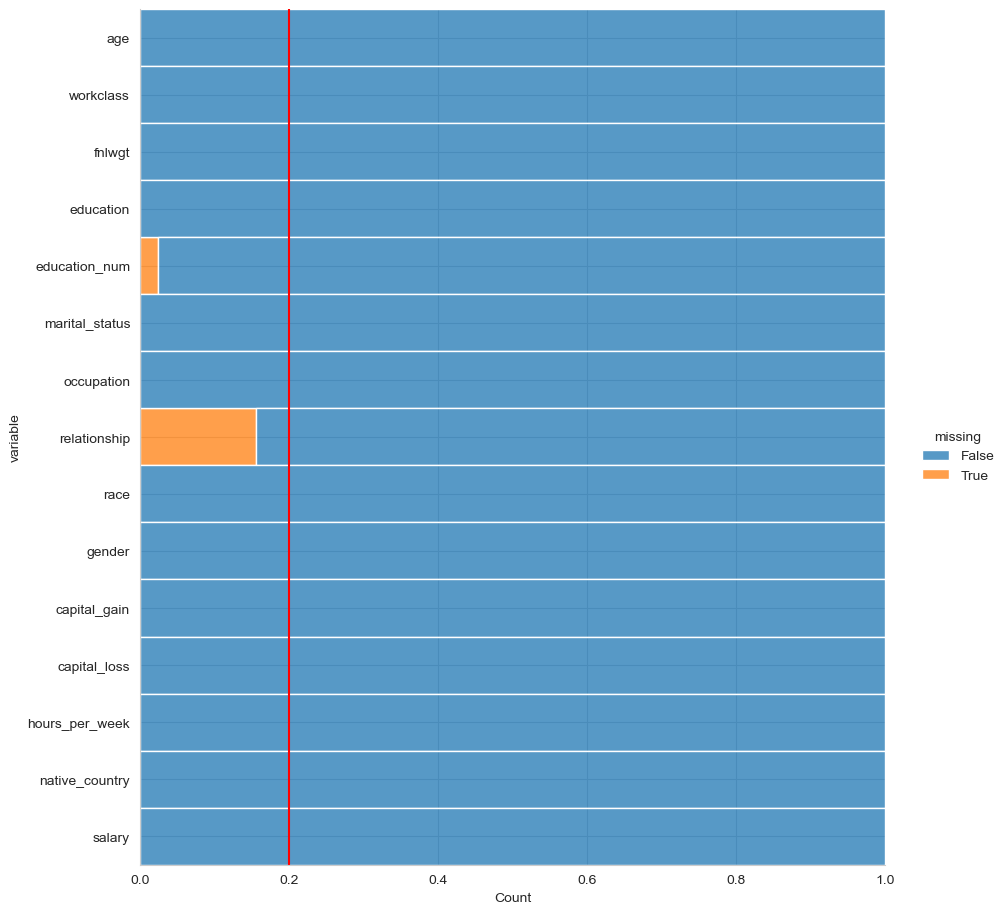

In [18]:
show_nulls(df)

### 2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

In [19]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [20]:
print('Descriptive Statistics of Categorical Features:\n', )

df.describe(include="object").T

Descriptive Statistics of Categorical Features:



count unique                 top   freq
workclass       32537      9             Private  22673
education       32537     16             HS-grad  10494
marital_status  32537      7  Married-civ-spouse  14970
occupation      32537     15      Prof-specialty   4136
relationship    27473      5             Husband  13187
race            32537      5               White  27795
gender          32537      2                Male  21775
native_country  32537     42       United-States  29153
salary          32537      2               <=50K  24698

**Assign the Columns (Features) of object data type as** **``"object_col"``**

In [21]:
object_col = df.select_dtypes(include='O').columns
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'salary'],
      dtype='object')

In [22]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

workclass
----------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
----------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
----------------------------------------
marital_status
----------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418


**Check if the Dataset has any Question Mark** **``"?"``**

In [23]:
df.isin(["?"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
gender            False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool

# Univariate & Multivariate Analysis

Examine all features (first target feature("salary"), then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.

**to do list for numeric features:**
1. Check the boxplot to see extreme values 
2. Check the histplot/kdeplot to see distribution of feature
3. Check the statistical values
4. Check the boxplot and histplot/kdeplot by "salary" levels
5. Check the statistical values by "salary" levels
6. Write down the conclusions you draw from your analysis

**to do list for categoric features:**
1. Find the features which contains similar values, examine the similarities and analyze them together 
2. Check the count/percentage of person in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count of person in each "salary" levels by categories and visualize it with a suitable plot
5. Check the percentage distribution of person in each "salary" levels by categories and visualize it with suitable plot
6. Check the count of person in each categories by "salary" levels and visualize it with a suitable plot
7. Check the percentage distribution of person in each categories by "salary" levels and visualize it with suitable plot
8. Write down the conclusions you draw from your analysis

**Note :** Instruction/direction for each feature is available under the corresponding feature in detail, as well.

## Salary (Target Feature)

**Check the count of person in each "salary" levels and visualize it with a countplot**

In [24]:
df["salary"].value_counts(dropna = False)

<=50K    24698
>50K      7839
Name: salary, dtype: int64

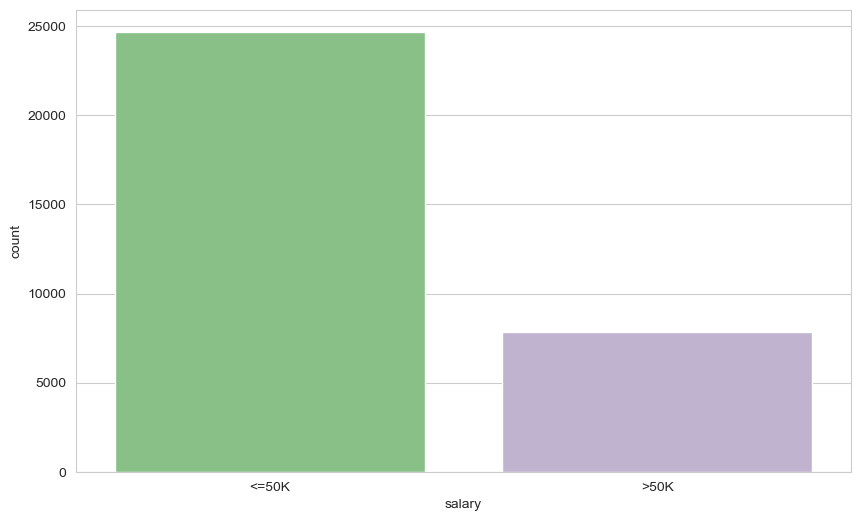

In [25]:
sns.countplot(data = df, x="salary", palette="Accent");

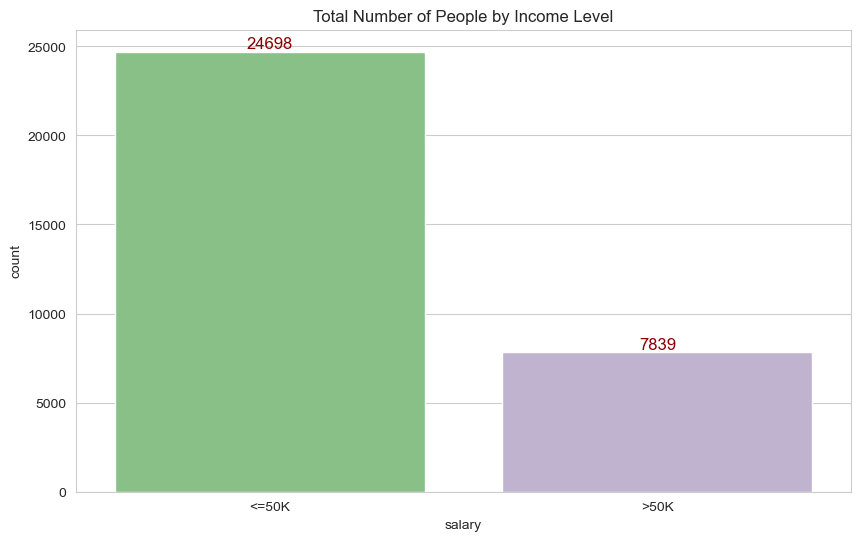

In [26]:
fig, ax = plt.subplots()

ax = sns.countplot(data = df, x = "salary", palette = "Accent")
ax.set_title("Total Number of People by Income Level", fontsize = 12)

ax.bar_label(ax.containers[0], color = "darkred", size = 12);

**Check the percentage of person in each "salary" levels and visualize it with a pieplot**

In [27]:
df.salary.value_counts(normalize = True)

<=50K   0.759
>50K    0.241
Name: salary, dtype: float64

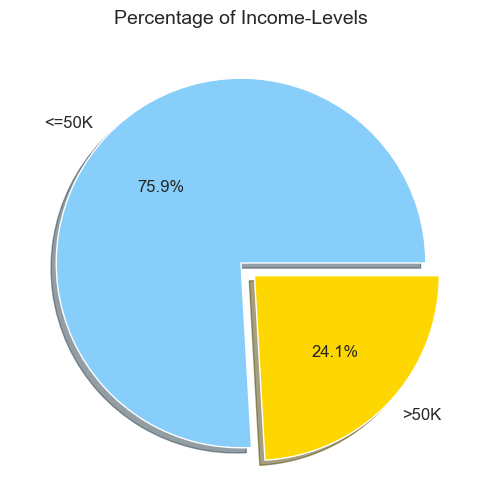

In [28]:
fig, ax = plt.subplots(figsize = (6, 6))

ax.pie(x=df.salary.value_counts().values, 
       labels=['<=50K', '>50K'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
            )

plt.title("Percentage of Income-Levels", fontdict = {'fontsize': 14})
plt.show()

**Result :** While 75% of the individuals in the data set are at the low-income level, 25% are at the high-income level.

## Numeric Features

## age

**Check the boxplot to see extreme values**

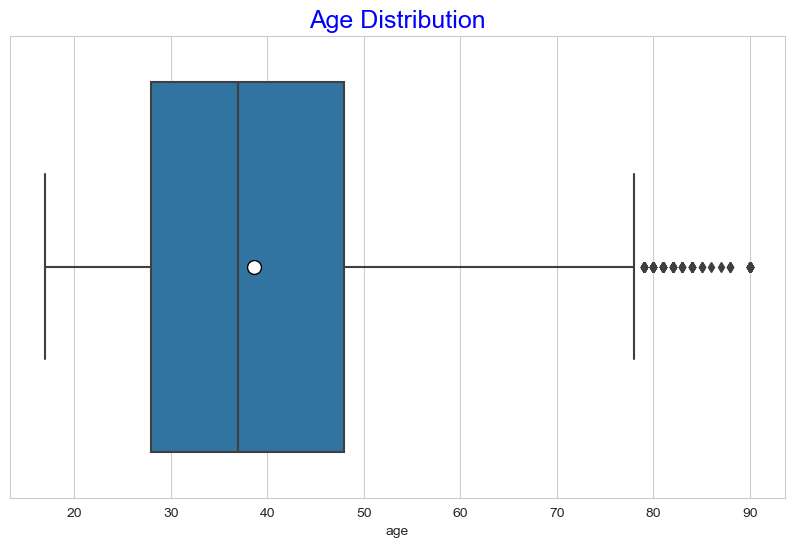

In [29]:
sns.boxplot(data=df, 
            x="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Age Distribution", fontsize=18, color="b");

**Check the histplot/kdeplot to see distribution of feature**

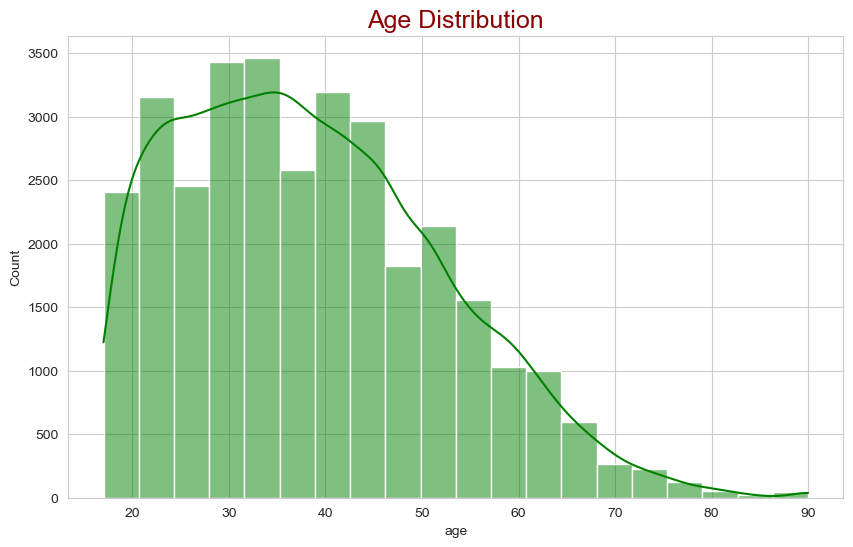

In [30]:
sns.histplot(data=df, x="age", bins=20, kde=True, color="g")

plt.title("Age Distribution", fontsize=18, color="darkred");

**Check the statistical values**

In [31]:
print(colored('Descriptive Statistics of the Age Feature:\n', 'blue', attrs=['bold']))

df.age.describe()

Descriptive Statistics of the Age Feature:



count   32537.000
mean       38.586
std        13.638
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

In [32]:
def show_distribution(col):
    
    '''
    
    This function will prints a Histogram and box plot which are graphical representations 
    for the frequency of numeric data values. It aims to describe the data and explore 
    the central tendency and variability before using advanced statistical analysis techniques. 
    
    '''
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))    
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))
    
    
#     # Get statistics
#     from termcolor import colored

#     print(colored('Statistical Calculations :', 'red', attrs=['bold']))
#     print(colored('-'*26, 'red', attrs=['bold']))
#     min_val = df[col1].min()
#     max_val = df[col1].max()
#     mean_val = df[col1].mean()
#     med_val = df[col1].median()
#     mod_val = df[col1].mode()[0]

#     print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
#                                                                                              mean_val,
#                                                                                              med_val,
#                                                                                              mod_val,
#                                                                                              max_val), 'blue', attrs=['bold']))
    
    
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(15, 15))

    # Plot the histogram   
    ax[0].hist(col, bins=30)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val,  color='yellow',     linestyle='dashed', linewidth=2, label='Minimum')
    ax[0].axvline(x=mean_val, color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val,  color='cyan',       linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=mod_val,  color='purple',     linestyle='dashed', linewidth=2, label='Mode')
    ax[0].axvline(x=max_val,  color='red',        linestyle='dashed', linewidth=2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot   
    medianprops = dict(linestyle='-', linewidth=3, color='m')
    boxprops=dict(linestyle='-', linewidth=1.5)
    meanprops={"marker":"d", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"}
    flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'fuchsia'}
    
    ax[1].boxplot(col, 
                  vert=False,
                  notch=True, 
                  patch_artist=False,
                  medianprops=medianprops,
                  flierprops=flierprops,
                  showmeans=True,
                  meanprops=meanprops)
    
    ax[1].set_xlabel('value', fontsize=10)
    

    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=15)

Statistical Calculations :
--------------------------
Minimum:  17.00
Mean:     38.59
Median:   37.00
Mode:     36.00
Maximum:  90.00



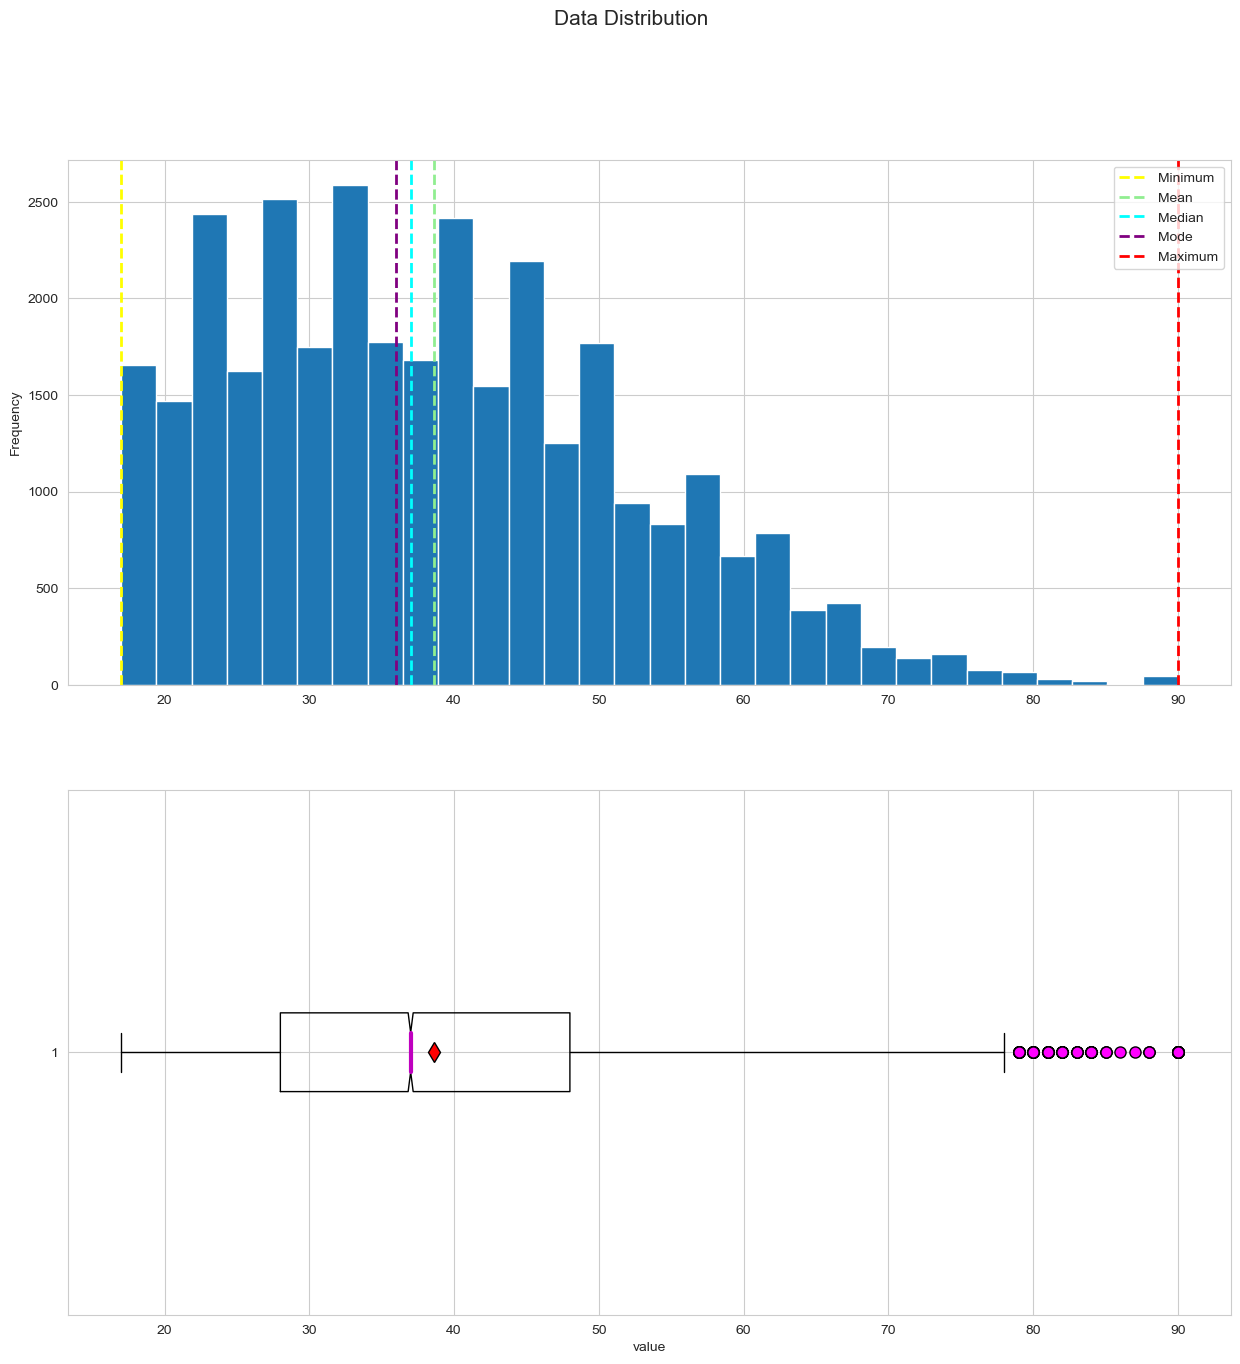

In [33]:
show_distribution(df["age"])

**Check the boxplot and histplot/kdeplot by "salary" levels**

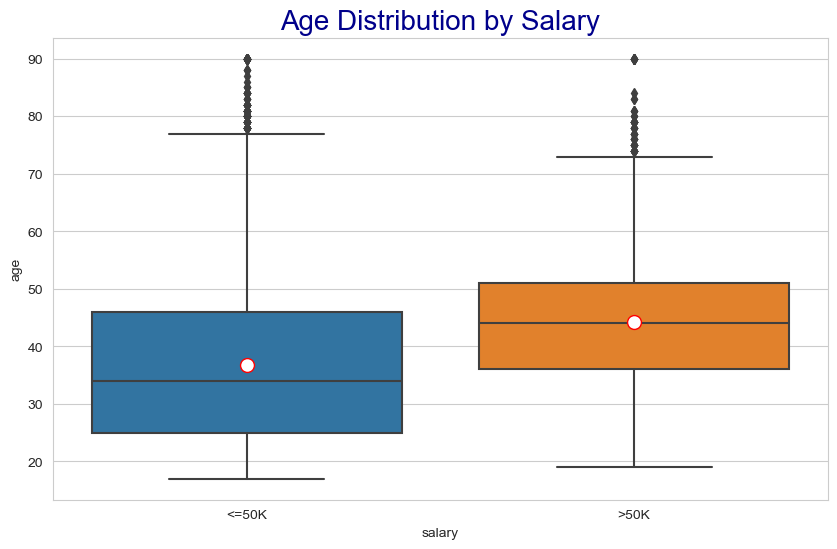

In [34]:
sns.boxplot(data=df, 
            x="salary", 
            y="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"red",
                       "markersize":"10"})

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

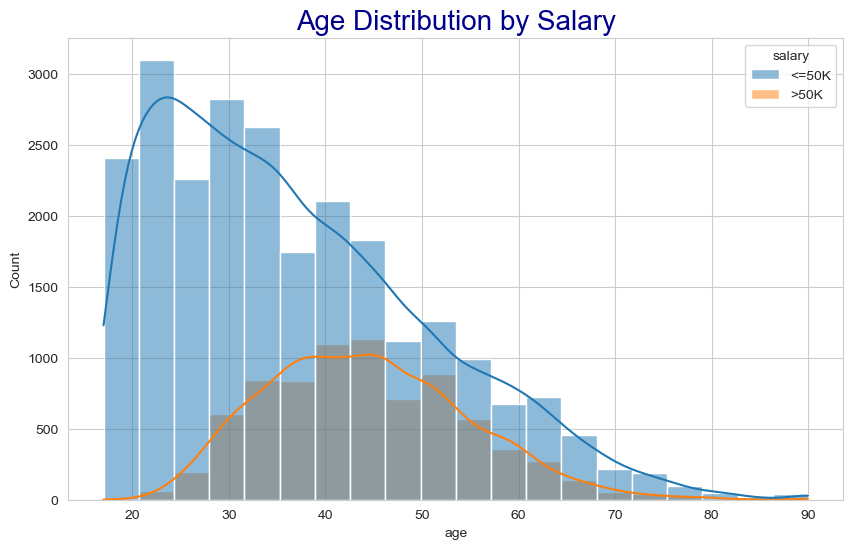

In [35]:
sns.histplot(data=df, x="age", bins= 20, kde=True, hue="salary")

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

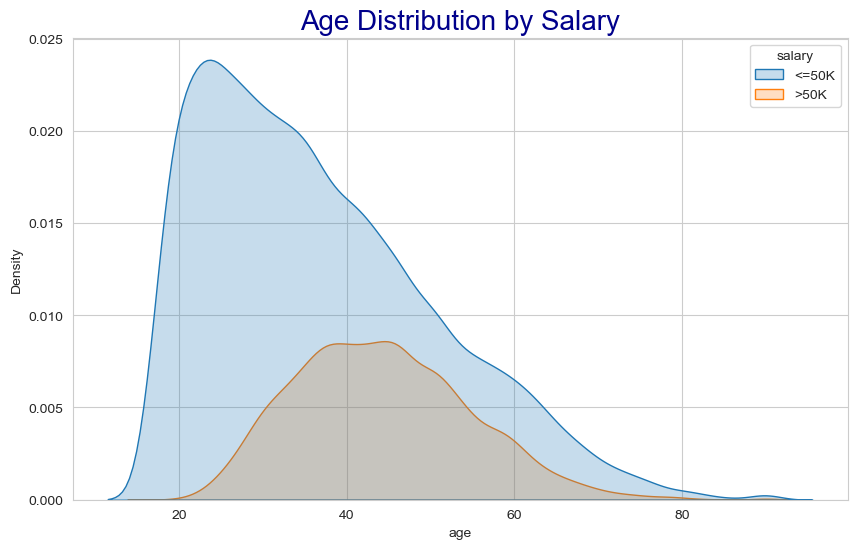

In [36]:
sns.kdeplot(data=df, x="age", hue="salary", fill=True)

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

**Check the statistical values by "salary" levels**

In [37]:
print(colored('Descriptive Statistics of the Age by Salary:\n', 'blue', attrs=['bold']))

df.groupby("salary").age.describe()

Descriptive Statistics of the Age by Salary:



count   mean    std    min    25%    50%    75%    max
salary                                                           
<=50K  24698.000 36.787 14.017 17.000 25.000 34.000 46.000 90.000
>50K    7839.000 44.251 10.520 19.000 36.000 44.000 51.000 90.000

**Result :** The mean and median age of the high-income group is higher than the low-income group. It means the older generation possesses more wealth than the young.

 fnlwgt

In [38]:
df.head(1).T

0
age                        39
workclass           State-gov
fnlwgt                  77516
education           Bachelors
education_num          13.000
marital_status  Never-married
occupation       Adm-clerical
relationship    Not-in-family
race                    White
gender                   Male
capital_gain             2174
capital_loss                0
hours_per_week             40
native_country  United-States
salary                  <=50K

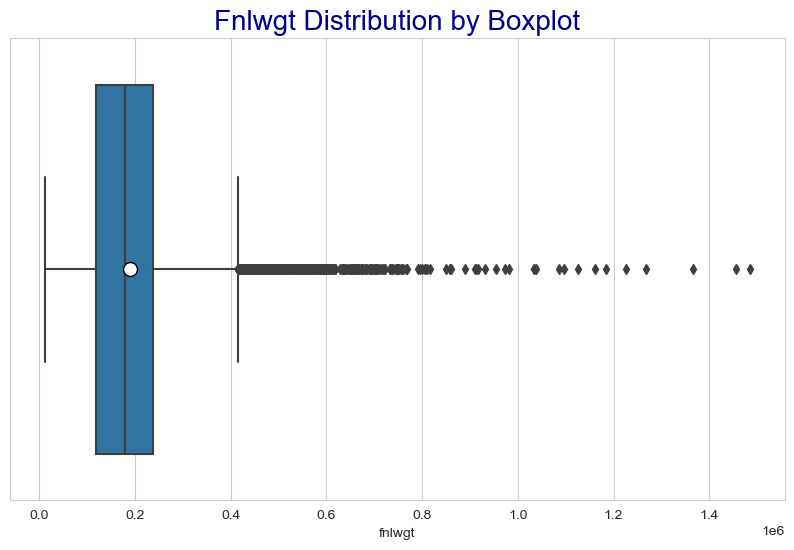

In [39]:
sns.boxplot(data = df, 
            x= "fnlwgt",
           showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Fnlwgt Distribution by Boxplot", fontsize=20, color="darkblue");

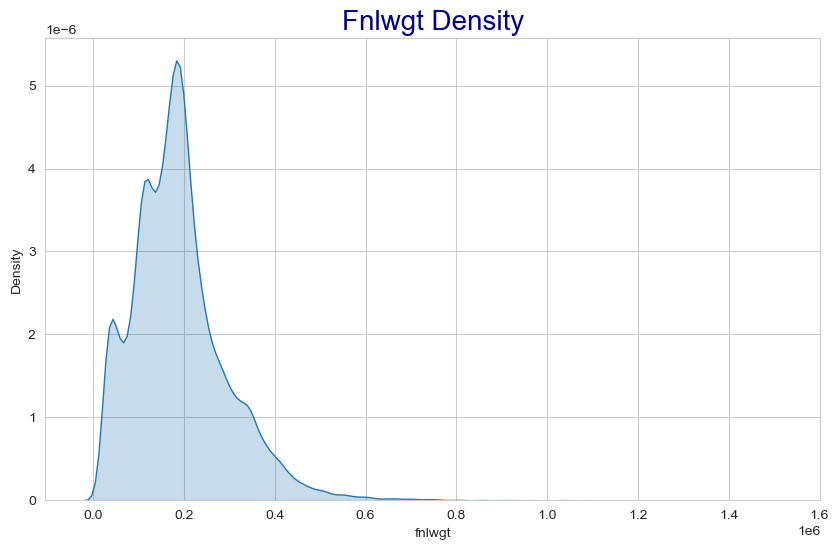

In [40]:
sns.kdeplot(data = df, x= "fnlwgt", fill=True)

plt.title("Fnlwgt Density", fontsize=20, color="darkblue");

In [41]:
print(colored('Descriptive Statistics of the "fnlwgt" Feature:\n', 'blue', attrs=['bold']))

df.fnlwgt.describe()

Descriptive Statistics of the "fnlwgt" Feature:



count     32537.000
mean     189780.849
std      105556.471
min       12285.000
25%      117827.000
50%      178356.000
75%      236993.000
max     1484705.000
Name: fnlwgt, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

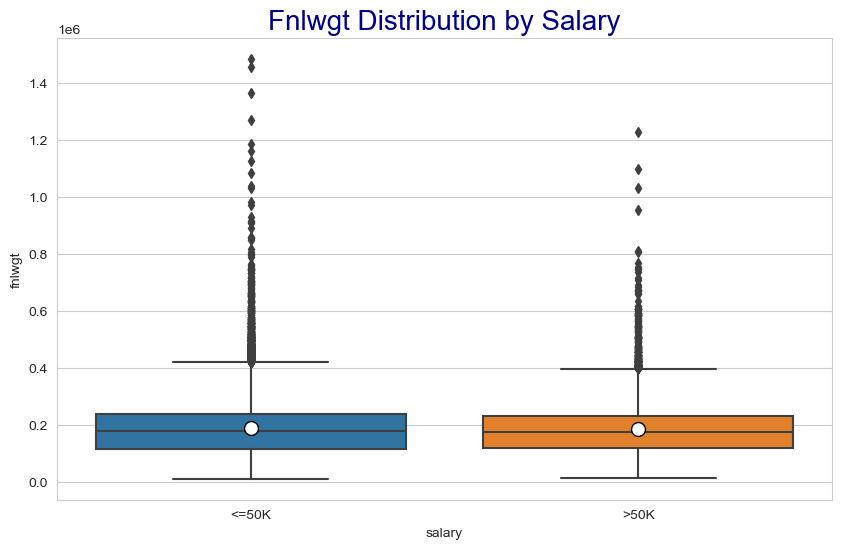

In [42]:
sns.boxplot(data=df, 
            x="salary", 
            y="fnlwgt",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Fnlwgt Distribution by Salary", fontsize=20, color="darkblue");

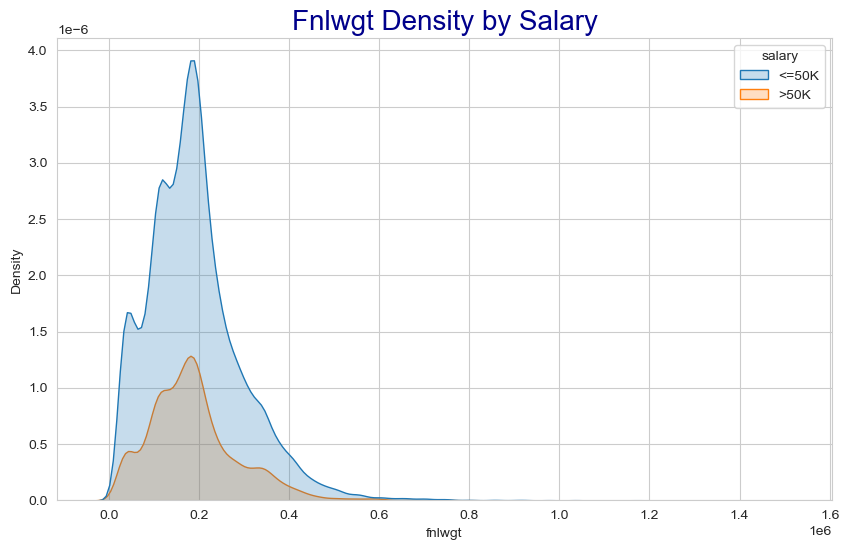

In [43]:
sns.kdeplot(data=df, x="fnlwgt", hue="salary", fill=True)

plt.title("Fnlwgt Density by Salary", fontsize=20, color="darkblue");

In [44]:
df.groupby("salary").fnlwgt.describe()

count       mean        std       min        25%        50%  \
salary                                                                   
<=50K  24698.000 190345.927 106487.413 12285.000 117606.000 179465.000   
>50K    7839.000 188000.481 102554.464 14878.000 119100.000 176063.000   

              75%         max  
salary                         
<=50K  238968.250 1484705.000  
>50K   230969.000 1226583.000

In [45]:
def show_compare(df, col1, col2):
    
    '''
    This function makes comparison among subcategories of target variable according to another variable.
    ''' 
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))
    min_val = df[col1].min()
    max_val = df[col1].max()
    mean_val = df[col1].mean()
    med_val = df[col1].median()
    mod_val = df[col1].mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))

    fig, ax = plt.subplots(figsize=(12, 6))

    ax = sns.kdeplot(data=df, x=col1, hue=col2, fill=True)
    
    plt.title("Data Density", fontsize=20, color="darkblue")

    h, l = ax.get_legend_handles_labels()

    legend_elements1 = [Line2D([0], [0], marker='s', color='lightblue', label=df[col2].unique()[0], markersize=15),
                       Line2D([0], [0], marker='s', color='orange', label=df[col2].unique()[1], markersize=15)]
    l1 = plt.legend(handles=legend_elements1, title='Salary Type', bbox_to_anchor=(0.84, 1))

    legend_elements2 = [Line2D([0], [0], color='green',  label='Overall Mean',   markersize=15, linestyle='dashed'),
                        Line2D([0], [0], color='blue',   label='Group_1 Mean', markersize=15, linestyle='-'),
                        Line2D([0], [0],  color='orange', label='Group_2 Mean', markersize=15, linestyle='-'),
                        Line2D([0], [0],  color='red',    label='Median', markersize=15, linestyle='dashed'),
                        Line2D([0], [0],  color='yellow', label="Mode",   markersize=15, linestyle='dashed')]
    l2 = plt.legend(handles=legend_elements2,
                    title=f"Overall Mean {round(df[col1].mean(), 2)}\
                    \nGroup_1 Mean {round(df.groupby([col2])[col1].mean()[0], 2)}\
                    \nGroup_2 Mean {round(df.groupby([col2])[col1].mean()[1], 2)}\
                    \nOverall Median {round(np.median(df[col1]), 2)}\
                    \nOverall Mode {round(df[col1].mode()[0], 2)}", 
                    bbox_to_anchor=(0.9, 0.81))

    plt.axvline(x=df[col1].mean(),    color='green',   linestyle='dashed', linewidth=2, label='Overall Mean')
    plt.axvline(x=df[col1].median(),  color='red',     linestyle='dashed', linewidth=2, label='Overall Median')
    plt.axvline(x=df[col1].mode()[0], color='yellow',  linestyle='dashed', linewidth=2, label='Overall Mode')
    
    
    group_mean1 = df.groupby([col2])[col1].mean()[0]
    group_mean2 = df.groupby([col2])[col1].mean()[1]
    
    plt.axvline(x=group_mean1, color='blue',  linestyle='-', linewidth=2, label='Group Mean')
    plt.axvline(x=group_mean2, color='orange',  linestyle='-', linewidth=2, label='Group Mean')    


    ax.add_artist(l1); # we need this because the 2nd call to legend() erases the first one

Statistical Calculations :
--------------------------
Minimum:12285.00
Mean: 189780.85
Median:178356.00
Mode: 123011.00
Maximum:1484705.00



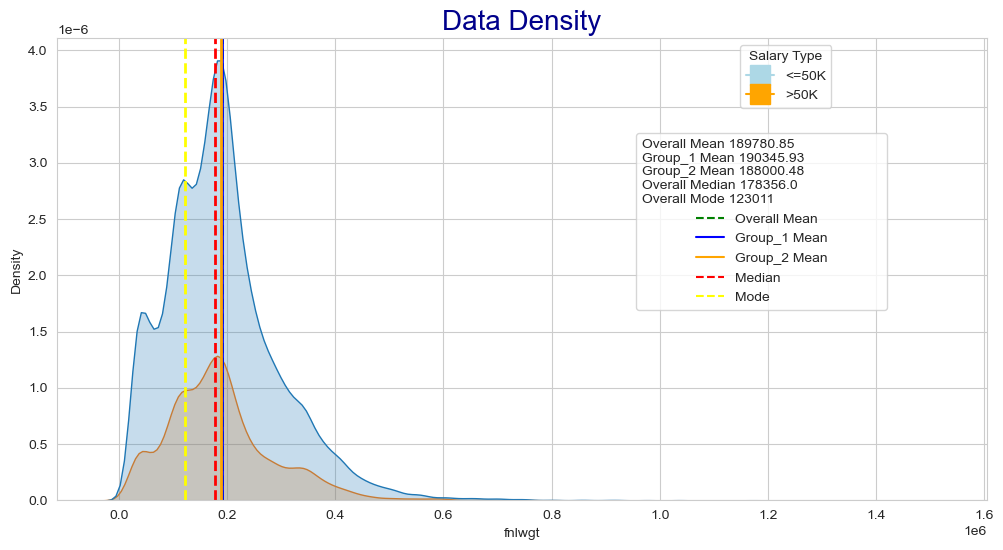

In [46]:
show_compare(df, "fnlwgt", "salary")

**Result :** There is no significant difference between high and low-income groups according to the "fnlwgt" feature.

**----------------------------------**

**capital_gain**

*Check the boxplot to see extreme values*

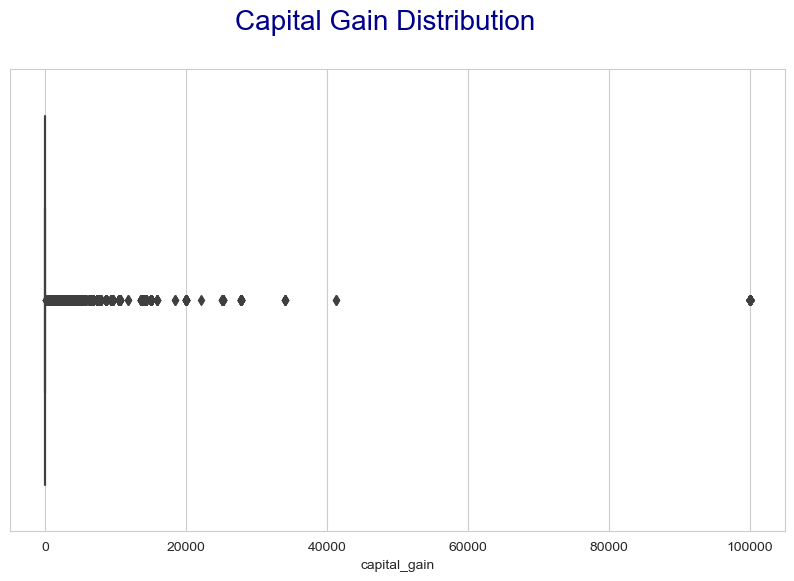

In [47]:
sns.boxplot(data=df, x="capital_gain")

plt.suptitle("Capital Gain Distribution", fontsize=20, color="darkblue");

In [48]:
df["capital_gain"].mean()

1078.4437409718166

**Check the histplot/kdeplot to see distribution of feature**

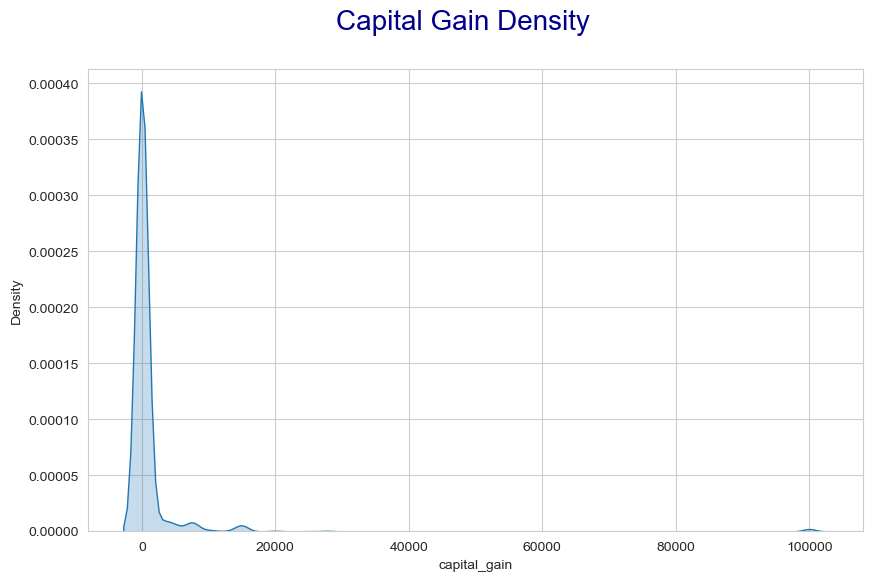

In [49]:
sns.kdeplot(data=df, x="capital_gain", fill=True)

plt.suptitle("Capital Gain Density", fontsize=20, color="darkblue");

**Check the statistical values**

In [50]:
print(colored('Descriptive Statistics of the "capital_gain" Feature:\n', 'blue', attrs=['bold']))

df.capital_gain.describe()

Descriptive Statistics of the "capital_gain" Feature:



count   32537.000
mean     1078.444
std      7387.957
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital_gain, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

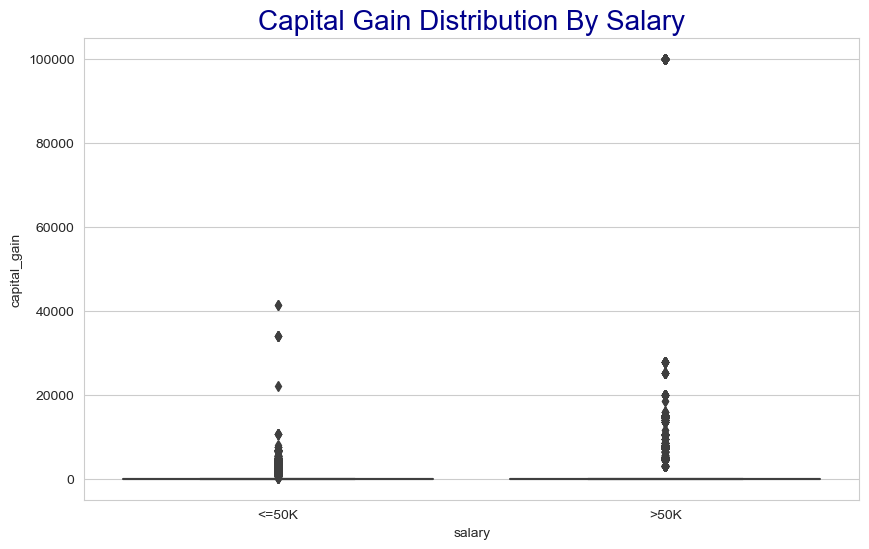

In [51]:
sns.boxplot(data=df, x="salary", y="capital_gain")

plt.title("Capital Gain Distribution By Salary", fontsize=20, color='darkblue');

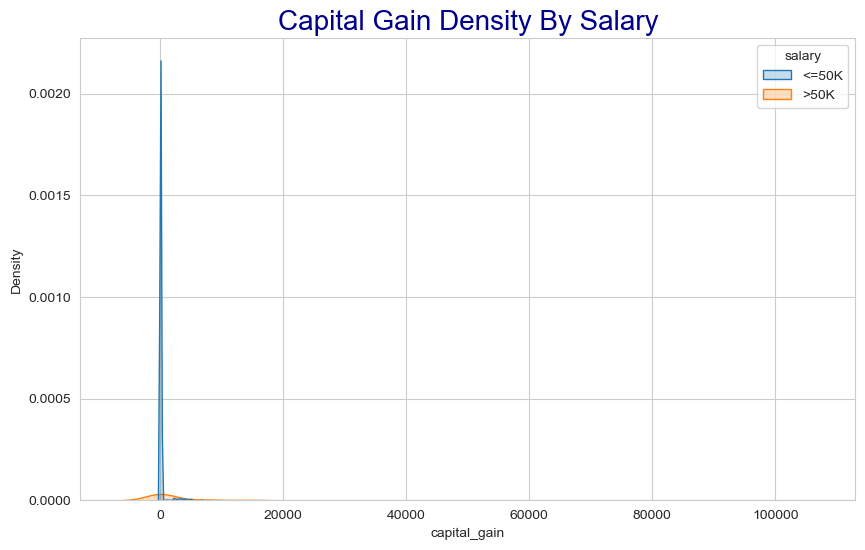

In [52]:
sns.kdeplot(data=df, x="capital_gain", hue="salary", fill=True)

plt.title("Capital Gain Density By Salary", fontsize=20, color='darkblue');

**Check the statistical values by "salary" levels**

In [53]:
print(colored('Descriptive Statistics of the "capital_gain" by Salary:\n', 'blue', attrs=['bold']))

df.groupby("salary").capital_gain.describe()

Descriptive Statistics of the "capital_gain" by Salary:



count     mean       std   min   25%   50%   75%       max
salary                                                               
<=50K  24698.000  148.885   963.558 0.000 0.000 0.000 0.000 41310.000
>50K    7839.000 4007.165 14572.097 0.000 0.000 0.000 0.000 99999.000

**Check the statistical values by "salary" levels for capital_gain not equal the zero**

In [54]:
print(colored('Descriptive Statistics of the "capital_gain != 0" by Salary :\n', 'blue', attrs=['bold']))

df[df.capital_gain != 0].groupby("salary").capital_gain.describe()

Descriptive Statistics of the "capital_gain != 0" by Salary :



count      mean       std      min      25%      50%       75%  \
salary                                                                     
<=50K  1035.000  3552.813  3173.419  114.000 2202.000 3273.000  4101.000   
>50K   1677.000 18731.165 26778.676 3103.000 7298.000 7896.000 15024.000   

             max  
salary            
<=50K  41310.000  
>50K   99999.000

Statistical Calculations :
--------------------------
Minimum:   0.00
Mean:   1078.44
Median:    0.00
Mode:      0.00
Maximum:99999.00



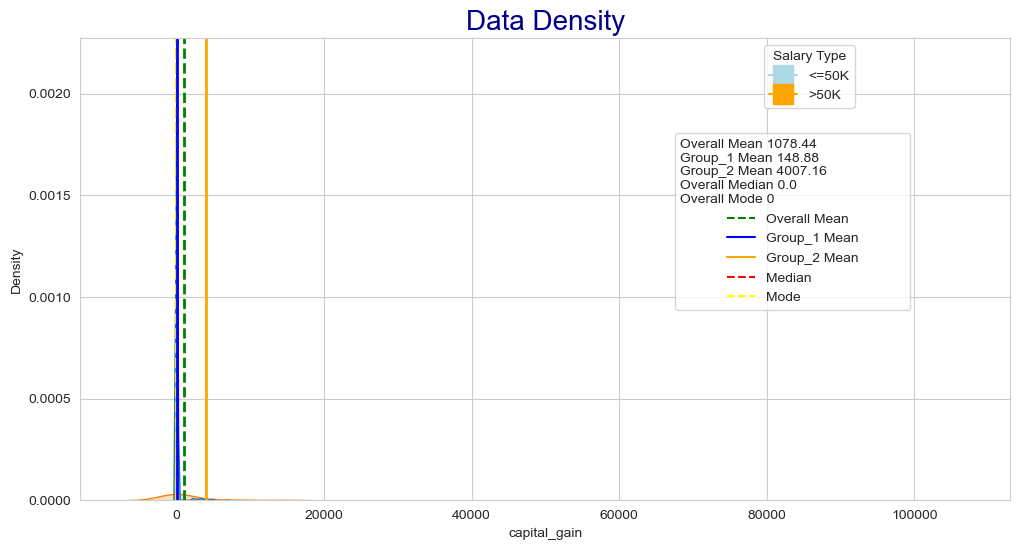

In [55]:
show_compare(df, "capital_gain", "salary")

**Result :** The "capital-gain" feature has not provided very meaningful insights. Nevertheless, we can say that the more "capital-gain", the more "high-income".

**---------------------------**

**capital_loss**

*Check the boxplot to see extreme values*

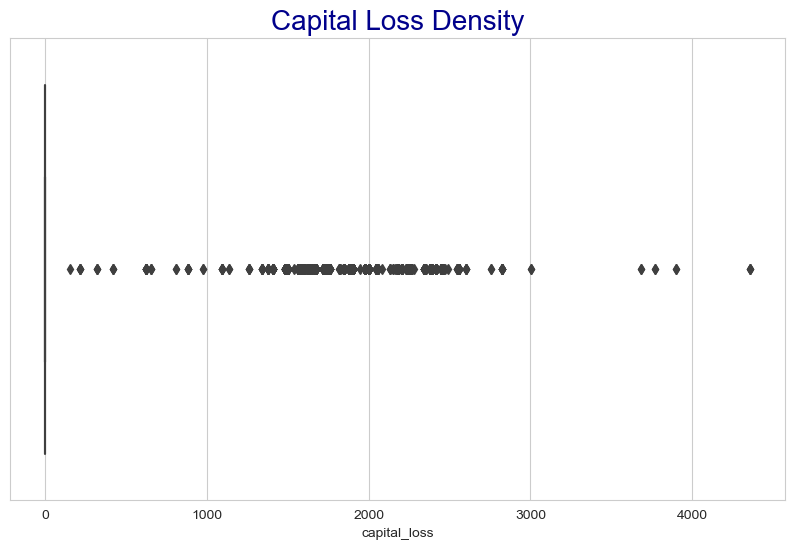

In [56]:
sns.boxplot(data=df, x="capital_loss")

plt.title("Capital Loss Distribution", fontsize=20, color='darkblue')

plt.title("Capital Loss Density", fontsize=20, color='darkblue');

*Check the histplot/kdeplot to see distribution of feature*

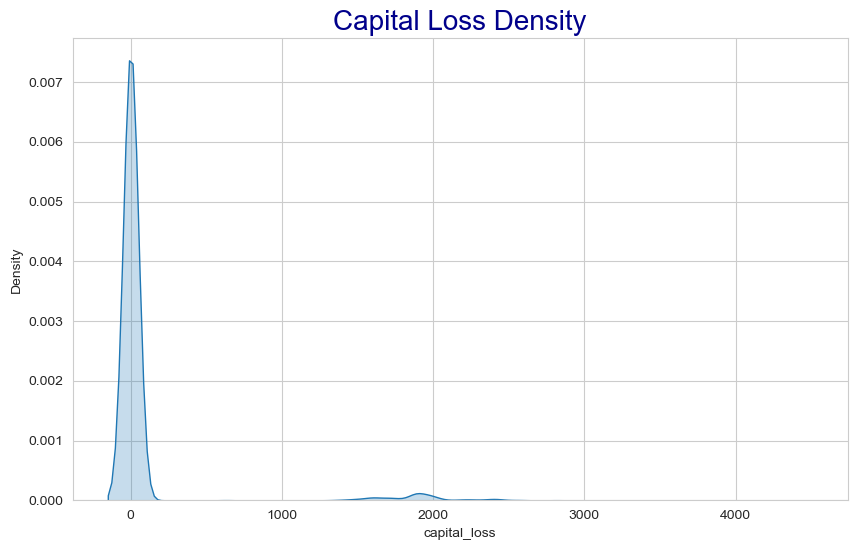

In [57]:
sns.kdeplot(data=df, x="capital_loss", fill=True)

plt.title("Capital Loss Density", fontsize=20, color='darkblue');

*Check the statistical values*

In [58]:
print(colored('Descriptive Statistics of the "capital_loss" Feature:\n', 'blue', attrs=['bold']))

df.capital_loss.describe()

Descriptive Statistics of the "capital_loss" Feature:



count   32537.000
mean       87.368
std       403.102
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital_loss, dtype: float64

*Check the boxplot and histplot/kdeplot by "salary" levels*

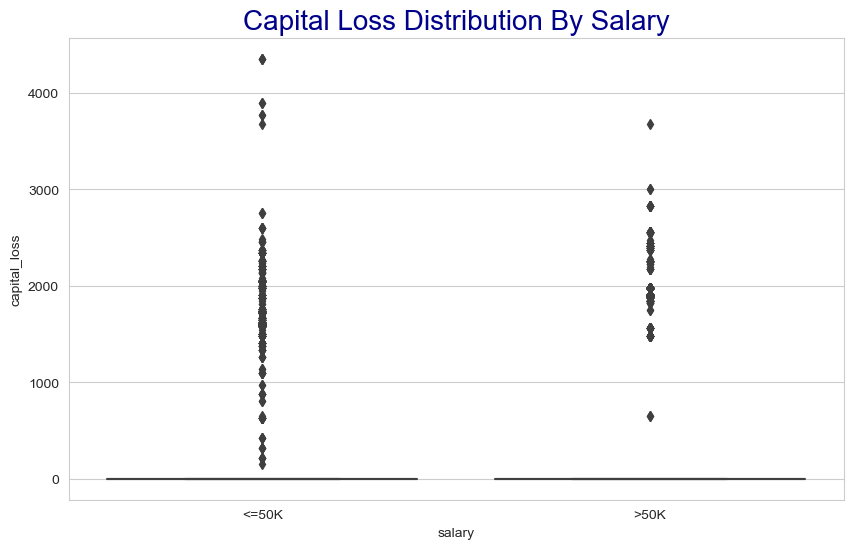

In [59]:
sns.boxplot(data=df, x="salary", y="capital_loss")

plt.title("Capital Loss Distribution By Salary", fontsize=20, color='darkblue');

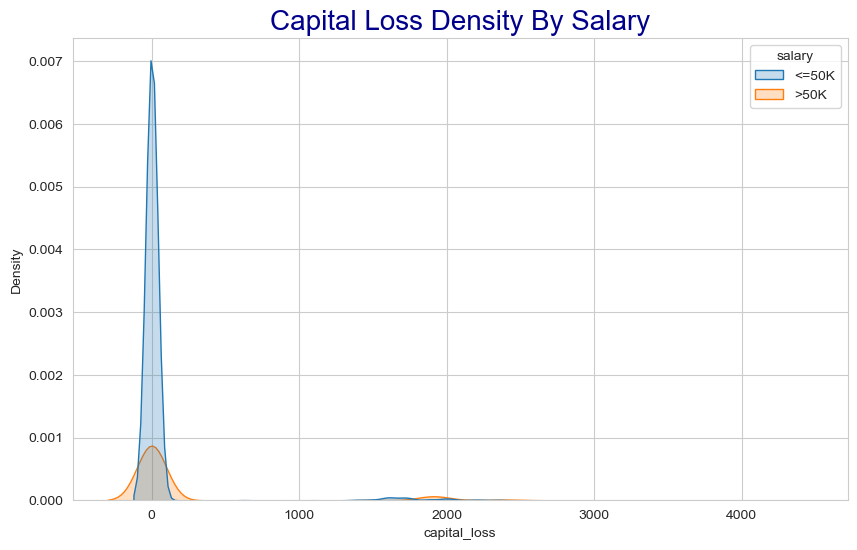

In [60]:
sns.kdeplot(data=df, x="capital_loss", hue="salary", fill=True);

plt.title("Capital Loss Density By Salary", fontsize=20, color='darkblue');

*Check the statistical values by "salary" levels*

In [61]:
print(colored('Descriptive Statistics of the "capital_loss" by Salary :\n', 'blue', attrs=['bold']))

df.groupby("salary").capital_loss.describe()

Descriptive Statistics of the "capital_loss" by Salary :



count    mean     std   min   25%   50%   75%      max
salary                                                           
<=50K  24698.000  53.190 310.890 0.000 0.000 0.000 0.000 4356.000
>50K    7839.000 195.051 595.555 0.000 0.000 0.000 0.000 3683.000

*Check the statistical values by "salary" levels for capital_loss not equel the zero*

In [62]:
print(colored('Descriptive Statistics of the "capital_loss != 0" by Salary :\n', 'blue', attrs=['bold']))

df[df.capital_loss != 0].groupby("salary").capital_loss.describe()

Descriptive Statistics of the "capital_loss != 0" by Salary :



count     mean     std     min      25%      50%      75%      max
salary                                                                     
<=50K  746.000 1760.983 438.906 155.000 1590.000 1721.000 1980.000 4356.000
>50K   773.000 1978.017 264.144 653.000 1887.000 1902.000 1977.000 3683.000

**Result :** The percentage of those who have capital_lost is much higher for those earning more than 50K.

**--------------------**

**hours_per_week**

*Check the boxplot to see extreme values*

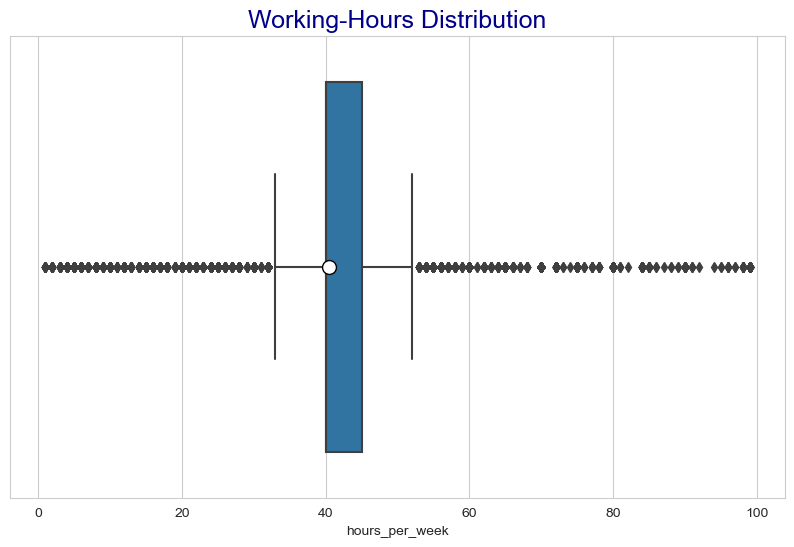

In [63]:
sns.boxplot(data=df, 
            x="hours_per_week",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Working-Hours Distribution", fontsize=18, color='darkblue');

*Check the histplot/kdeplot to see distribution of feature*

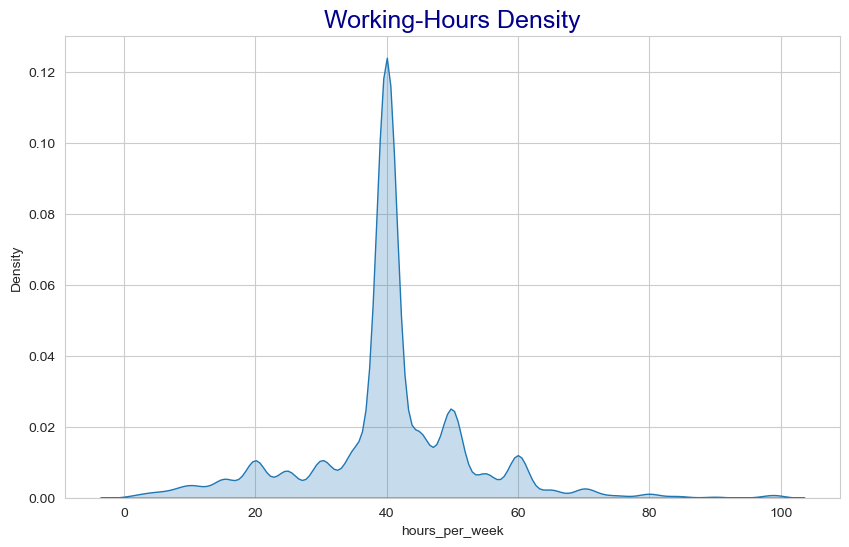

In [64]:
sns.kdeplot(data=df, x="hours_per_week", fill=True)

plt.title("Working-Hours Density", fontsize=18, color='darkblue');

*Check the statistical values*

In [65]:
print(colored('Descriptive Statistics of the "hours_per_week" :\n', 'blue', attrs=['bold']))

df["hours_per_week"].describe()

Descriptive Statistics of the "hours_per_week" :



count   32537.000
mean       40.440
std        12.347
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours_per_week, dtype: float64

*Check the boxplot and histplot/kdeplot by "salary" levels*

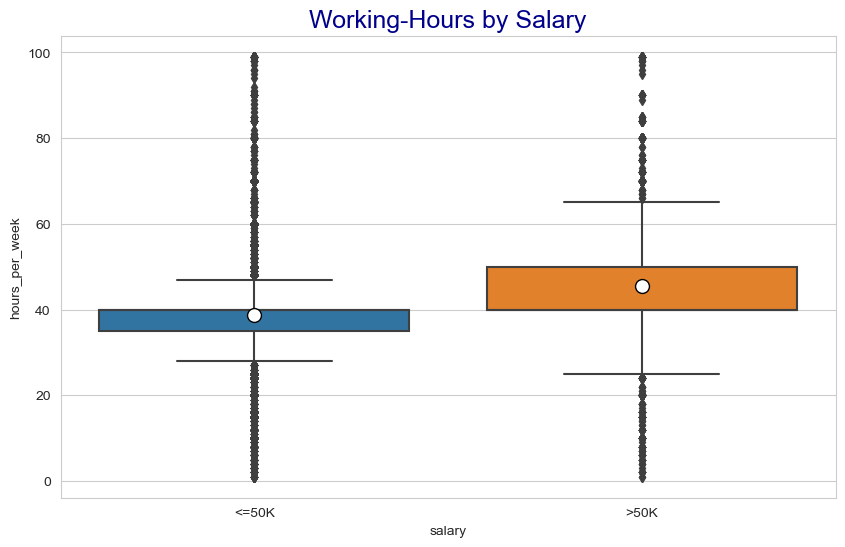

In [66]:
sns.boxplot(data=df, 
            x="salary", 
            y="hours_per_week",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Working-Hours by Salary", fontsize=18, color='darkblue');  

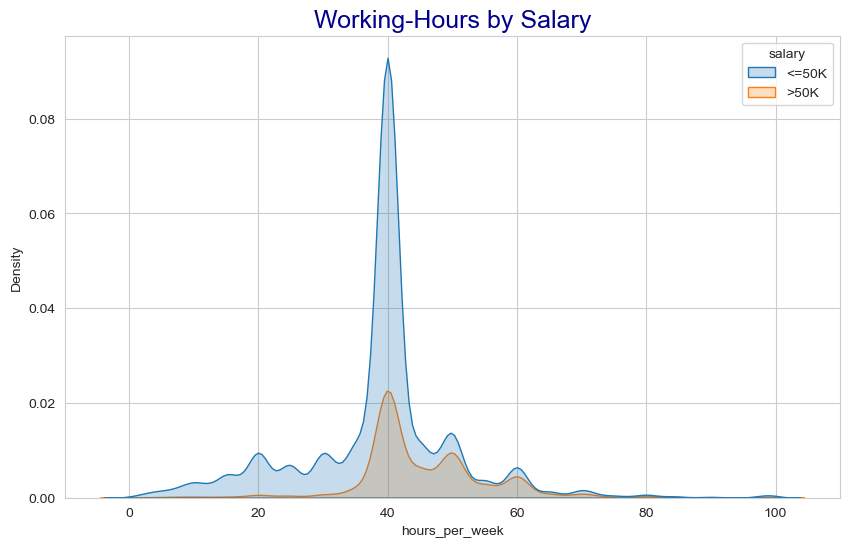

In [67]:
sns.kdeplot(data=df, x="hours_per_week", hue="salary", fill=True)

plt.title("Working-Hours by Salary", fontsize=18, color='darkblue');

*Check the statistical values by "salary" levels*

In [68]:
print(colored('Descriptive Statistics of the "hours_per_week" by Salary :\n', 'blue', attrs=['bold']))

df.groupby("salary").hours_per_week.describe()

Descriptive Statistics of the "hours_per_week" by Salary :



count   mean    std   min    25%    50%    75%    max
salary                                                          
<=50K  24698.000 38.843 12.318 1.000 35.000 40.000 40.000 99.000
>50K    7839.000 45.473 11.014 1.000 40.000 40.000 50.000 99.000

In [69]:
df.hours_per_week.mean()

40.44032947106371

**Result :**  To be in a high-income group, almost at least 40 hours working per week is required. Most of those who work less than 40 hours per week are in the low-income group.

**-------------------**

**See the relationship between each numeric features by target feature (salary) in one plot basically**

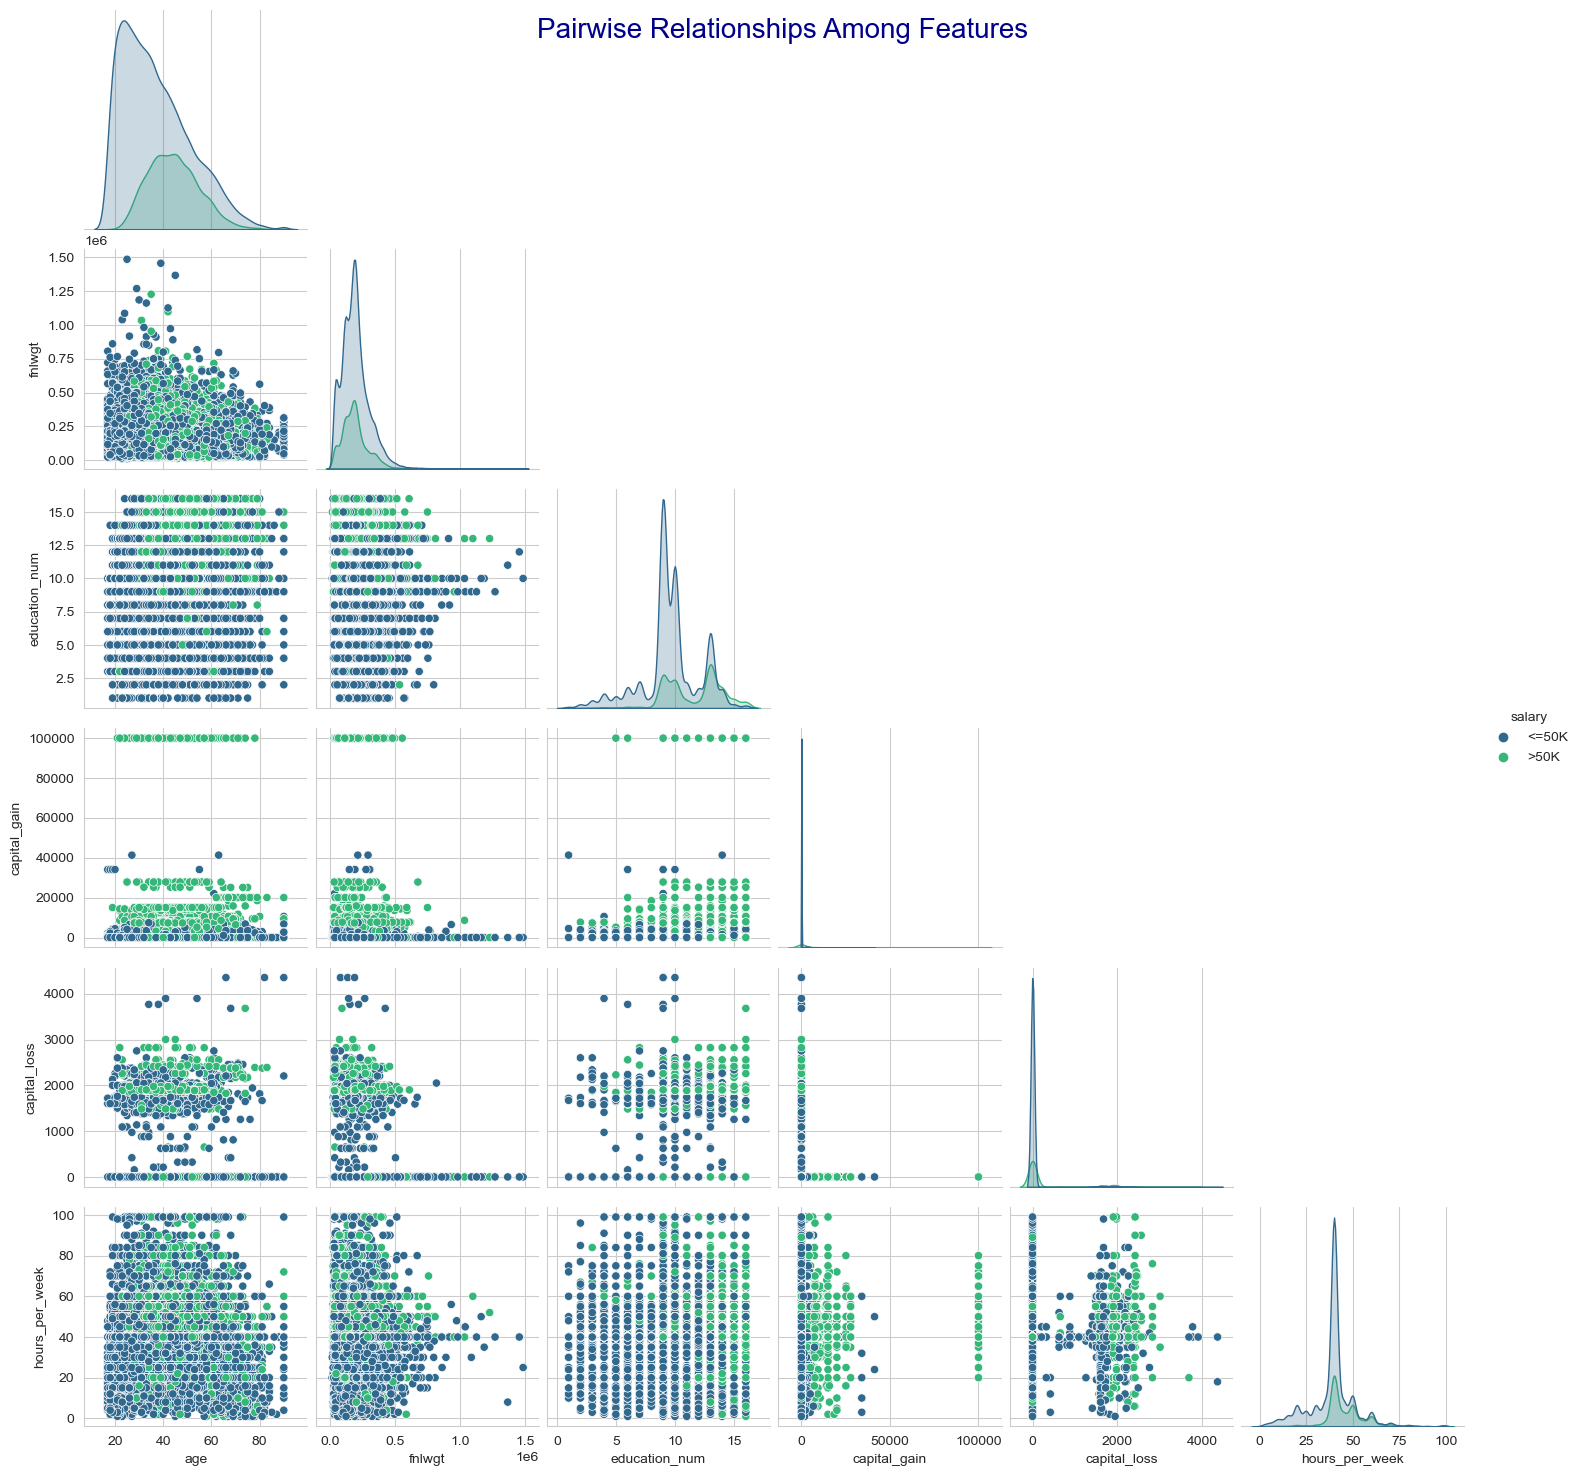

In [70]:
g = sns.pairplot(df, hue="salary", palette="viridis", corner=True)

g.fig.suptitle("Pairwise Relationships Among Features", fontsize=20, color='darkblue'); 

In [71]:
df.education_num.unique()

array([13.,  9.,  7., 14.,  5., 10., 12., nan,  4., 16., 11., 15.,  3.,
        6.,  2.,  1.,  8.])

In [72]:
print(sorted(list(df.education_num.unique())))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, nan, 15.0, 16.0]


In [73]:
df.education_num.sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., nan])

**Categorical Features**

**education & education_num**

*Detect the similarities between these features by comparing unique values*

In [74]:
df.education.value_counts(dropna=False)

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [75]:
df.education_num.value_counts(dropna=False)

9.000     10208
10.000     7089
13.000     5245
14.000     1686
11.000     1343
7.000      1146
12.000     1044
6.000       916
NaN         802
4.000       630
15.000      559
5.000       503
8.000       424
16.000      405
3.000       329
2.000       159
1.000        49
Name: education_num, dtype: int64

In [76]:
df.groupby('education').education_num.value_counts(dropna=False)

education     education_num
10th          6.000              916
              NaN                 17
11th          7.000             1146
              NaN                 29
12th          8.000              424
              NaN                  9
1st-4th       2.000              159
              NaN                  7
5th-6th       3.000              329
              NaN                  3
7th-8th       4.000              630
              NaN                 15
9th           5.000              503
              NaN                 11
Assoc-acdm    12.000            1044
              NaN                 23
Assoc-voc     11.000            1343
              NaN                 39
Bachelors     13.000            5245
              NaN                108
Doctorate     16.000             405
              NaN                  8
HS-grad       9.000            10208
              NaN                286
Masters       14.000            1686
              NaN                 36
Preschool 

*Visualize the count of person in each categories for these features (education, education_num) separately*

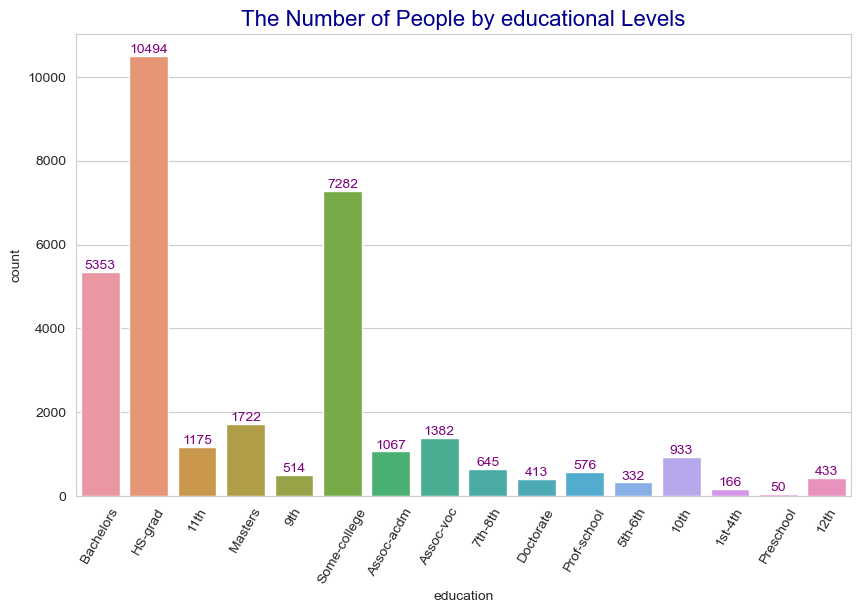

In [77]:
ax = sns.countplot(data=df, x="education")

plt.xticks(rotation=60)

plt.title("The Number of People by educational Levels", fontsize=16, color="darkblue")

ax.bar_label(ax.containers[0], color="purple", 
             size=10);

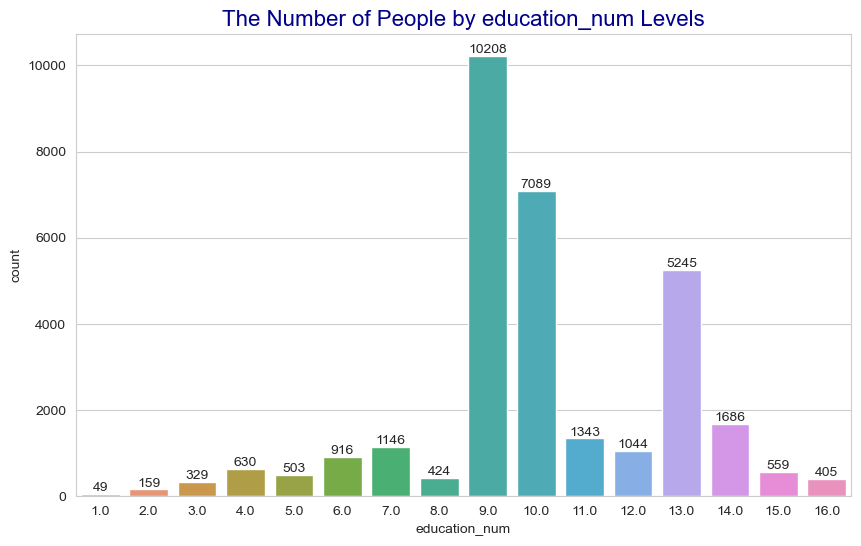

In [78]:
ax = sns.countplot(data = df, x = "education_num")
plt.title("The Number of People by education_num Levels", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

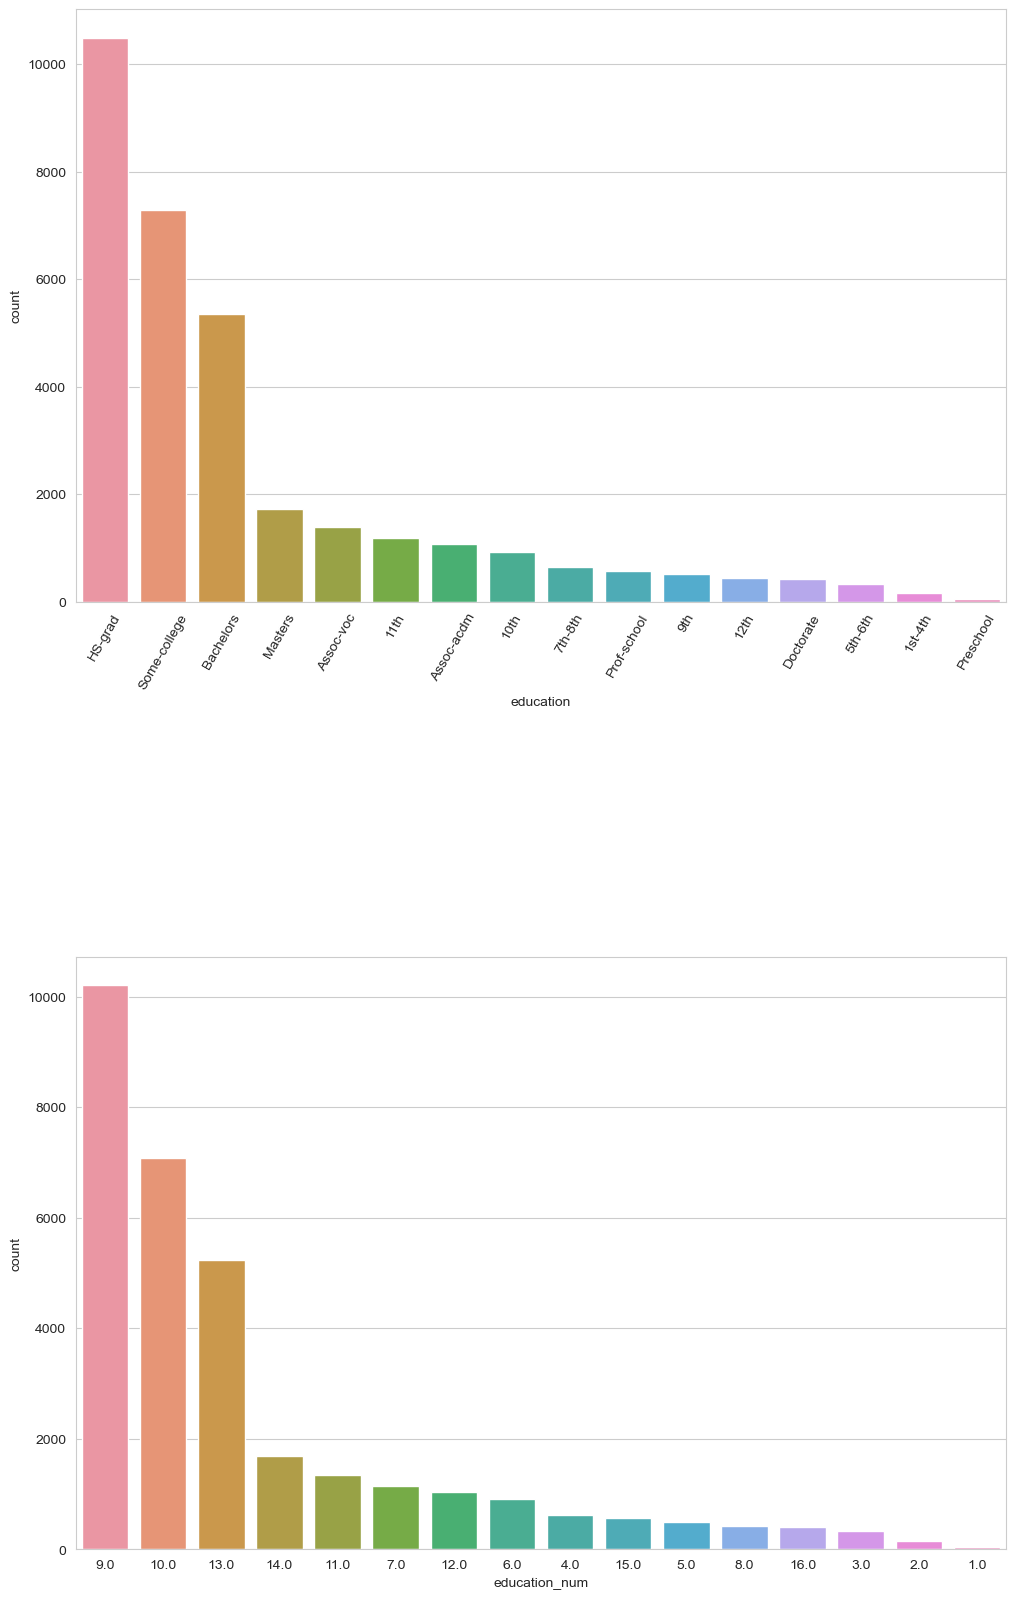

In [79]:
# Visualization of "education" and "education_num" features by order

education_count = df["education"].value_counts().index
education_num_count = df["education_num"].value_counts().index

fig, ax = plt.subplots(2, 1, figsize=(12, 20))

sns.countplot(df["education"], order=education_count, ax=ax[0])
sns.countplot(df["education_num"], order=education_num_count, ax=ax[1])

ax[0].tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.6)

*Check the count of person in each "salary" levels by these features (education and education_num) separately and visualize them with countplot*

In [80]:
df.groupby("education").salary.value_counts()

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: salary, dtype: int64

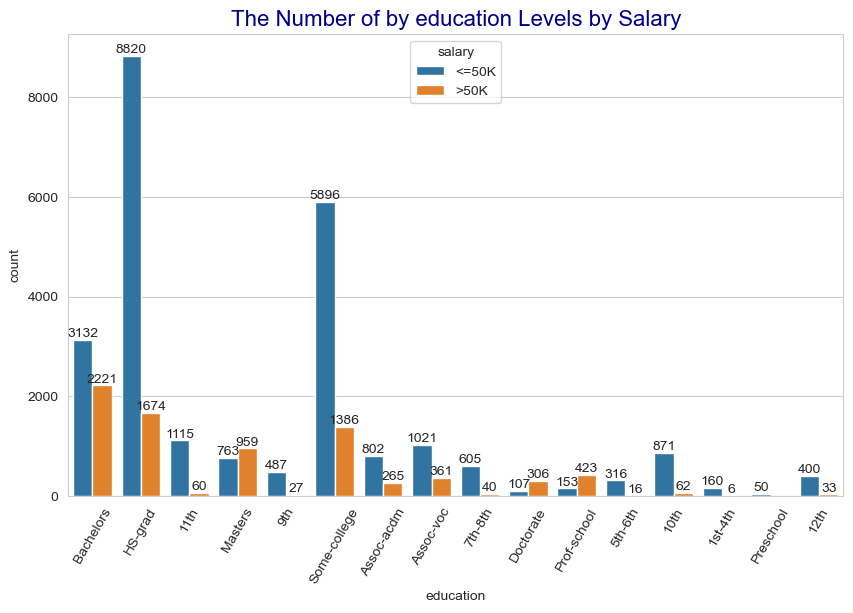

In [81]:
ax = sns.countplot(data = df, x = "education", hue = "salary")

plt.title("The Number of by education Levels by Salary", fontsize=16, color="darkblue")
plt.xticks(rotation = 60)

for container in ax.containers:
    ax.bar_label(container);

In [82]:
df.groupby("education_num").salary.value_counts()

education_num  salary
1.000          <=50K       49
2.000          <=50K      153
               >50K         6
3.000          <=50K      313
               >50K        16
4.000          <=50K      592
               >50K        38
5.000          <=50K      477
               >50K        26
6.000          <=50K      854
               >50K        62
7.000          <=50K     1088
               >50K        58
8.000          <=50K      391
               >50K        33
9.000          <=50K     8579
               >50K      1629
10.000         <=50K     5746
               >50K      1343
11.000         <=50K      994
               >50K       349
12.000         <=50K      787
               >50K       257
13.000         <=50K     3078
               >50K      2167
14.000         >50K       935
               <=50K      751
15.000         >50K       410
               <=50K      149
16.000         >50K       302
               <=50K      103
Name: salary, dtype: int64

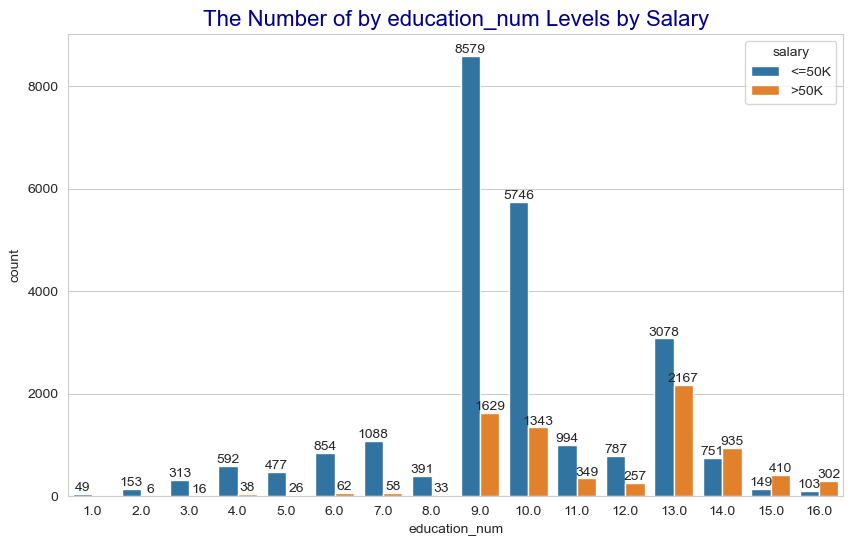

In [83]:
ax = sns.countplot(data = df, x = "education_num", hue = "salary")
plt.title("The Number of by education_num Levels by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

*Visualize the boxplot of "education_num" feature by "salary" levels*

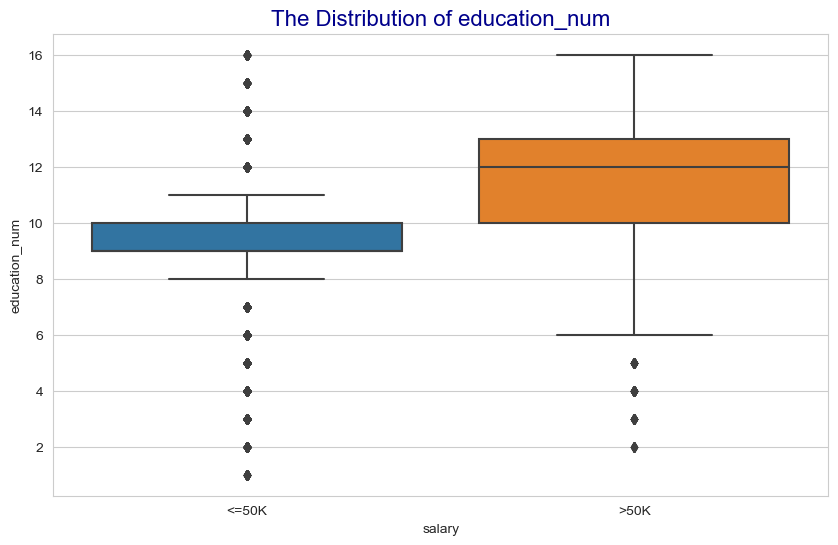

In [84]:
sns.boxplot(data = df, x = "salary", y = "education_num")

plt.title("The Distribution of education_num", fontsize=16, color="darkblue");

*Decrease the number of categories in "education" feature as low, medium, and high level and create a new feature with this new categorical data.*

In [85]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
        return "low_level_grade"
    elif x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
        return "medium_level_grade"
    elif x in ["Bachelors", "Masters", "Prof-school", "Doctorate"]:
        return "high_level_grade"

In [86]:
df.education.apply(mapping_education).value_counts(dropna=False)

medium_level_grade    20225
high_level_grade       8064
low_level_grade        4248
Name: education, dtype: int64

In [87]:
# By using "mapping_education" def function above, create a new column named "education_summary"

df["education_summary"] = df.education.apply(mapping_education)

In [88]:
df.head().T

0                   1                   2  \
age                              39                  50                  38   
workclass                 State-gov    Self-emp-not-inc             Private   
fnlwgt                        77516               83311              215646   
education                 Bachelors           Bachelors             HS-grad   
education_num                13.000              13.000               9.000   
marital_status        Never-married  Married-civ-spouse            Divorced   
occupation             Adm-clerical     Exec-managerial   Handlers-cleaners   
relationship          Not-in-family             Husband       Not-in-family   
race                          White               White               White   
gender                         Male                Male                Male   
capital_gain                   2174                   0                   0   
capital_loss                      0                   0                   0   
hours_per_week                   40                  13                  40   
native_country        United-States       United-States       United-States   
salary                        <=50K               <=50K               <=50K   
education_summary  high_level_grade    high_level_grade  medium_level_grade   

                                    3                   4  
age                                53                  28  
workclass                     Private             Private  
fnlwgt                         234721              338409  
education                        11th           Bachelors  
education_num                   7.000              13.000  
marital_status     Married-civ-spouse  Married-civ-spouse  
occupation          Handlers-cleaners      Prof-specialty  
relationship                  Husband                Wife  
race                            Black               Black  
gender                           Male              Female  
capital_gain                        0                   0  
capital_loss                        0                   0  
hours_per_week                     40                  40  
native_country          United-States                Cuba  
salary                          <=50K               <=50K  
education_summary     low_level_grade    high_level_grade

*Visualize the count of person in each categories for these new education levels (high, medium, low)*

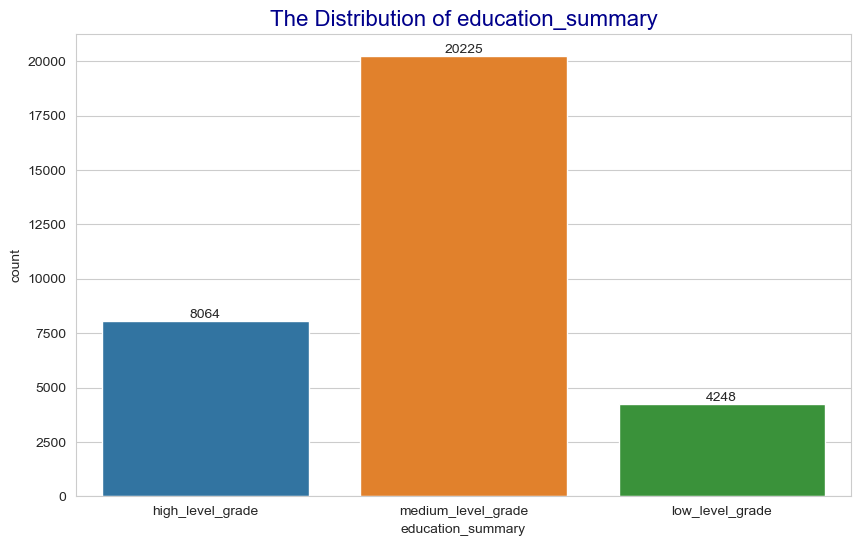

In [89]:
ax = sns.countplot(data=df, x="education_summary")

plt.title("The Distribution of education_summary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

*Check the count of person in each "salary" levels by these new education levels(high, medium, low) and visualize it with countplot*

In [90]:
df.groupby("education_summary").salary.value_counts()

education_summary   salary
high_level_grade    <=50K      4155
                    >50K       3909
low_level_grade     <=50K      4004
                    >50K        244
medium_level_grade  <=50K     16539
                    >50K       3686
Name: salary, dtype: int64

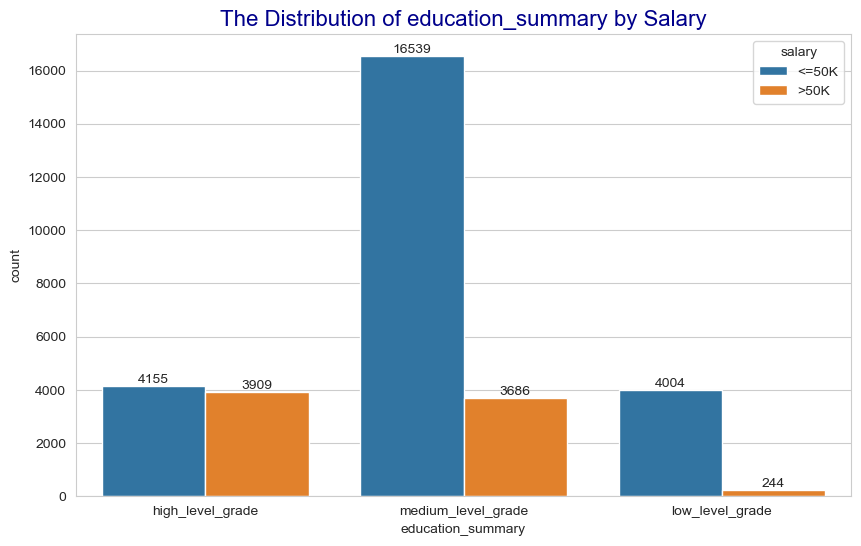

In [91]:
ax = sns.countplot(data=df, x="education_summary", hue="salary")

plt.title("The Distribution of education_summary by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

*Check the percentage distribution of person in each "salary" levels by each new education levels (high, medium, low) and visualize it with pie plot separately*

In [92]:
edu = df.groupby(["education_summary"]).salary.value_counts(normalize=True)
edu

education_summary   salary
high_level_grade    <=50K    0.515
                    >50K     0.485
low_level_grade     <=50K    0.943
                    >50K     0.057
medium_level_grade  <=50K    0.818
                    >50K     0.182
Name: salary, dtype: float64

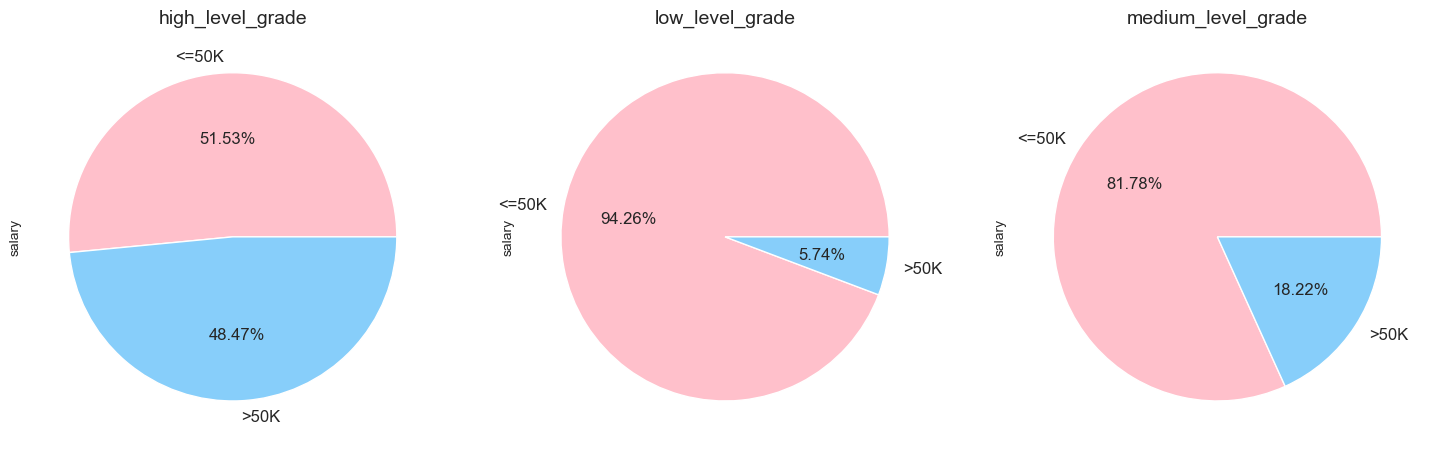

In [93]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2, 4]:
    plt.subplot(1,3,index)
    edu[i:i+2].plot.pie(subplots=True,
                        labels=["<=50K", ">50K"],
                        autopct="%.2f%%",
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue'],
                        )
    plt.title(edu.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

*Check the count of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with countplot*

In [94]:
df.groupby("salary").education_summary.value_counts()

salary  education_summary 
<=50K   medium_level_grade    16539
        high_level_grade       4155
        low_level_grade        4004
>50K    high_level_grade       3909
        medium_level_grade     3686
        low_level_grade         244
Name: education_summary, dtype: int64

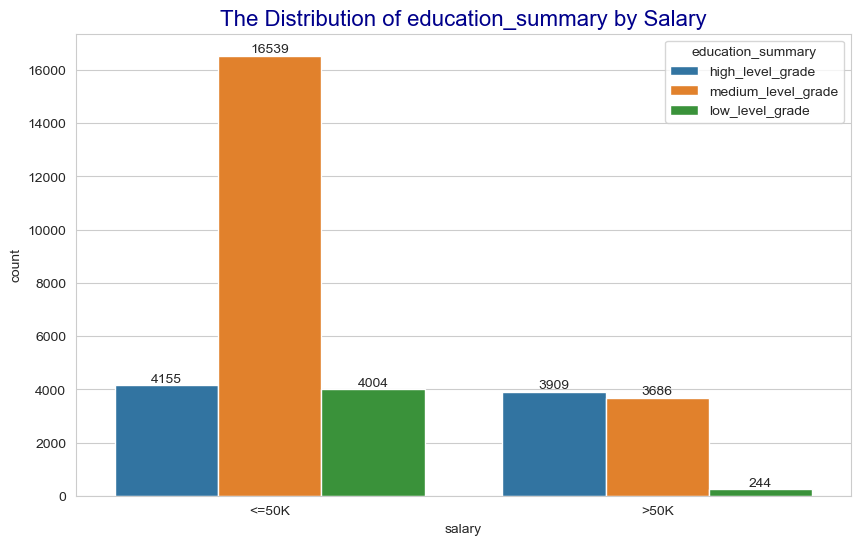

In [95]:
ax = sns.countplot(data=df, x="salary", hue="education_summary")

plt.title("The Distribution of education_summary by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

*Check the the percentage distribution of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with pie plot separately*

In [96]:
edu = df.groupby(["salary"]).education_summary.value_counts(normalize=True)
edu

# DİKKAT! "salary" gruplarının "education_summary" kategorileri farklı sıralama ile geldi!!

salary  education_summary 
<=50K   medium_level_grade   0.670
        high_level_grade     0.168
        low_level_grade      0.162
>50K    high_level_grade     0.499
        medium_level_grade   0.470
        low_level_grade      0.031
Name: education_summary, dtype: float64

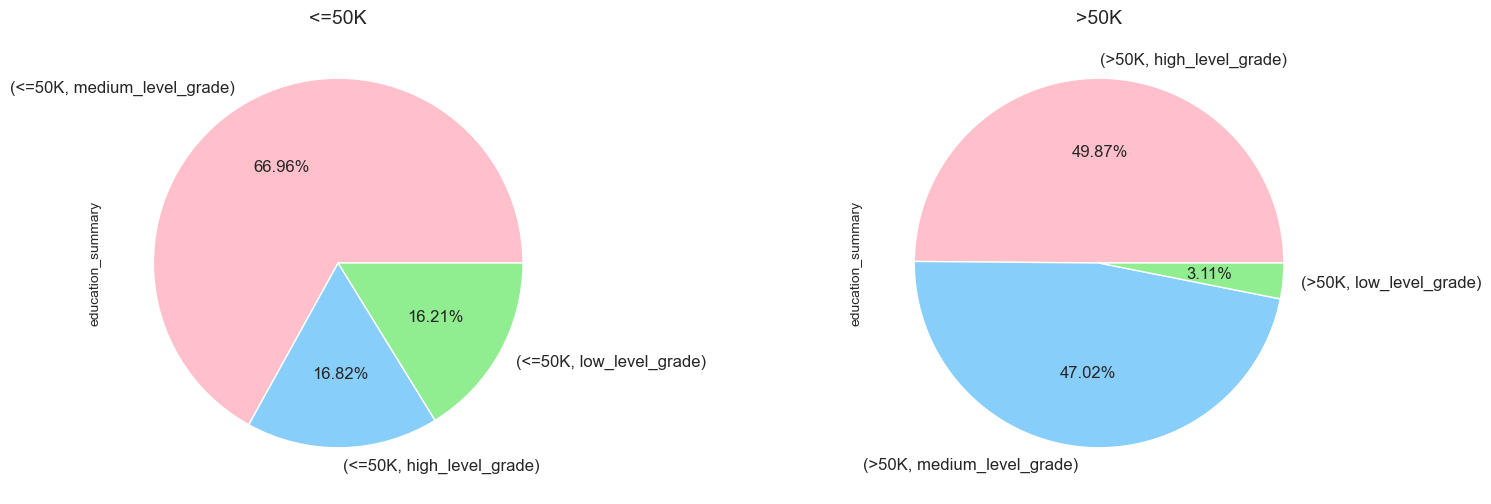

In [97]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1,2,index)
    edu[i:i+3].plot.pie(subplots=True,
                       # labels=["high", "medium", "low"],  # education_summary kategorilerin sıralaması 
                        autopct="%.2f%%",            # her iki pie için farklı olduğundan label veremem.
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue', 'lightgreen'],
                        )
    plt.title(edu.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [98]:
# bu durumu düzeltmek için dataframe oluşturup salary ve education_summary bazında bir sıralama yapacağım.

edu_df = pd.DataFrame(edu)

edu_df

education_summary
salary education_summary                    
<=50K  medium_level_grade              0.670
       high_level_grade                0.168
       low_level_grade                 0.162
>50K   high_level_grade                0.499
       medium_level_grade              0.470
       low_level_grade                 0.031

In [99]:
edu_df.rename(columns = {"education_summary" : "percentage"}, inplace = True)
edu_df.reset_index(inplace = True) 

edu_df.sort_values(by = ["salary", "education_summary"], inplace=True)
edu_df

salary   education_summary  percentage
1  <=50K    high_level_grade       0.168
2  <=50K     low_level_grade       0.162
0  <=50K  medium_level_grade       0.670
3   >50K    high_level_grade       0.499
5   >50K     low_level_grade       0.031
4   >50K  medium_level_grade       0.470

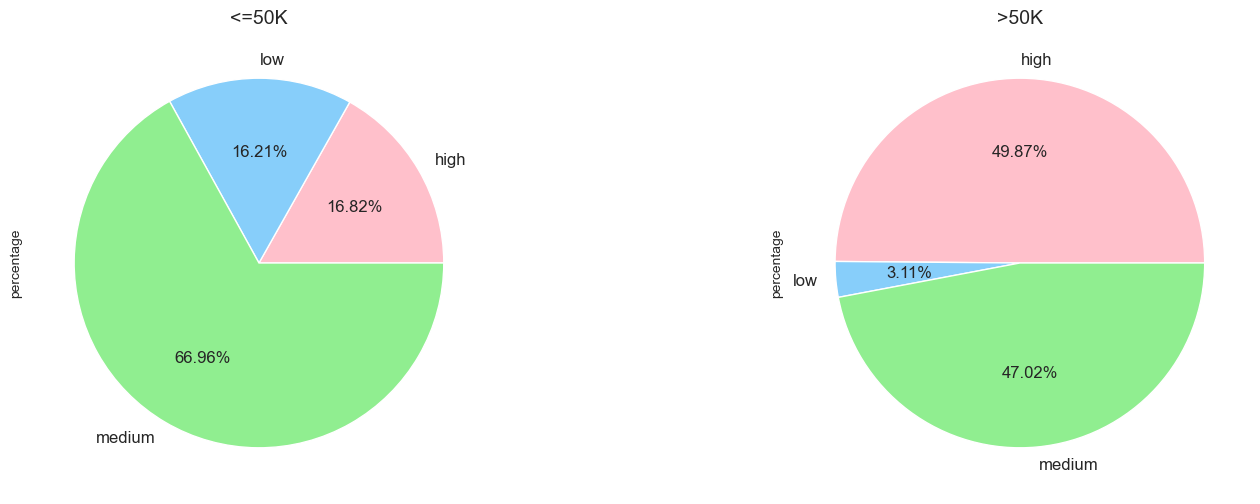

In [100]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1,2,index)
    edu_df["percentage"][i:i+3].plot.pie(subplots=True,
                                         labels=["high", "low", "medium"],
                                         autopct="%.2f%%",
                                         textprops={'fontsize': 12},
                                         colors=['pink', 'lightskyblue', 'lightgreen'],
                                         )
    plt.title(edu_df.salary[i], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [101]:
edu2 = df.groupby(["salary"]).education_summary.value_counts(sort= False, normalize=True)
edu2

salary  education_summary 
<=50K   high_level_grade     0.168
        low_level_grade      0.162
        medium_level_grade   0.670
>50K    high_level_grade     0.499
        low_level_grade      0.031
        medium_level_grade   0.470
Name: education_summary, dtype: float64

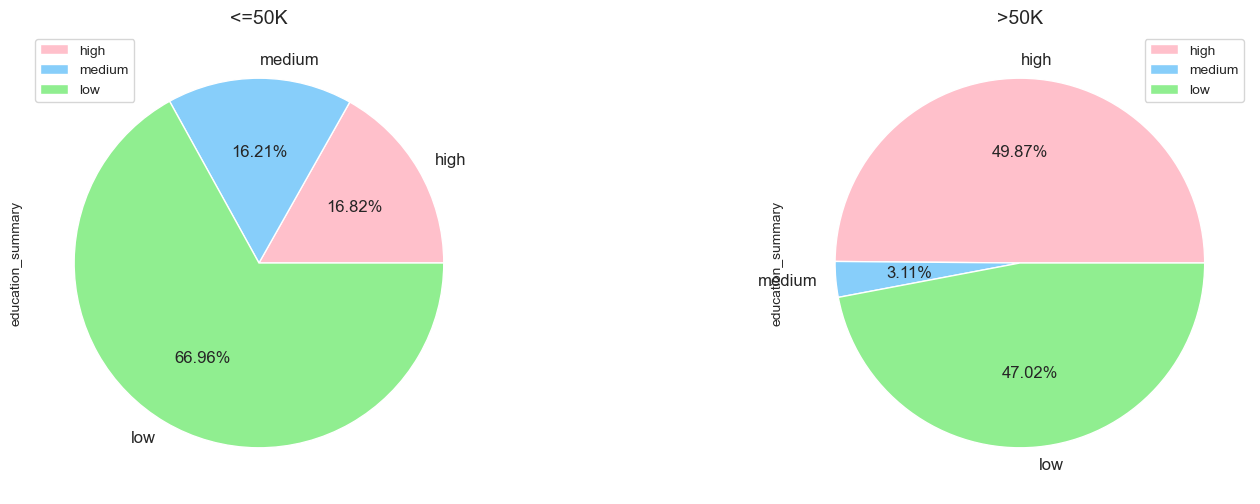

In [102]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1,2,index)
    edu2[i:i+3].plot.pie(subplots=True,
                        labels=["high", "medium", "low"],  # her iki pie'da da sıralama aynı olduğu için 
                                             # artık bu etiketlemeyi yapabilim.
                        autopct="%.2f%%",
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue', 'lightgreen'],
                        )
    plt.title(edu2.index[i][0], fontdict = {'fontsize': 14})
    plt.legend()  #ve legend da verebilirim artık.
    index += 1

**Result :** We can easily say that the more education the more high income.

**---------------**

**marital_status & relationship**

*Detect the similarities between these features by comparing unique values*

In [103]:
df.marital_status.value_counts(dropna=False)

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [104]:
df.relationship.value_counts(dropna=False)

Husband           13187
Not-in-family      8292
NaN                5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [105]:
# Fill missing values with "Unknown" in the column of "relationship"

df.relationship.fillna("Unknown", inplace=True)

In [106]:
df.groupby("relationship").marital_status.value_counts(dropna=False)

relationship    marital_status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unknown         Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

**Assessment :** These features have almost same info, but "relationship" feature has %15 of missing values. So I have decided to go my way with "marital_status" feature

*Visualize the count of person in each categories*

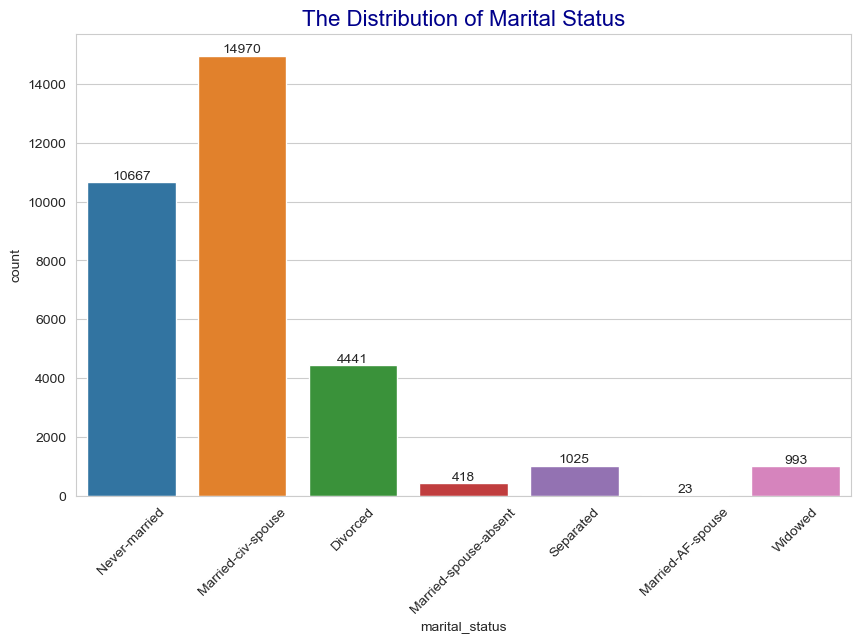

In [107]:
ax = sns.countplot(data=df, x="marital_status")

plt.title("The Distribution of Marital Status", fontsize=16, color="darkblue")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container);

*Check the count of person in each "salary" levels by categories and visualize it with countplot*

In [108]:
df.groupby("marital_status").salary.value_counts()

marital_status         salary
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: salary, dtype: int64

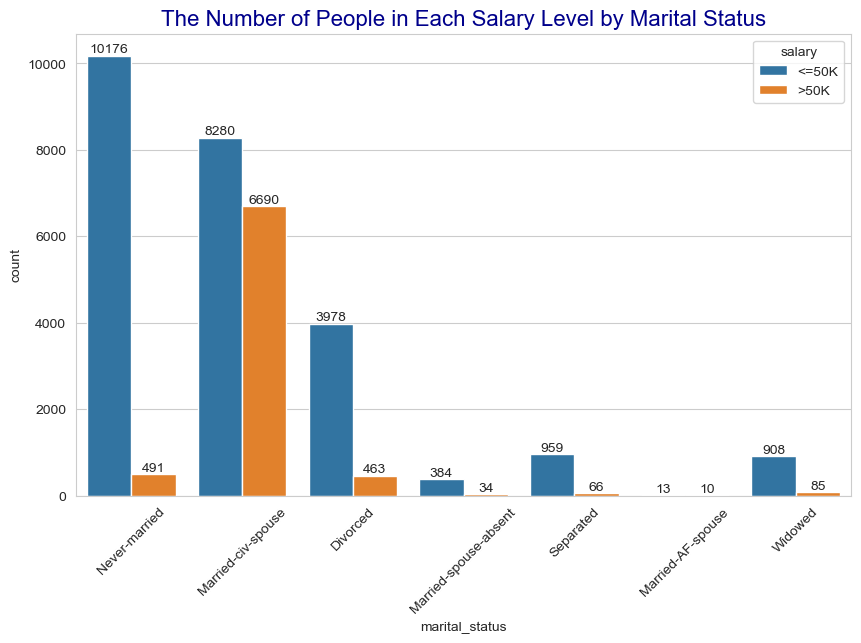

In [109]:
ax = sns.countplot(data=df, x="marital_status", hue="salary")

plt.title("The Number of People in Each Salary Level by Marital Status", fontsize=16, color="darkblue")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container);

*Decrease the number of categories in "marital_status" feature as married, and unmarried and create a new feature with this new categorical data*

In [110]:
def mapping_marital_status(x):
    if x in ["Never-married", "Divorced", "Separated", "Widowed"]:
        return "unmarried"
    elif x in ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"]:
        return "married"

In [111]:
df.marital_status.apply(mapping_marital_status).value_counts(dropna=False)

unmarried    17126
married      15411
Name: marital_status, dtype: int64

In [112]:
# By using "mapping_marital_status" def function above, create a new column named "marital_status_summary"

df["marital_status_summary"] = df.marital_status.apply(mapping_marital_status)

In [114]:
df.head(1).T

0
age                                   39
workclass                      State-gov
fnlwgt                             77516
education                      Bachelors
education_num                     13.000
marital_status             Never-married
occupation                  Adm-clerical
relationship               Not-in-family
race                               White
gender                              Male
capital_gain                        2174
capital_loss                           0
hours_per_week                        40
native_country             United-States
salary                             <=50K
education_summary       high_level_grade
marital_status_summary         unmarried

*Visualize the count of person in each categories for these new marital status (married, unmarried)*

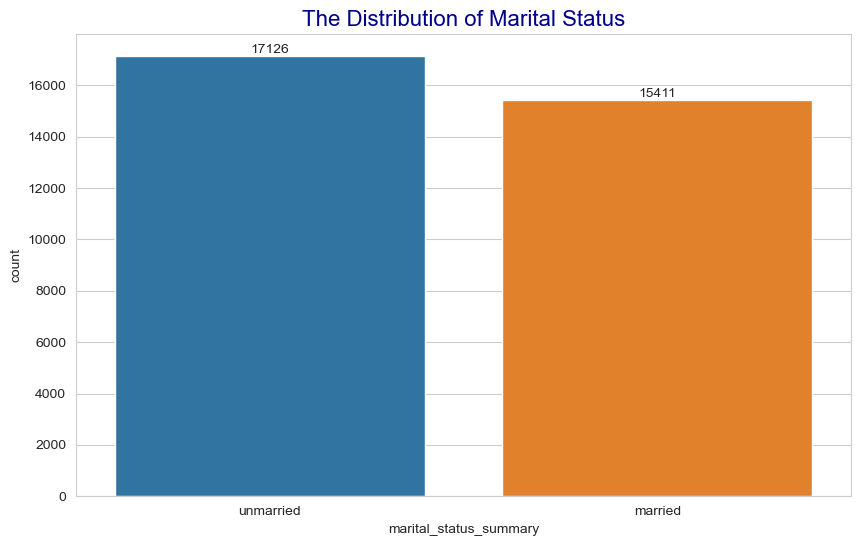

In [115]:
ax = sns.countplot(data=df, x="marital_status_summary")

plt.title("The Distribution of Marital Status", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

*Check the count of person in each "salary" levels by these new marital status (married, unmarried) and visualize it with countplot*

In [116]:
df.groupby("marital_status_summary").salary.value_counts()

marital_status_summary  salary
married                 <=50K      8677
                        >50K       6734
unmarried               <=50K     16021
                        >50K       1105
Name: salary, dtype: int64

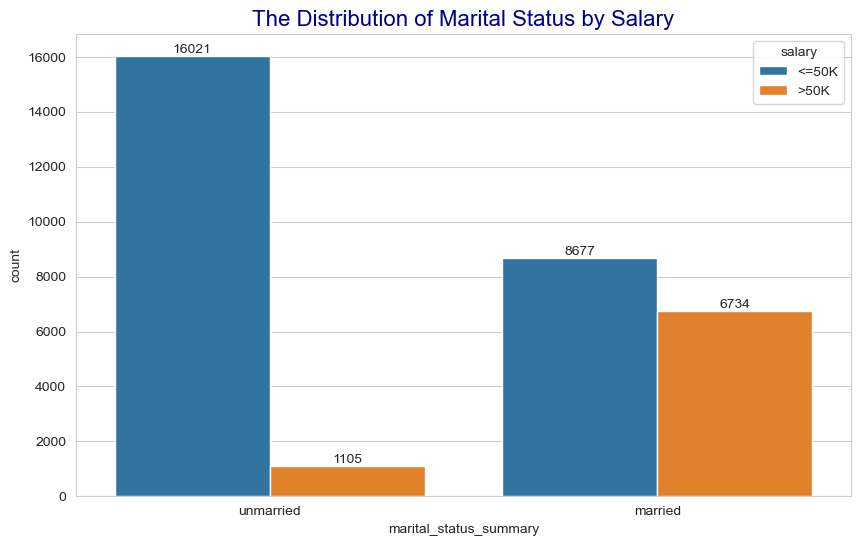

In [117]:
ax = sns.countplot(data=df, x="marital_status_summary", hue="salary")

plt.title("The Distribution of Marital Status by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

*Check the percentage distribution of person in each "salary" levels by each new marital status (married, unmarried) and visualize it with pie plot separately*

In [118]:
marital = df.groupby(["marital_status_summary"]).salary.value_counts(normalize=True)
marital

marital_status_summary  salary
married                 <=50K    0.563
                        >50K     0.437
unmarried               <=50K    0.935
                        >50K     0.065
Name: salary, dtype: float64

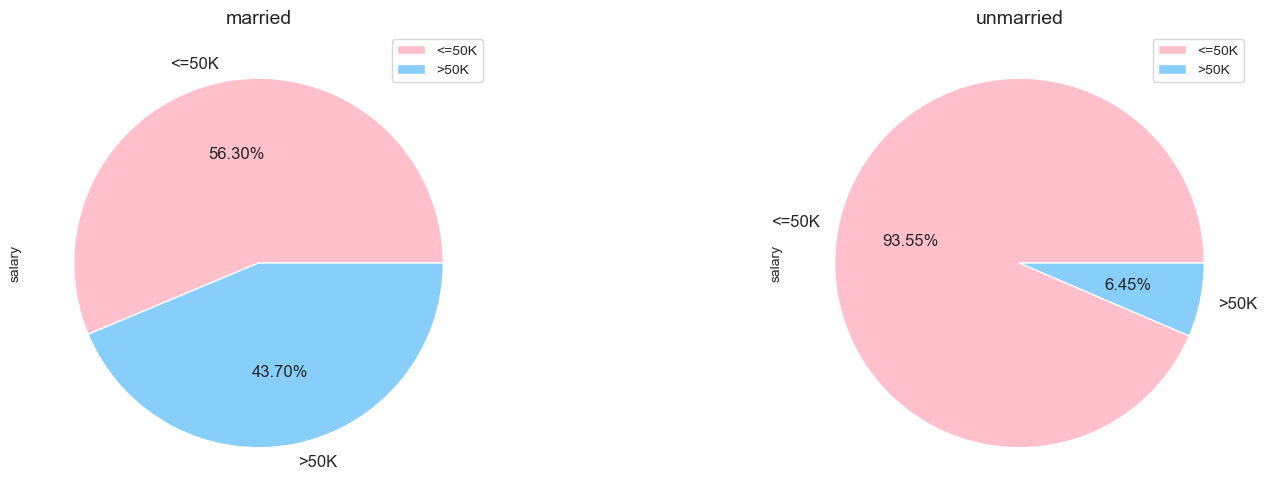

In [119]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    marital[i:i+2].plot.pie(subplots=True,
                            labels=["<=50K", ">50K"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(marital.index[i][0], fontdict = {'fontsize': 14})
    plt.legend()
    index += 1

*Check the count of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with countplot*

In [120]:
df.groupby("salary").marital_status_summary.value_counts()

salary  marital_status_summary
<=50K   unmarried                 16021
        married                    8677
>50K    married                    6734
        unmarried                  1105
Name: marital_status_summary, dtype: int64

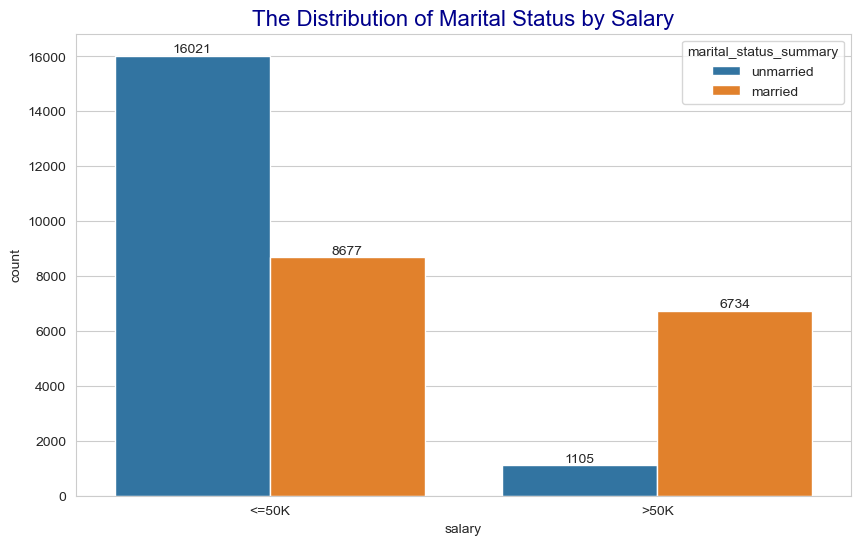

In [121]:
ax = sns.countplot(data=df, x="salary", hue="marital_status_summary")

plt.title("The Distribution of Marital Status by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

*Check the the percentage distribution of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with pie plot separately*

In [122]:
marital = df.groupby("salary").marital_status_summary.value_counts(sort = False, normalize=True)
marital

salary  marital_status_summary
<=50K   married                  0.351
        unmarried                0.649
>50K    married                  0.859
        unmarried                0.141
Name: marital_status_summary, dtype: float64

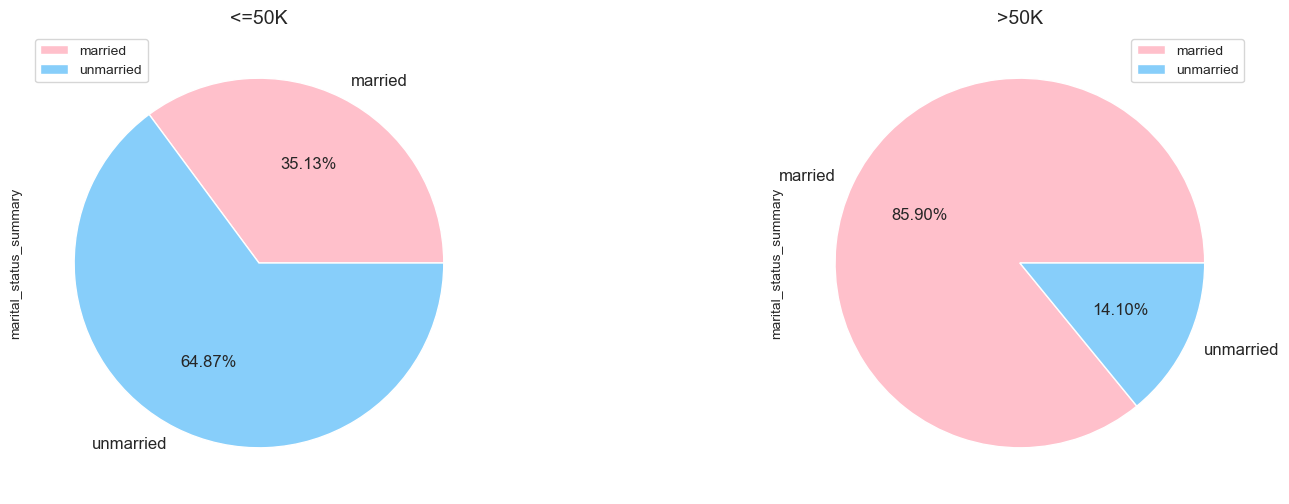

In [123]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    marital[i:i+2].plot.pie(subplots=True,
                                             labels=["married", "unmarried"],
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             colors=['pink', 'lightskyblue'],
                                             )
    plt.title(marital.index[i][0], fontdict = {'fontsize': 14})
    plt.legend()
    index += 1

**Result :** We can easily say that married persons have earned more income than unmarried persons.

**workclass**

*Check the count of person in each categories and visualize it with countplot*

In [124]:
df.workclass.value_counts(dropna=False)

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

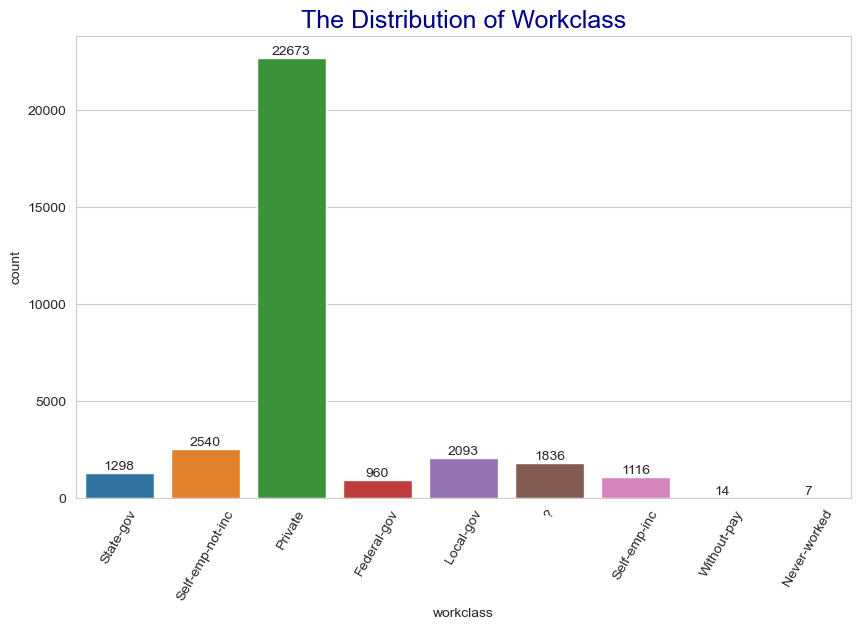

In [125]:
ax = sns.countplot(data=df, x="workclass")

plt.title("The Distribution of Workclass", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

*Replace the value "?" to the value "Unknown"*

In [126]:
# Replace "?" values with "Unkown"

df.workclass.replace("?", "Unknown", inplace=True)

*Check the count of person in each "salary" levels by workclass groups and visualize it with countplot*

In [127]:
df.groupby("workclass").salary.value_counts()

workclass         salary
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Unknown           <=50K      1645
                  >50K        191
Without-pay       <=50K        14
Name: salary, dtype: int64

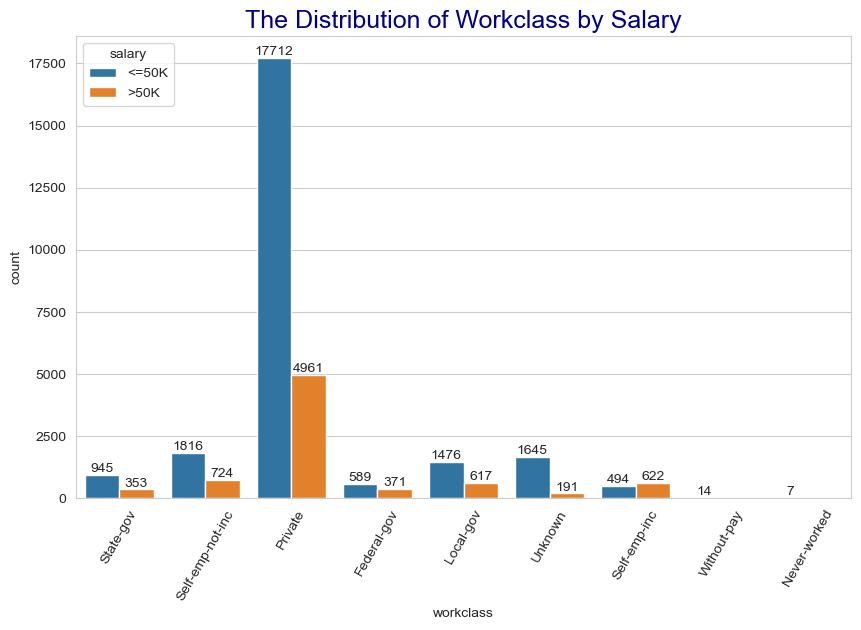

In [128]:
ax = sns.countplot(data = df, x="workclass", hue = "salary")

plt.title("The Distribution of Workclass by Salary", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

*Check the percentage distribution of person in each "salary" levels by each workclass groups and visualize it with bar plot*

In [129]:
workclass = df.groupby("workclass").salary.value_counts(normalize=True)
workclass

workclass         salary
Federal-gov       <=50K    0.614
                  >50K     0.386
Local-gov         <=50K    0.705
                  >50K     0.295
Never-worked      <=50K    1.000
Private           <=50K    0.781
                  >50K     0.219
Self-emp-inc      >50K     0.557
                  <=50K    0.443
Self-emp-not-inc  <=50K    0.715
                  >50K     0.285
State-gov         <=50K    0.728
                  >50K     0.272
Unknown           <=50K    0.896
                  >50K     0.104
Without-pay       <=50K    1.000
Name: salary, dtype: float64

In [130]:
workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns = {"salary" : "percentage"}, inplace = True)
workclass_df.reset_index(inplace = True)
workclass_df.sort_values(by = ["workclass", "salary"], inplace=True)
workclass_df

workclass salary  percentage
0        Federal-gov  <=50K       0.614
1        Federal-gov   >50K       0.386
2          Local-gov  <=50K       0.705
3          Local-gov   >50K       0.295
4       Never-worked  <=50K       1.000
5            Private  <=50K       0.781
6            Private   >50K       0.219
8       Self-emp-inc  <=50K       0.443
7       Self-emp-inc   >50K       0.557
9   Self-emp-not-inc  <=50K       0.715
10  Self-emp-not-inc   >50K       0.285
11         State-gov  <=50K       0.728
12         State-gov   >50K       0.272
13           Unknown  <=50K       0.896
14           Unknown   >50K       0.104
15       Without-pay  <=50K       1.000

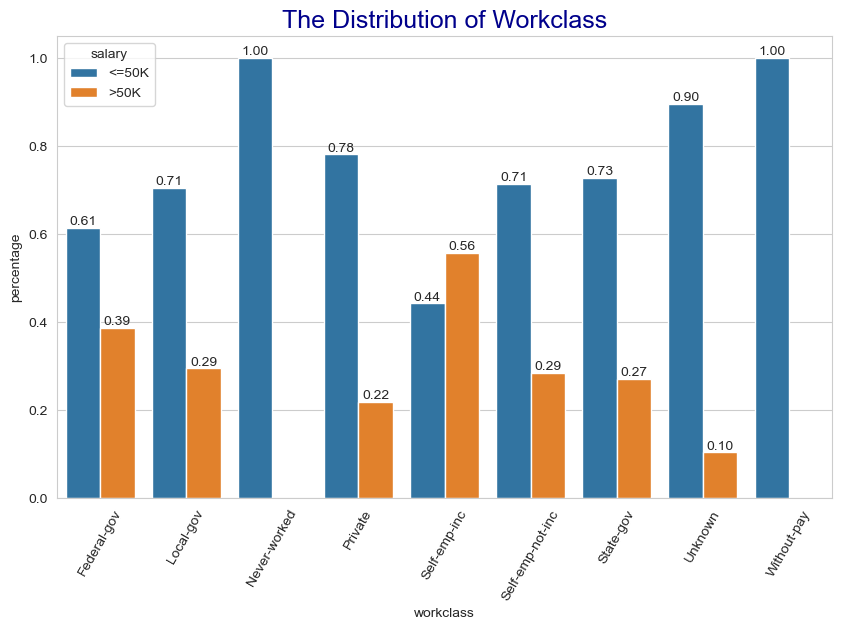

In [131]:
fig, ax = plt.subplots()

ax = sns.barplot(data = workclass_df, x="workclass", y="percentage", hue="salary")

plt.title("The Distribution of Workclass", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f");

*Check the count of person in each workclass groups by "salary" levels and visualize it with countplot*

In [132]:
df.groupby("salary").workclass.value_counts()

salary  workclass       
<=50K   Private             17712
        Self-emp-not-inc     1816
        Unknown              1645
        Local-gov            1476
        State-gov             945
        Federal-gov           589
        Self-emp-inc          494
        Without-pay            14
        Never-worked            7
>50K    Private              4961
        Self-emp-not-inc      724
        Self-emp-inc          622
        Local-gov             617
        Federal-gov           371
        State-gov             353
        Unknown               191
Name: workclass, dtype: int64

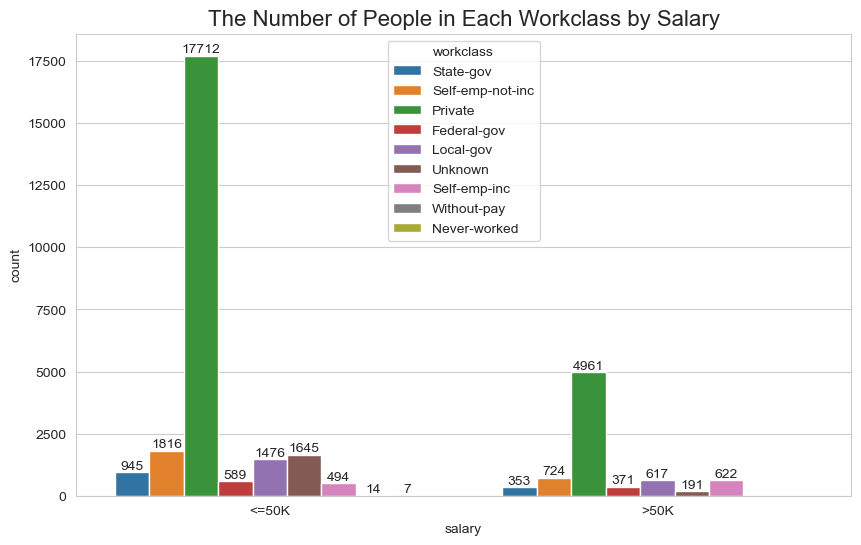

In [133]:
ax = sns.countplot(data=df, x="salary", hue="workclass")

plt.title("The Number of People in Each Workclass by Salary", fontsize=16)
for container in ax.containers:
    ax.bar_label(container);

*Check the the percentage distribution of person in each workclass groups by "salary" levels and visualize it with countplot*

In [134]:
workclass = df.groupby("salary").workclass.value_counts(normalize=True)
workclass

salary  workclass       
<=50K   Private            0.717
        Self-emp-not-inc   0.074
        Unknown            0.067
        Local-gov          0.060
        State-gov          0.038
        Federal-gov        0.024
        Self-emp-inc       0.020
        Without-pay        0.001
        Never-worked       0.000
>50K    Private            0.633
        Self-emp-not-inc   0.092
        Self-emp-inc       0.079
        Local-gov          0.079
        Federal-gov        0.047
        State-gov          0.045
        Unknown            0.024
Name: workclass, dtype: float64

In [135]:
workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns = {"workclass" : "percentage"}, inplace = True)
workclass_df.reset_index(inplace = True)
workclass_df.sort_values(by = ["salary", "workclass"], inplace=True)
workclass_df

salary         workclass  percentage
5   <=50K       Federal-gov       0.024
3   <=50K         Local-gov       0.060
8   <=50K      Never-worked       0.000
0   <=50K           Private       0.717
6   <=50K      Self-emp-inc       0.020
1   <=50K  Self-emp-not-inc       0.074
4   <=50K         State-gov       0.038
2   <=50K           Unknown       0.067
7   <=50K       Without-pay       0.001
13   >50K       Federal-gov       0.047
12   >50K         Local-gov       0.079
9    >50K           Private       0.633
11   >50K      Self-emp-inc       0.079
10   >50K  Self-emp-not-inc       0.092
14   >50K         State-gov       0.045
15   >50K           Unknown       0.024

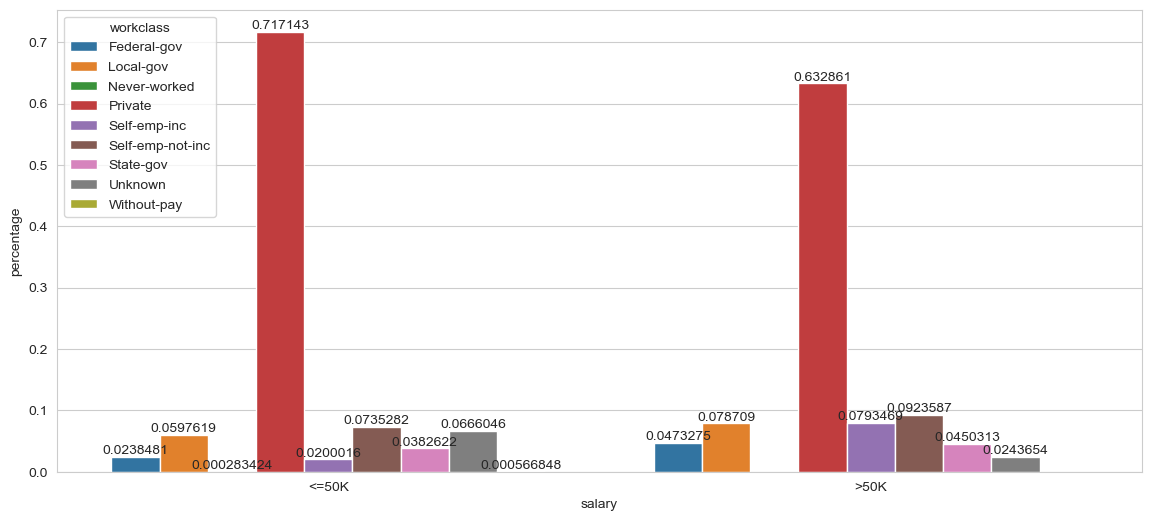

In [136]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=workclass_df, x="salary", y="percentage", hue="workclass")

for container in ax.containers:
    ax.bar_label(container);

*Write down the conclusions you draw from your analysis*

**Result :** "Self-emp-inc" work-class has a high ratio in the self group about high-level income. "Private" work-class has a high ratio in the high-income group about high-level income.

**---------------**

**occupation**

*Check the count of person in each categories and visualize it with countplot*

In [137]:
df.occupation.value_counts(dropna=False)

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

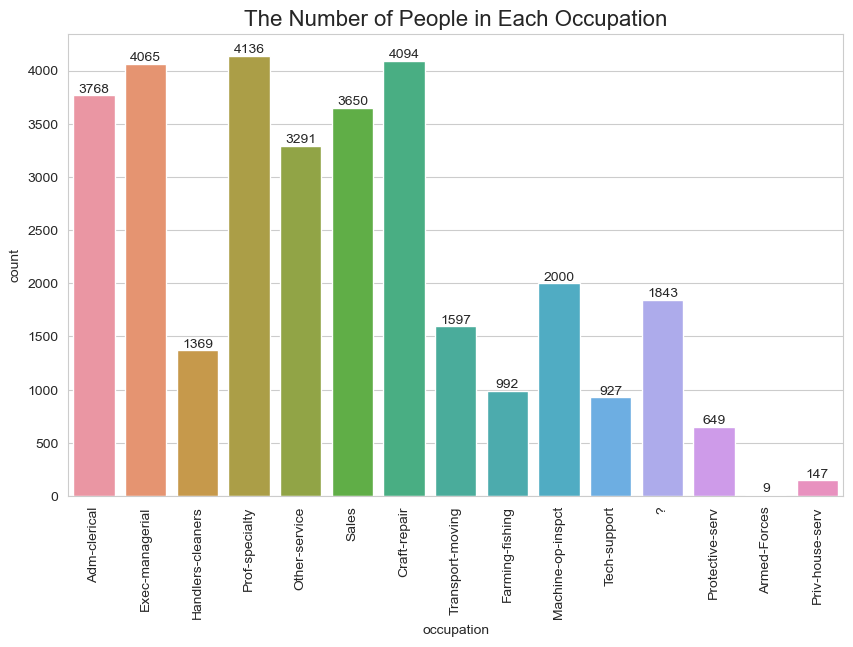

In [138]:
ax = sns.countplot(data=df, x="occupation")

plt.title("The Number of People in Each Occupation", fontsize=16)
plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

*Replace the value "?" to the value "Unknown"*

In [139]:
# Replace "?" values with "Unknown"

df.occupation.replace("?", "Unknown", inplace=True)

In [140]:
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Unknown', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

*Check the count of person in each "salary" levels by occupation groups and visualize it with countplot*

In [141]:
df.groupby("occupation").salary.value_counts()

occupation         salary
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=50K     1277
                   >50K       320
Unknown            <=5

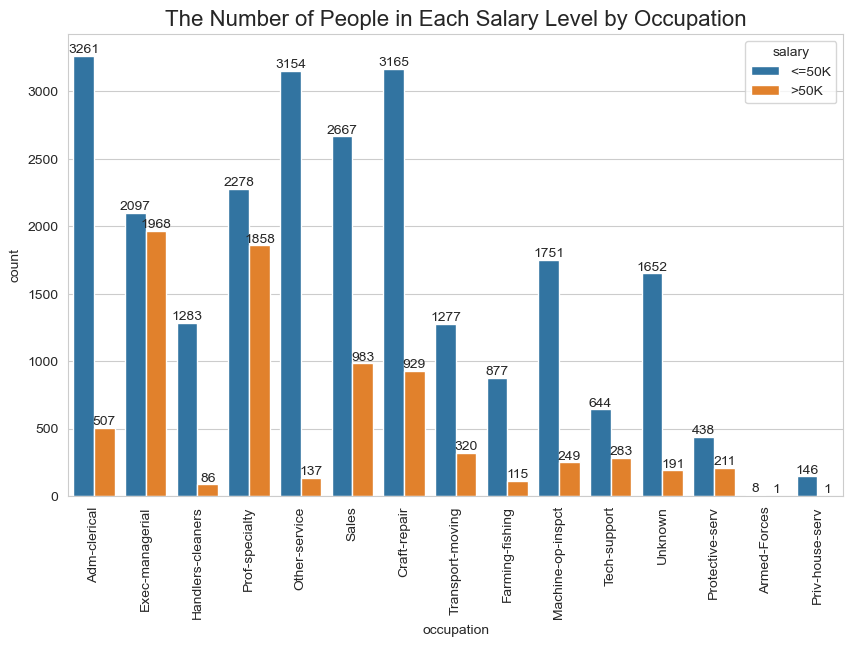

In [142]:
ax = sns.countplot(data=df, x="occupation", hue="salary")

plt.title("The Number of People in Each Salary Level by Occupation", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

*Check the percentage distribution of person in each "salary" levels by each occupation groups and visualize it with bar plot*

In [143]:
occupation = df.groupby("occupation").salary.value_counts(normalize=True)
occupation

occupation         salary
Adm-clerical       <=50K    0.865
                   >50K     0.135
Armed-Forces       <=50K    0.889
                   >50K     0.111
Craft-repair       <=50K    0.773
                   >50K     0.227
Exec-managerial    <=50K    0.516
                   >50K     0.484
Farming-fishing    <=50K    0.884
                   >50K     0.116
Handlers-cleaners  <=50K    0.937
                   >50K     0.063
Machine-op-inspct  <=50K    0.875
                   >50K     0.124
Other-service      <=50K    0.958
                   >50K     0.042
Priv-house-serv    <=50K    0.993
                   >50K     0.007
Prof-specialty     <=50K    0.551
                   >50K     0.449
Protective-serv    <=50K    0.675
                   >50K     0.325
Sales              <=50K    0.731
                   >50K     0.269
Tech-support       <=50K    0.695
                   >50K     0.305
Transport-moving   <=50K    0.800
                   >50K     0.200
Unknown            <=5

In [144]:
occupation_df = pd.DataFrame(occupation)
occupation_df.rename(columns = {"salary" : "percentage"}, inplace = True)
occupation_df.reset_index(inplace = True)
occupation_df.sort_values(by = ["occupation", "salary"], inplace=True)
occupation_df

occupation salary  percentage
0        Adm-clerical  <=50K       0.865
1        Adm-clerical   >50K       0.135
2        Armed-Forces  <=50K       0.889
3        Armed-Forces   >50K       0.111
4        Craft-repair  <=50K       0.773
5        Craft-repair   >50K       0.227
6     Exec-managerial  <=50K       0.516
7     Exec-managerial   >50K       0.484
8     Farming-fishing  <=50K       0.884
9     Farming-fishing   >50K       0.116
10  Handlers-cleaners  <=50K       0.937
11  Handlers-cleaners   >50K       0.063
12  Machine-op-inspct  <=50K       0.875
13  Machine-op-inspct   >50K       0.124
14      Other-service  <=50K       0.958
15      Other-service   >50K       0.042
16    Priv-house-serv  <=50K       0.993
17    Priv-house-serv   >50K       0.007
18     Prof-specialty  <=50K       0.551
19     Prof-specialty   >50K       0.449
20    Protective-serv  <=50K       0.675
21    Protective-serv   >50K       0.325
22              Sales  <=50K       0.731
23              Sales   >50K       0.269
24       Tech-support  <=50K       0.695
25       Tech-support   >50K       0.305
26   Transport-moving  <=50K       0.800
27   Transport-moving   >50K       0.200
28            Unknown  <=50K       0.896
29            Unknown   >50K       0.104

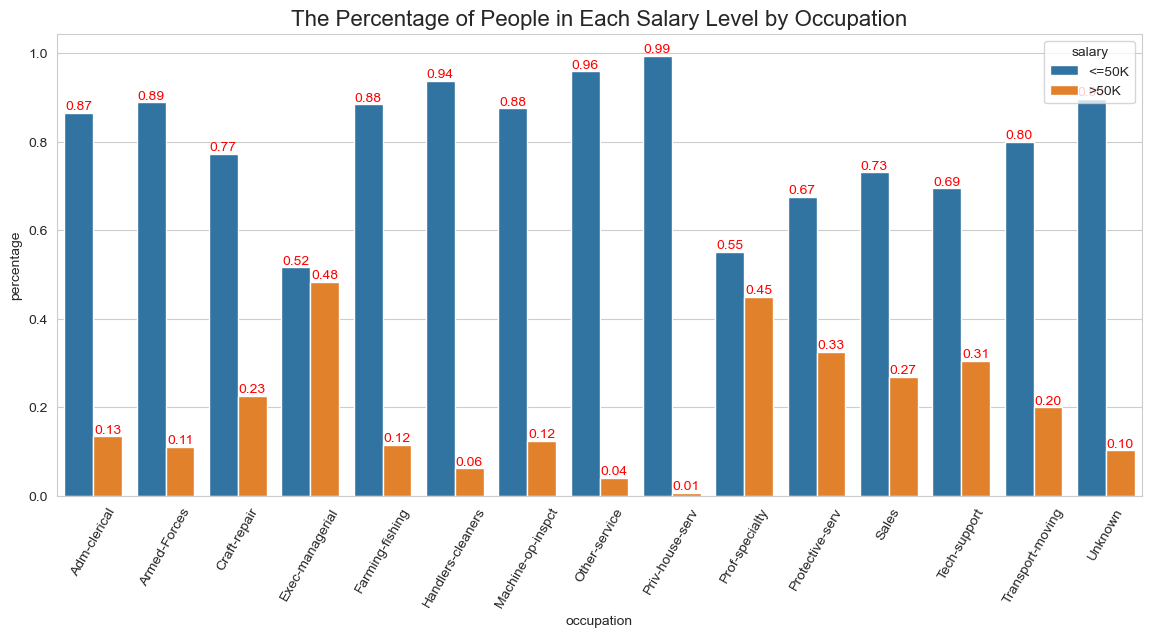

In [145]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=occupation_df, x="occupation", y="percentage", hue="salary")

plt.title("The Percentage of People in Each Salary Level by Occupation", fontsize=16)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', color="r");

*Check the count of person in each occupation groups by "salary" levels and visualize it with countplot*

In [146]:
df.groupby("salary").occupation.value_counts()

salary  occupation       
<=50K   Adm-clerical         3261
        Craft-repair         3165
        Other-service        3154
        Sales                2667
        Prof-specialty       2278
        Exec-managerial      2097
        Machine-op-inspct    1751
        Unknown              1652
        Handlers-cleaners    1283
        Transport-moving     1277
        Farming-fishing       877
        Tech-support          644
        Protective-serv       438
        Priv-house-serv       146
        Armed-Forces            8
>50K    Exec-managerial      1968
        Prof-specialty       1858
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     249
        Protective-serv       211
        Unknown               191
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces  

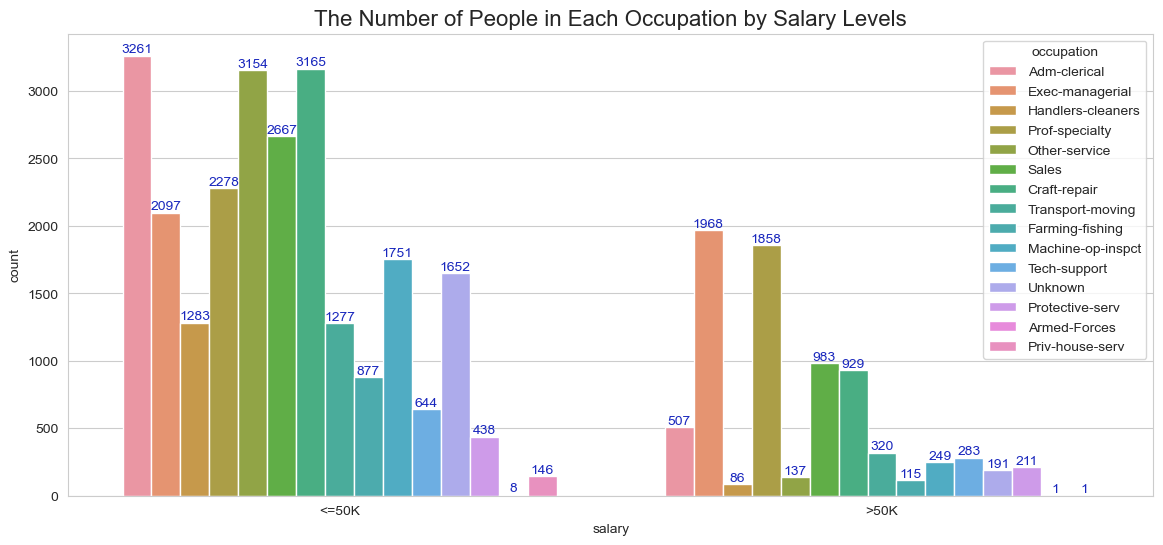

In [147]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.title("The Number of People in Each Occupation by Salary Levels", fontsize=16);
ax = sns.countplot(data=df, x="salary", hue="occupation")

for container in ax.containers:
    ax.bar_label(container, color="#1927BD");

*Check the the percentage distribution of person in each occupation groups by "salary" levels and visualize it with bar plot*

In [148]:
occupation = df.groupby("salary").occupation.value_counts(normalize=True)
occupation

salary  occupation       
<=50K   Adm-clerical        0.132
        Craft-repair        0.128
        Other-service       0.128
        Sales               0.108
        Prof-specialty      0.092
        Exec-managerial     0.085
        Machine-op-inspct   0.071
        Unknown             0.067
        Handlers-cleaners   0.052
        Transport-moving    0.052
        Farming-fishing     0.036
        Tech-support        0.026
        Protective-serv     0.018
        Priv-house-serv     0.006
        Armed-Forces        0.000
>50K    Exec-managerial     0.251
        Prof-specialty      0.237
        Sales               0.125
        Craft-repair        0.119
        Adm-clerical        0.065
        Transport-moving    0.041
        Tech-support        0.036
        Machine-op-inspct   0.032
        Protective-serv     0.027
        Unknown             0.024
        Other-service       0.017
        Farming-fishing     0.015
        Handlers-cleaners   0.011
        Armed-Forces  

In [149]:
occupation_df = pd.DataFrame(occupation)
occupation_df.rename(columns = {"occupation" : "percentage"}, inplace = True)
occupation_df.reset_index(inplace = True)
occupation_df.sort_values(by = ["salary", "occupation"], inplace=True)
occupation_df

salary         occupation  percentage
0   <=50K       Adm-clerical       0.132
14  <=50K       Armed-Forces       0.000
1   <=50K       Craft-repair       0.128
5   <=50K    Exec-managerial       0.085
10  <=50K    Farming-fishing       0.036
8   <=50K  Handlers-cleaners       0.052
6   <=50K  Machine-op-inspct       0.071
2   <=50K      Other-service       0.128
13  <=50K    Priv-house-serv       0.006
4   <=50K     Prof-specialty       0.092
12  <=50K    Protective-serv       0.018
3   <=50K              Sales       0.108
11  <=50K       Tech-support       0.026
9   <=50K   Transport-moving       0.052
7   <=50K            Unknown       0.067
19   >50K       Adm-clerical       0.065
28   >50K       Armed-Forces       0.000
18   >50K       Craft-repair       0.119
15   >50K    Exec-managerial       0.251
26   >50K    Farming-fishing       0.015
27   >50K  Handlers-cleaners       0.011
22   >50K  Machine-op-inspct       0.032
25   >50K      Other-service       0.017
29   >50K    Priv-house-serv       0.000
16   >50K     Prof-specialty       0.237
23   >50K    Protective-serv       0.027
17   >50K              Sales       0.125
21   >50K       Tech-support       0.036
20   >50K   Transport-moving       0.041
24   >50K            Unknown       0.024

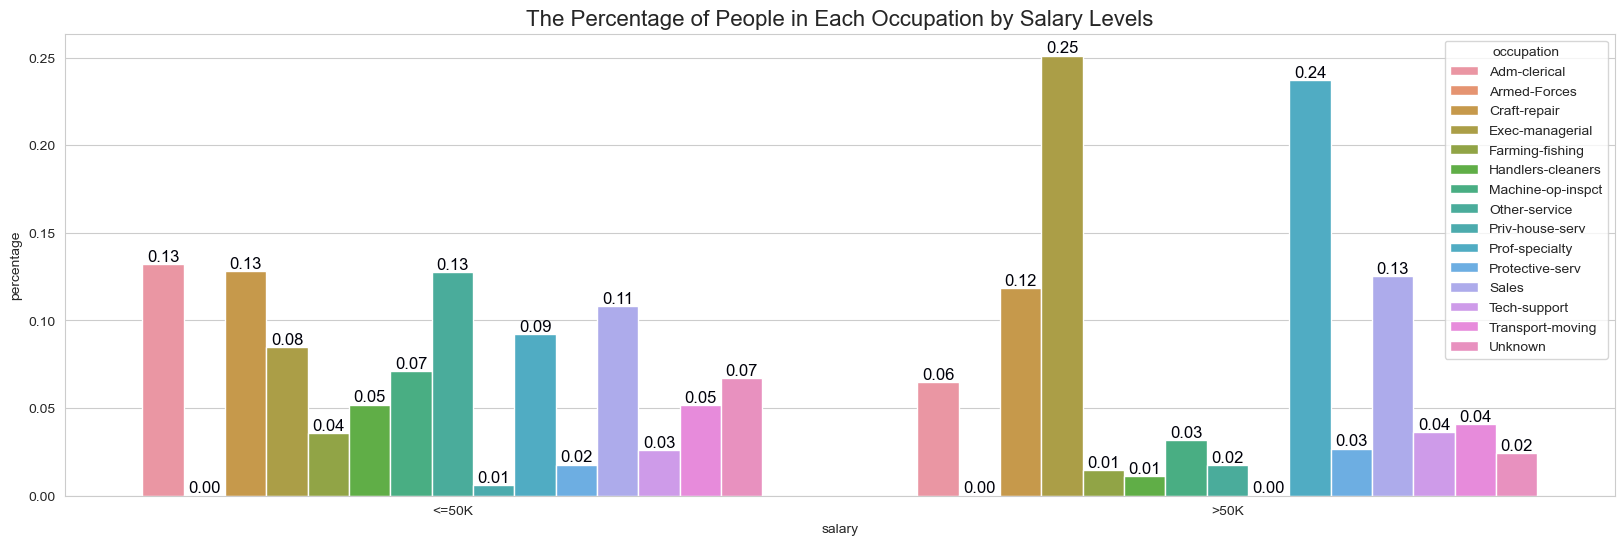

In [150]:
fig, ax = plt.subplots(figsize=(20, 6))

ax = sns.barplot(data=occupation_df, x="salary", y="percentage", hue="occupation")

plt.title("The Percentage of People in Each Occupation by Salary Levels", fontsize=16)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", color="#00010A", fontsize=12);

**Result :** "Exec-managerial" and "Prof-specialty" occupations have a high ratio of high-level income both in the self group and in the high-income group.

**-------------------**

**race**

*Check the count of person in each categories and visualize it with countplot*

In [151]:
df.race.value_counts(dropna=False)

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

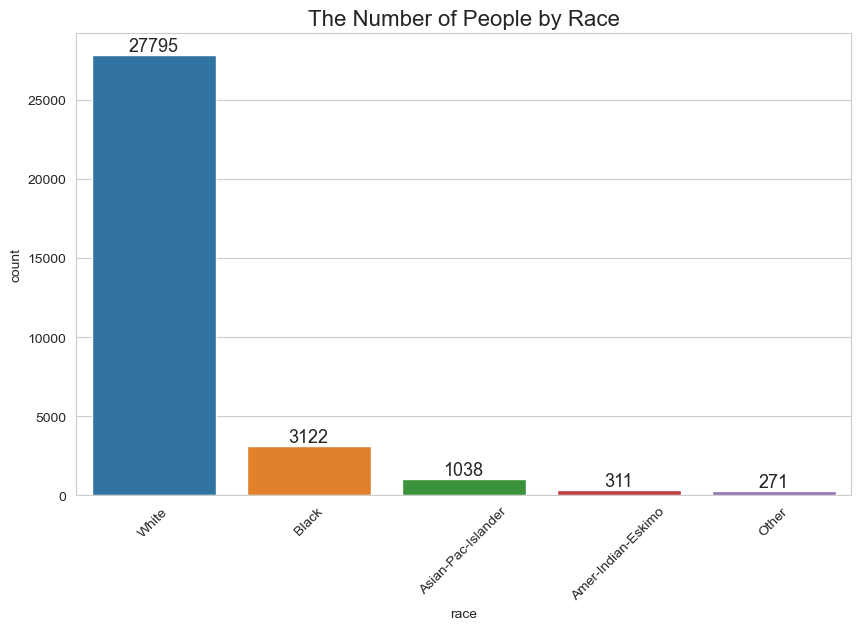

In [152]:
ax = sns.countplot(data=df, x="race")

plt.title("The Number of People by Race", fontsize=16)
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=13);

*Check the count of person in each "salary" levels by races and visualize it with countplot*

In [153]:
df.groupby("race").salary.value_counts()

race                salary
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: salary, dtype: int64

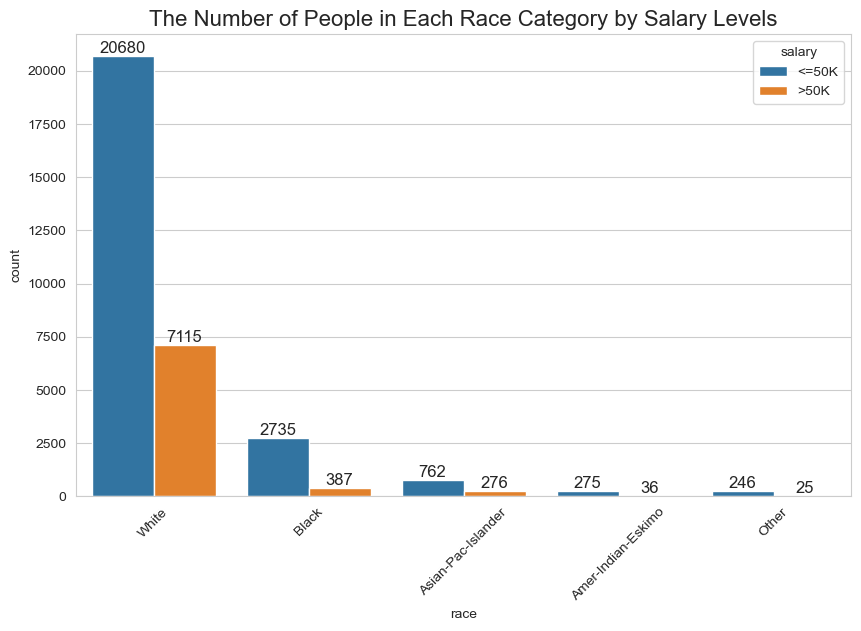

In [154]:
ax = sns.countplot(data=df, x="race", hue="salary")

plt.title("The Number of People in Each Race Category by Salary Levels", fontsize=16);
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

*Check the percentage distribution of person in each "salary" levels by each races and visualize it with pie plot*

In [155]:
race = df.groupby("race").salary.value_counts(normalize=True)
race

race                salary
Amer-Indian-Eskimo  <=50K    0.884
                    >50K     0.116
Asian-Pac-Islander  <=50K    0.734
                    >50K     0.266
Black               <=50K    0.876
                    >50K     0.124
Other               <=50K    0.908
                    >50K     0.092
White               <=50K    0.744
                    >50K     0.256
Name: salary, dtype: float64

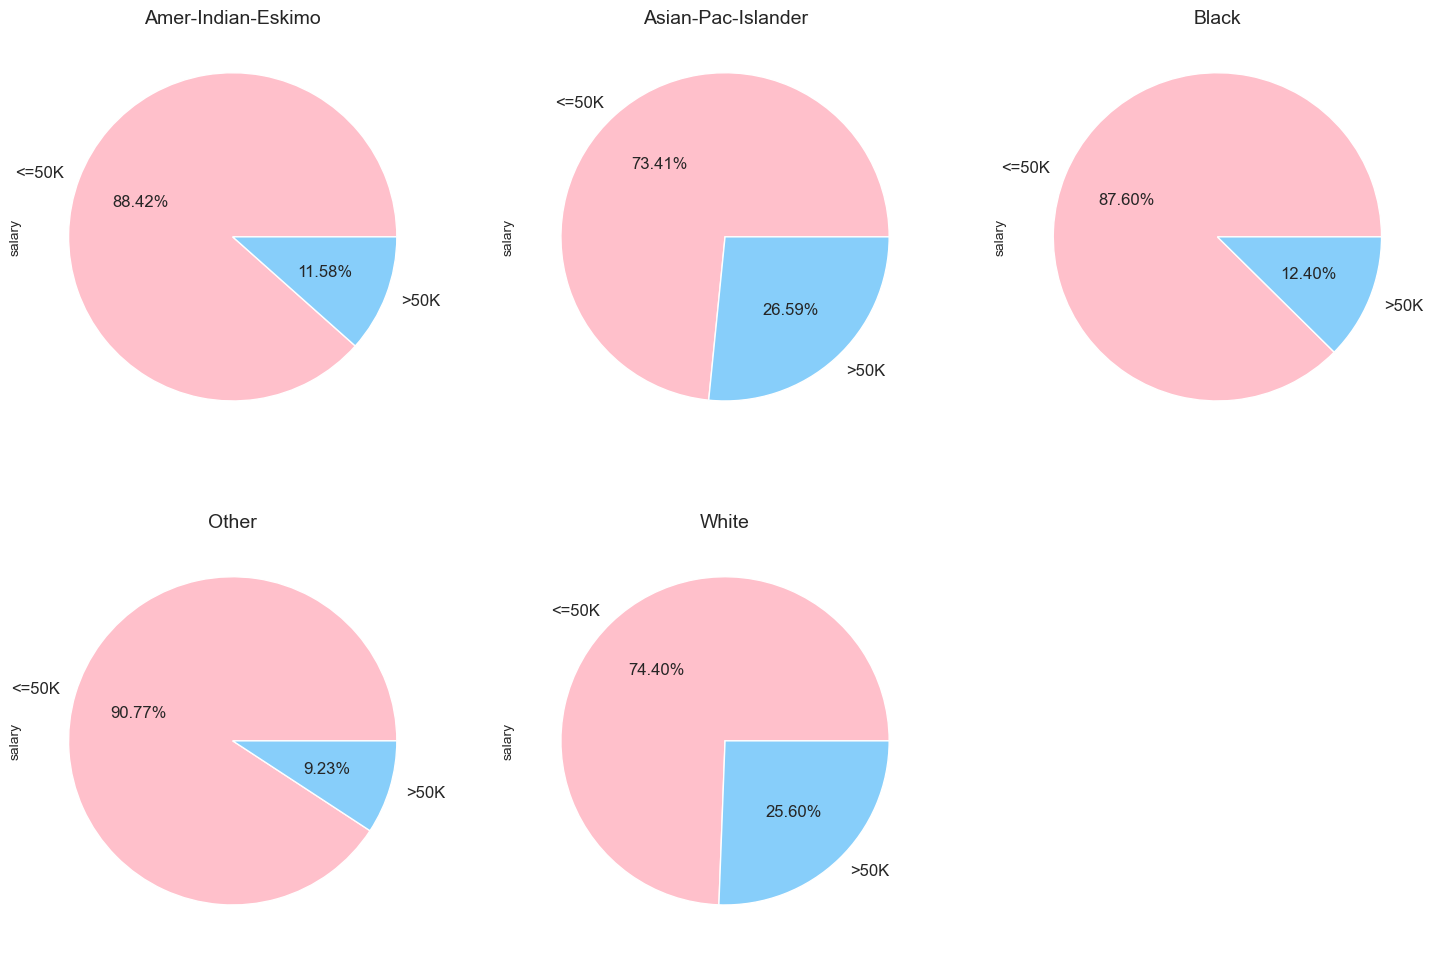

In [156]:
plt.figure(figsize = (18, 12))
index = 1
for i in [0, 2, 4, 6, 8]:
    plt.subplot(2,3,index)
    race[i:i+2].plot.pie(subplots=True,
                         labels=["<=50K", ">50K"],
                         autopct="%.2f%%",
                         textprops={'fontsize': 12},
                         colors=['pink', 'lightskyblue'],
                         )
    plt.title(race.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

*Check the count of person in each races by "salary" levels and visualize it with countplot*

In [157]:
df.groupby("salary").race.value_counts()

salary  race              
<=50K   White                 20680
        Black                  2735
        Asian-Pac-Islander      762
        Amer-Indian-Eskimo      275
        Other                   246
>50K    White                  7115
        Black                   387
        Asian-Pac-Islander      276
        Amer-Indian-Eskimo       36
        Other                    25
Name: race, dtype: int64

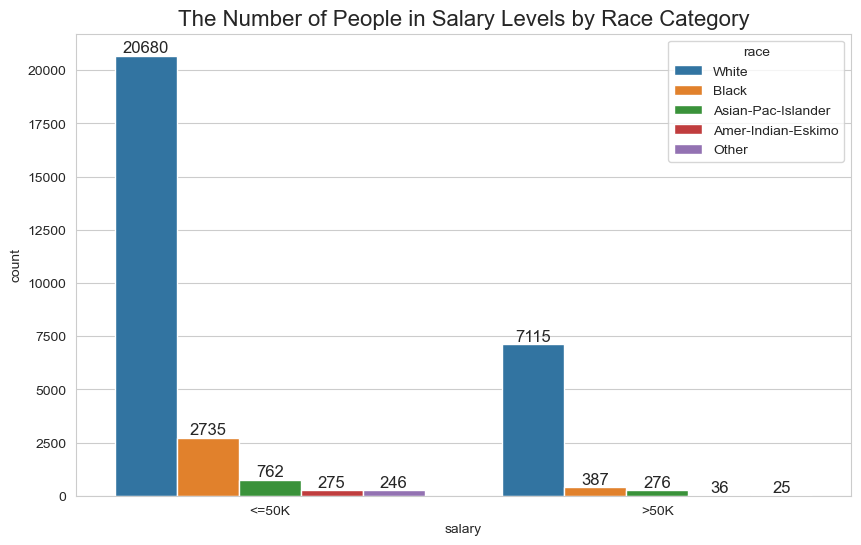

In [158]:
ax = sns.countplot(data=df, x="salary", hue="race")

plt.title("The Number of People in Salary Levels by Race Category", fontsize=16);
for container in ax.containers:
    ax.bar_label(container, fontsize=12);

*Check the the percentage distribution of person in each races by "salary" levels and visualize it with bar plot*

In [159]:
race = df.groupby("salary").race.value_counts(normalize=True)
race

salary  race              
<=50K   White                0.837
        Black                0.111
        Asian-Pac-Islander   0.031
        Amer-Indian-Eskimo   0.011
        Other                0.010
>50K    White                0.908
        Black                0.049
        Asian-Pac-Islander   0.035
        Amer-Indian-Eskimo   0.005
        Other                0.003
Name: race, dtype: float64

In [160]:
race_df = pd.DataFrame(race)
race_df.rename(columns = {"race" : "percentage"}, inplace = True)
race_df.reset_index(inplace = True)
race_df.sort_values(by = ["salary", "race"], inplace=True)
race_df

salary                race  percentage
3  <=50K  Amer-Indian-Eskimo       0.011
2  <=50K  Asian-Pac-Islander       0.031
1  <=50K               Black       0.111
4  <=50K               Other       0.010
0  <=50K               White       0.837
8   >50K  Amer-Indian-Eskimo       0.005
7   >50K  Asian-Pac-Islander       0.035
6   >50K               Black       0.049
9   >50K               Other       0.003
5   >50K               White       0.908

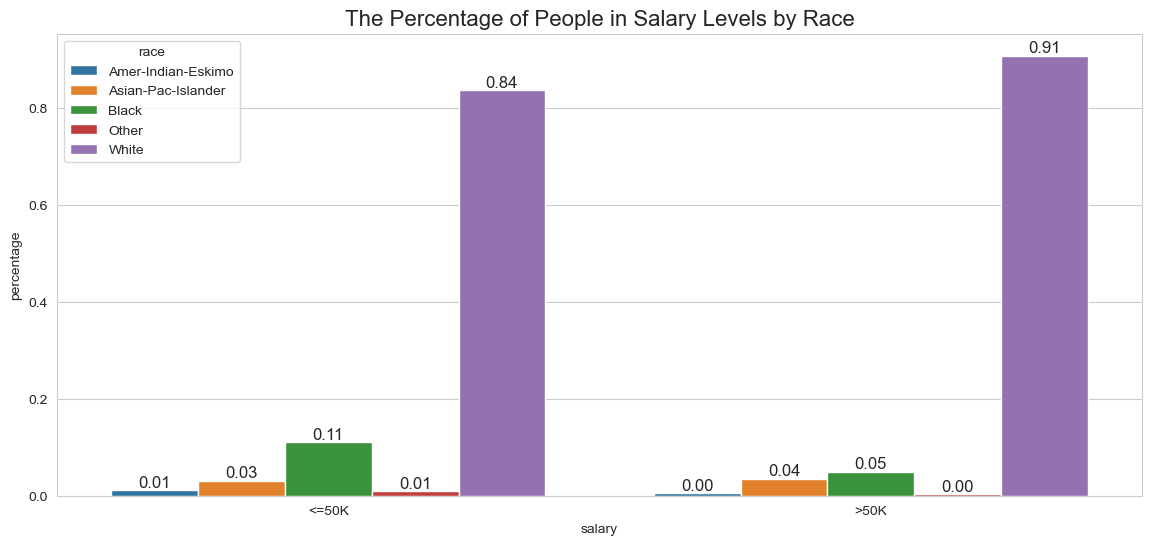

In [161]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=race_df, x="salary", y="percentage", hue="race")

plt.title("The Percentage of People in Salary Levels by Race", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

**Result :** "Asian-Pac-Islander" and "White" races has a high ratio in the self group about high-level income. "White" race has a high ratio in the high-income group about high-level income.

**-------------------**

**gender**

*Check the count of person in each gender and visualize it with countplot*

In [162]:
df.gender.value_counts(dropna=False)

Male      21775
Female    10762
Name: gender, dtype: int64

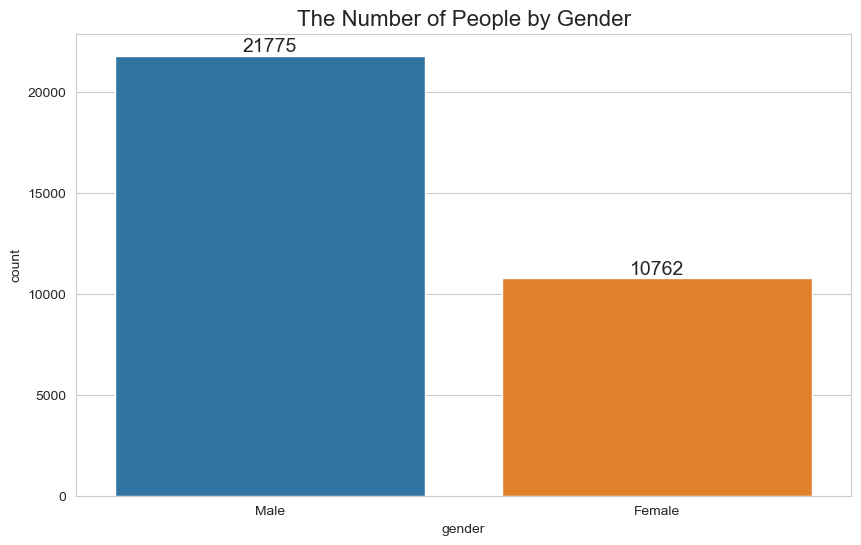

In [163]:
ax = sns.countplot(data=df, x="gender")

plt.title("The Number of People by Gender", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=14);

*Check the count of person in each "salary" levels by gender and visualize it with countplot*

In [164]:
df.groupby("gender").salary.value_counts()

gender  salary
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: salary, dtype: int64

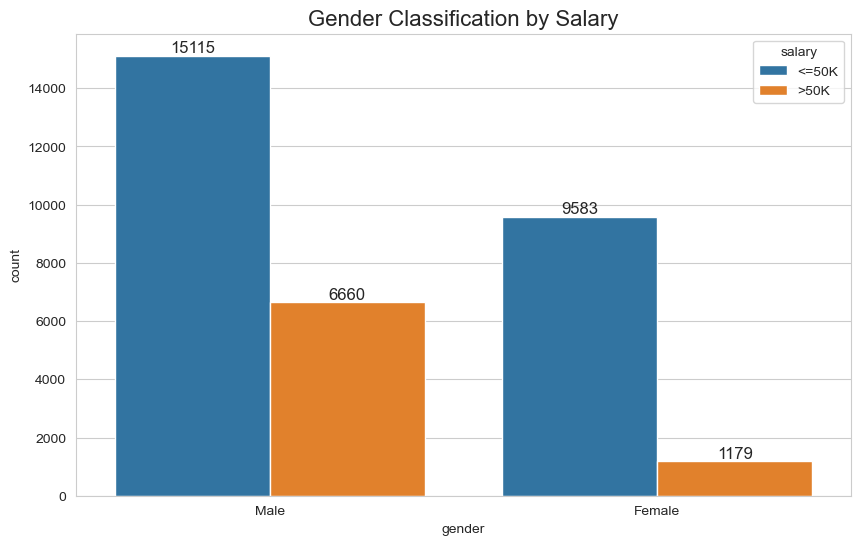

In [165]:
ax = sns.countplot(data=df, x="gender", hue="salary")

plt.title("Gender Classification by Salary", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

*Check the percentage distribution of person in each "salary" levels by each gender and visualize it with pie plot*

In [166]:
gender = df.groupby("gender").salary.value_counts(normalize=True)
gender

gender  salary
Female  <=50K    0.890
        >50K     0.110
Male    <=50K    0.694
        >50K     0.306
Name: salary, dtype: float64

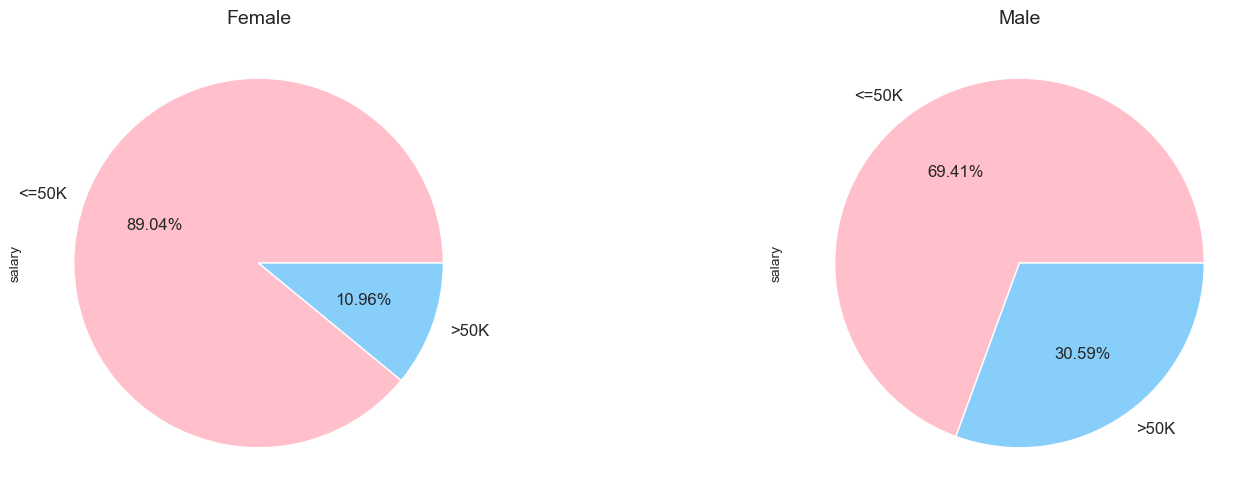

In [167]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    gender[i:i+2].plot.pie(subplots=True,
                           labels=["<=50K", ">50K"],
                           autopct="%.2f%%",
                           textprops={'fontsize': 12},
                           colors=['pink', 'lightskyblue'],
                           )
    plt.title(gender.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

*Check the count of person in each gender by "salary" levels and visualize it with countplot*

In [169]:
df.groupby("salary").gender.value_counts()

salary  gender
<=50K   Male      15115
        Female     9583
>50K    Male       6660
        Female     1179
Name: gender, dtype: int64

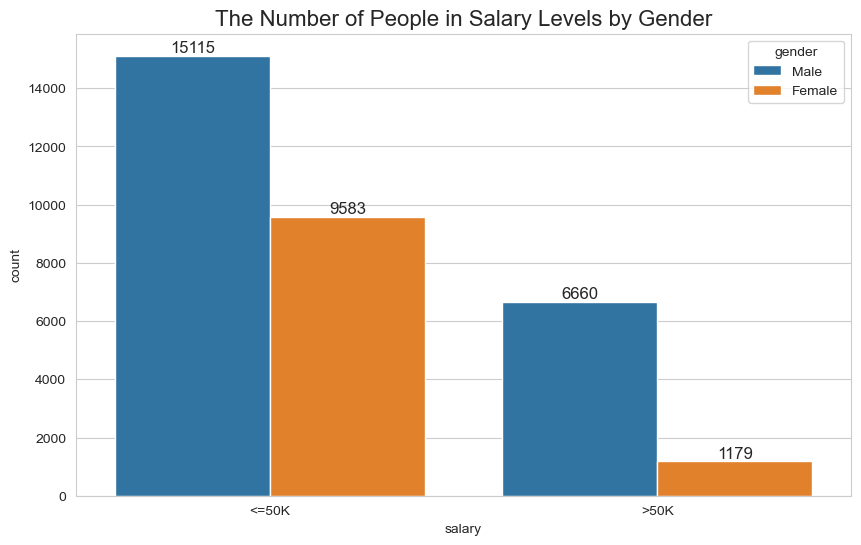

In [170]:
ax = sns.countplot(data=df, x="salary", hue="gender")

plt.title("The Number of People in Salary Levels by Gender", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

*Check the the percentage distribution of person in each gender by "salary" levels and visualize it with pie plot*

In [171]:
gender = df.groupby("salary").gender.value_counts(normalize=True)
gender

salary  gender
<=50K   Male     0.612
        Female   0.388
>50K    Male     0.850
        Female   0.150
Name: gender, dtype: float64

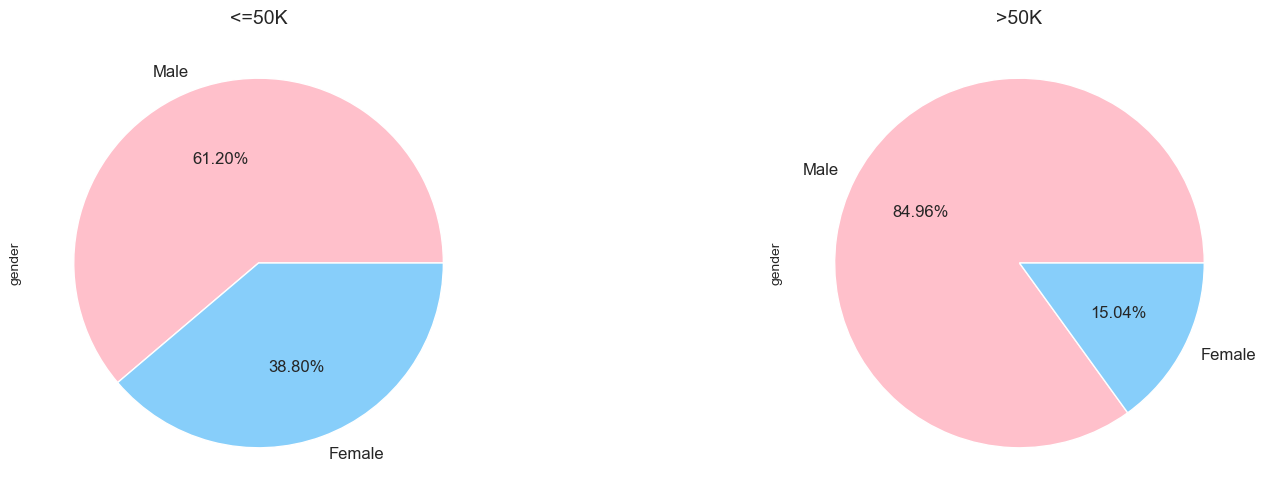

In [172]:
plt.figure(figsize=(18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    gender[i:i+2].plot.pie(subplots=True,
                         labels=["Male", "Female"],
                         autopct="%.2f%%",
                         textprops={'fontsize': 12},
                         colors=['pink', 'lightskyblue'],
                         )
    plt.title(gender.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Result :** We can easily say that males have earned more income than females.

**-----------------**

**native_country**

*Check the count of person in each categories and visualize it with countplot*

In [173]:
df.native_country.value_counts(dropna=False)

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

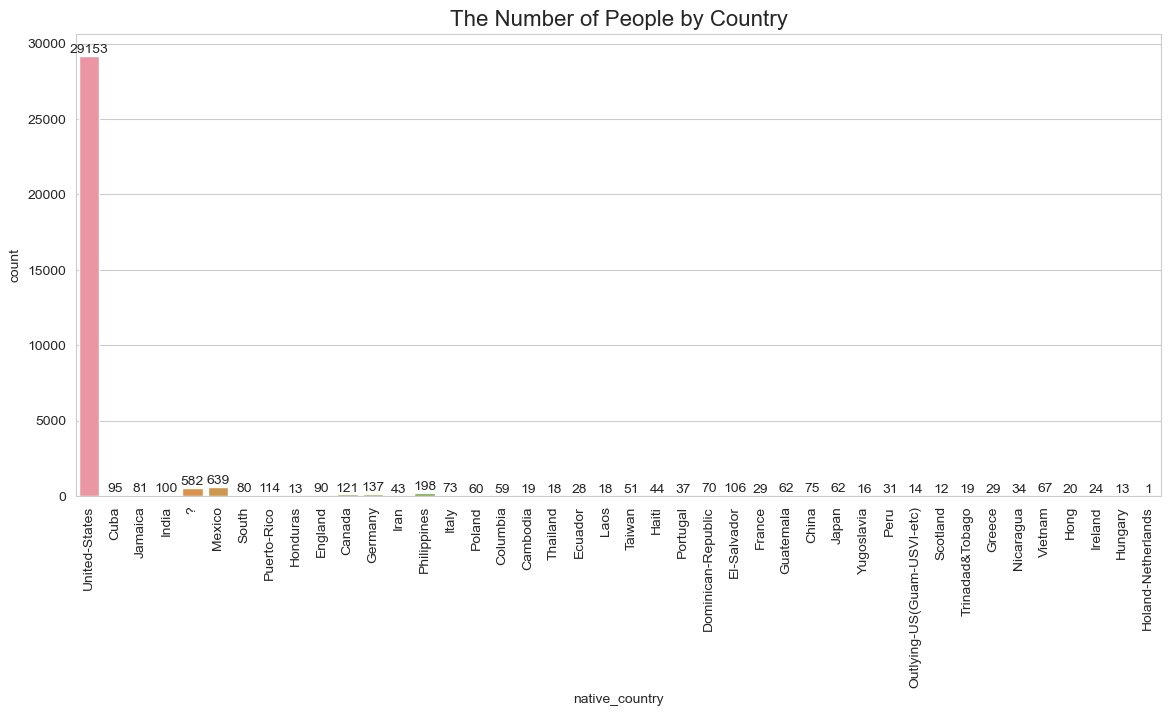

In [174]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(data=df, x="native_country")

plt.title("The Number of People by Country", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

*Replace the value "?" to the value "Unknown"*

In [175]:
# Replace "?" values with "Unknown"

df.native_country.replace("?", "Unknown", inplace = True)

*Decrease the number of categories in "native_country" feature as US, and Others and create a new feature with this new categorical data*

In [176]:
def mapping_native_country(x):
    if x == "United-States":
        return "US"
    else:
        return "Others"

In [177]:
df.native_country.apply(mapping_native_country).value_counts(dropna=False)

US        29153
Others     3384
Name: native_country, dtype: int64

In [178]:
# By using "mapping_native_country" def function above, create a new column named "native_country_summary"

df["native_country_summary"] = df.native_country.apply(mapping_native_country)
df["native_country_summary"]

0            US
1            US
2            US
3            US
4        Others
          ...  
32556        US
32557        US
32558        US
32559        US
32560        US
Name: native_country_summary, Length: 32537, dtype: object

*Visualize the count of person in each new categories (US, Others)*

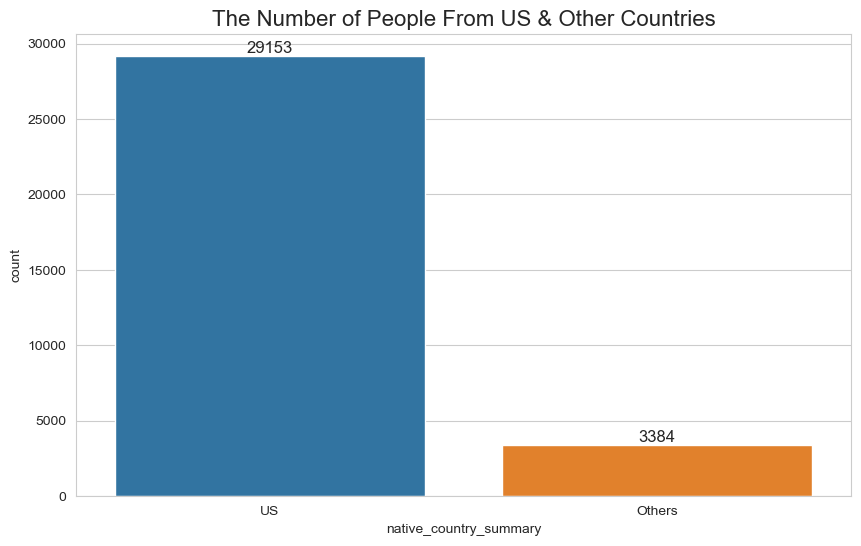

In [179]:
ax = sns.countplot(data=df, x="native_country_summary")

plt.title("The Number of People From US & Other Countries", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

*Check the count of person in each "salary" levels by these new native countries (US, Others) and visualize it with countplot*

In [180]:
df.groupby("native_country_summary").salary.value_counts()

native_country_summary  salary
Others                  <=50K      2714
                        >50K        670
US                      <=50K     21984
                        >50K       7169
Name: salary, dtype: int64

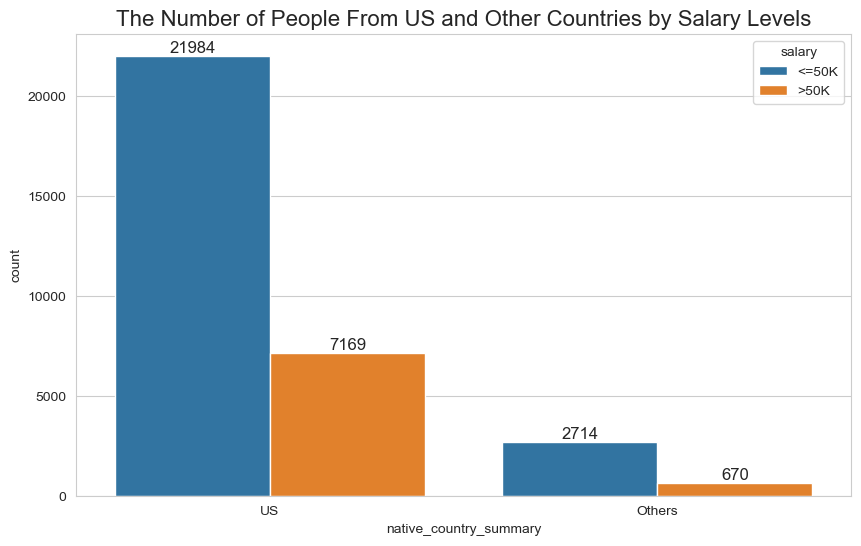

In [181]:
ax = sns.countplot(data=df, x="native_country_summary", hue="salary")

plt.title("The Number of People From US and Other Countries by Salary Levels", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

*Check the percentage distribution of person in each "salary" levels by each new native countries (US, Others) and visualize it with pie plot separately*

In [182]:
country = df.groupby(["native_country_summary"]).salary.value_counts(normalize=True)
country

native_country_summary  salary
Others                  <=50K    0.802
                        >50K     0.198
US                      <=50K    0.754
                        >50K     0.246
Name: salary, dtype: float64

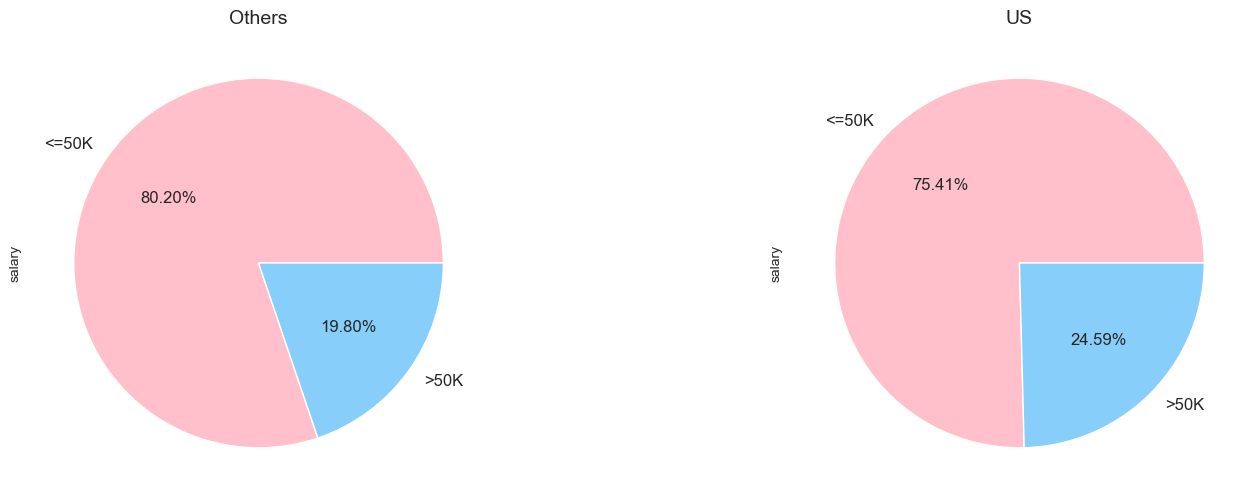

In [183]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    country[i:i+2].plot.pie(subplots=True,
                            labels=["<=50K", ">50K"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(country.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

*Check the count of person in each these new native countries (US, Others) by "salary" levels and visualize it with countplot*

In [184]:
df.groupby("salary").native_country_summary.value_counts()

salary  native_country_summary
<=50K   US                        21984
        Others                     2714
>50K    US                         7169
        Others                      670
Name: native_country_summary, dtype: int64

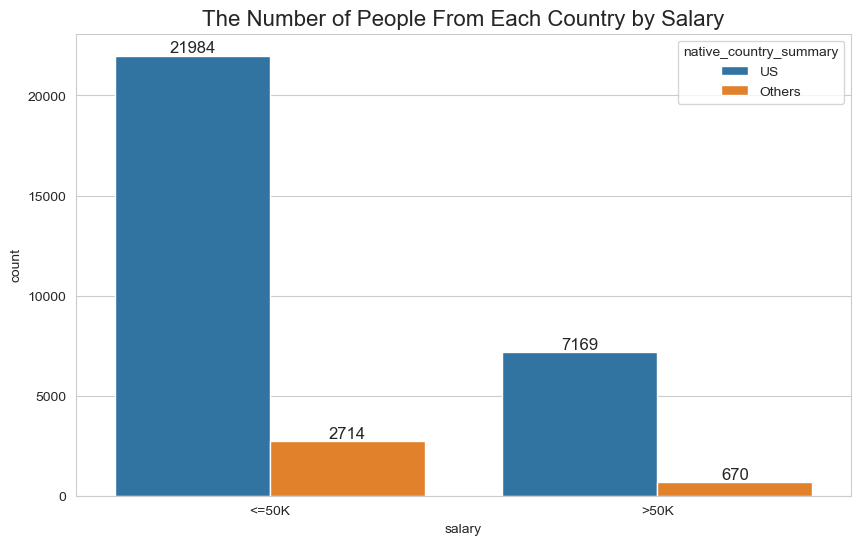

In [185]:
ax = sns.countplot(data=df, x="salary", hue="native_country_summary")

plt.title("The Number of People From Each Country by Salary", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

*Check the the percentage distribution of person in each these new native countries (US, Others) by "salary" levels and visualize it with pie plot separately*

In [186]:
country = df.groupby(["salary"]).native_country_summary.value_counts(normalize=True)
country

salary  native_country_summary
<=50K   US                       0.890
        Others                   0.110
>50K    US                       0.915
        Others                   0.085
Name: native_country_summary, dtype: float64

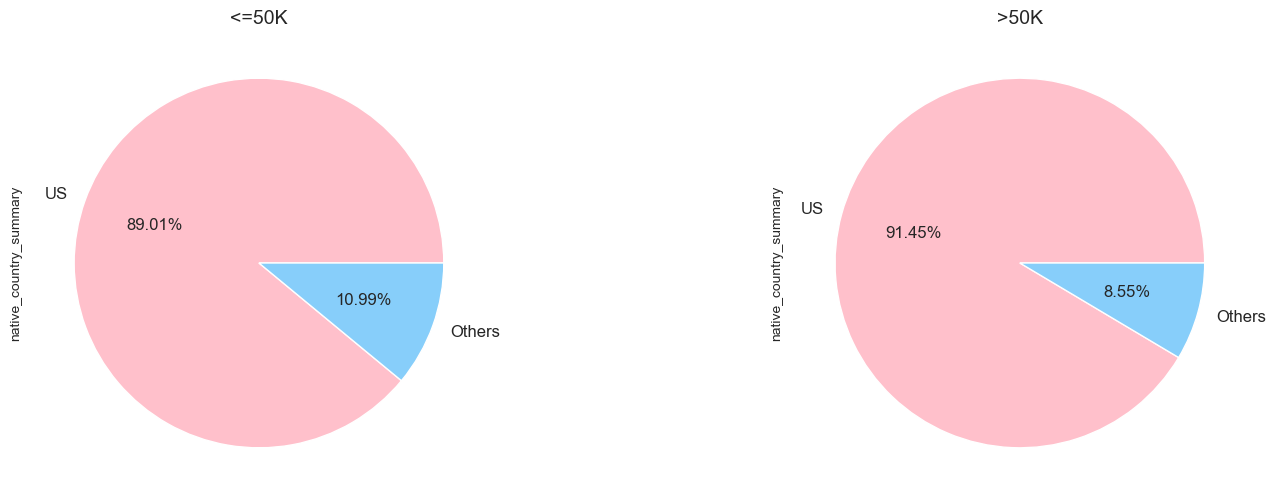

In [187]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    country[i:i+2].plot.pie(subplots=True,
                            labels=["US", "Others"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(country.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Result :** "United States" has a high ratio of high-level income both in the self group and in the high-income group.

<p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Other Specific Analysis Questions</p>

**1. What is the average age of males and females by income level?**

In [188]:
df.groupby(["salary", "gender"]).age.mean()

salary  gender
<=50K   Female   36.217
        Male     37.149
>50K    Female   42.126
        Male     44.627
Name: age, dtype: float64

In [189]:
type(df.groupby(["salary", "gender"]).age.mean())

pandas.core.series.Series

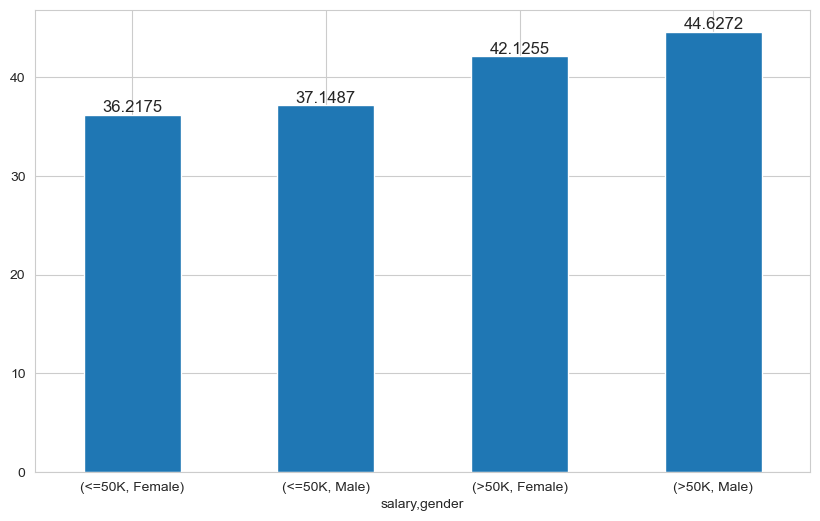

In [190]:
fig, ax = plt.subplots()

ax = df.groupby(["salary", "gender"]).age.mean().plot.bar()
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

In [191]:
age = df.groupby(["salary", "gender"])[["age"]].mean().reset_index()
age

salary  gender    age
0  <=50K  Female 36.217
1  <=50K    Male 37.149
2   >50K  Female 42.126
3   >50K    Male 44.627

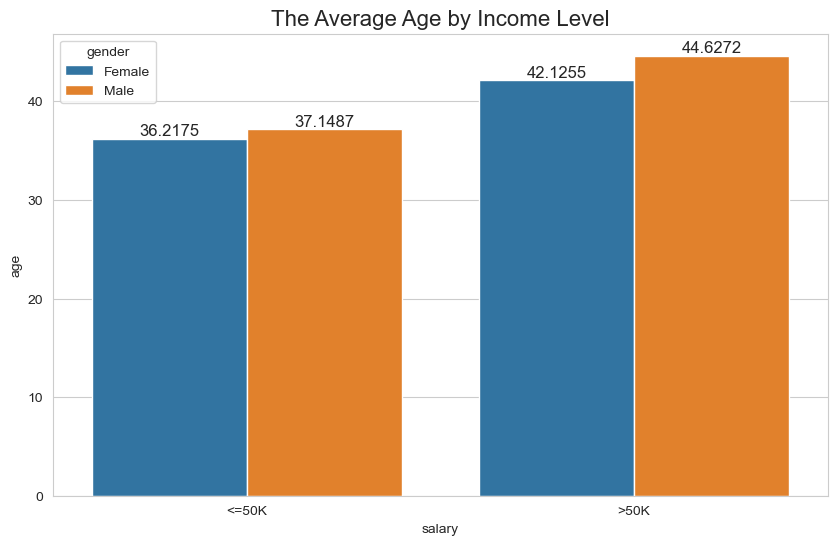

In [192]:
fig, ax = plt.subplots()

ax = sns.barplot(data=age, x="salary", y="age", hue="gender")

plt.title("The Average Age by Income Level", fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

**2. What is the workclass percentages of Americans in high-level income group?**

In [193]:
workclass_US = df[(df.salary == ">50K") & (df.native_country_summary == "US")].workclass.value_counts(dropna=False, normalize = True)*100
workclass_US

Private            63.314
Self-emp-not-inc    9.192
Local-gov           8.021
Self-emp-inc        7.784
Federal-gov         4.687
State-gov           4.547
Unknown             2.455
Name: workclass, dtype: float64

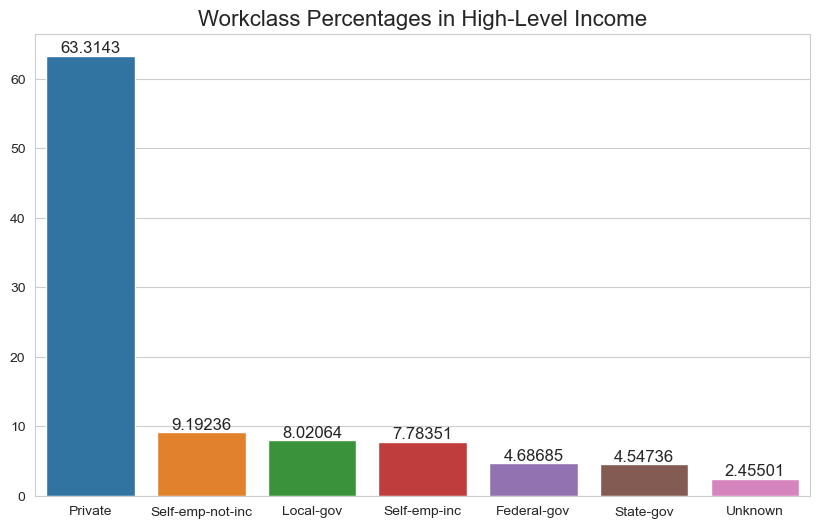

In [194]:
fig, ax = plt.subplots()

ax = sns.barplot(x=workclass_US.index, y=workclass_US.values)

plt.title("Workclass Percentages in High-Level Income", fontsize=16)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

**3. What is the occupation percentages of Americans who work as "Private" workclass in high-level income group?**

In [195]:
occupation_US = df[(df.salary == ">50K") & (df.native_country_summary == "US") & (df.workclass == "Private")]\
                  .occupation.value_counts(dropna=False, normalize=True)*100 
occupation_US

Exec-managerial     26.438
Prof-specialty      19.476
Craft-repair        14.695
Sales               14.475
Adm-clerical         6.389
Transport-moving     5.442
Tech-support         4.428
Machine-op-inspct    4.428
Other-service        1.674
Handlers-cleaners    1.344
Farming-fishing      0.595
Protective-serv      0.595
Priv-house-serv      0.022
Name: occupation, dtype: float64

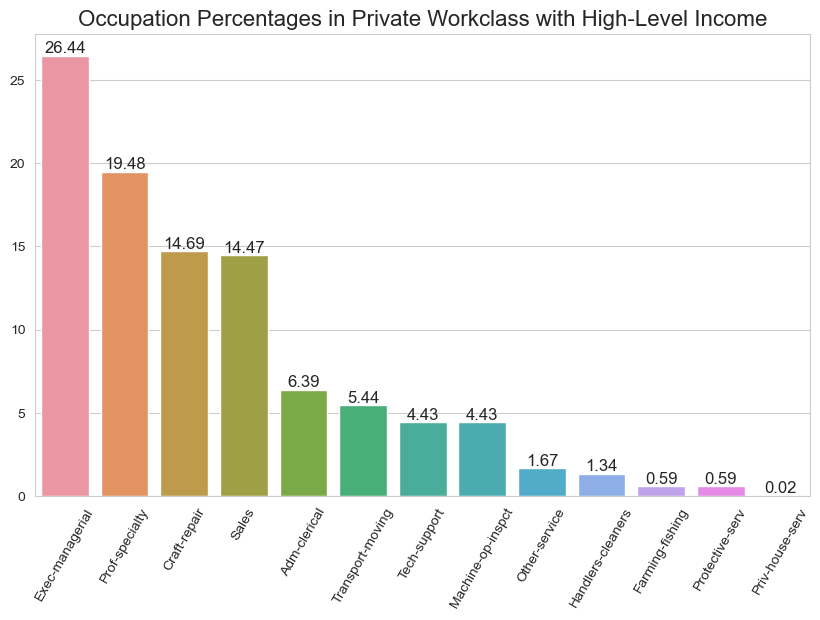

In [196]:
fig, ax = plt.subplots()

ax = sns.barplot(x=occupation_US.index, y=occupation_US.values)

plt.title("Occupation Percentages in Private Workclass with High-Level Income", fontsize=16)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

**4. What is the education level percentages of Asian-Pac-Islander race group in high-level income group?**

In [197]:
Asian_Pac_Islander = df[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander")]\
                     .education.value_counts(dropna = False, normalize=True)*100 
Asian_Pac_Islander

Bachelors      35.145
Masters        15.580
HS-grad        12.319
Some-college   11.957
Prof-school     9.783
Doctorate       6.522
Assoc-voc       3.261
Assoc-acdm      2.899
5th-6th         1.087
9th             0.362
11th            0.362
10th            0.362
12th            0.362
Name: education, dtype: float64

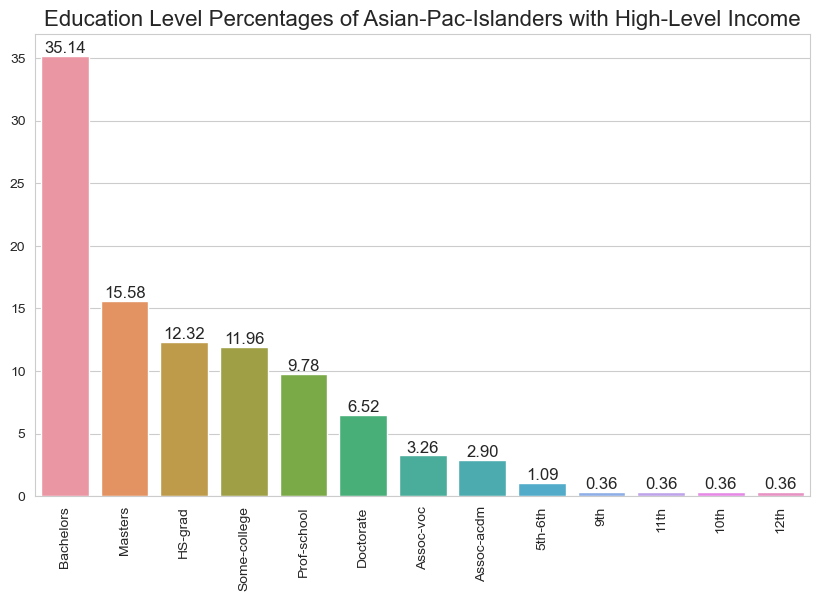

In [198]:
fig, ax = plt.subplots()

ax = sns.barplot(x = Asian_Pac_Islander.index, y = Asian_Pac_Islander.values)

plt.title("Education Level Percentages of Asian-Pac-Islanders with High-Level Income", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

In [199]:
df[df.race == "Asian-Pac-Islander"].education.value_counts(dropna = False, normalize = True) * 100

Bachelors      27.842
HS-grad        21.773
Some-college   19.942
Masters         8.478
Prof-school     3.950
Assoc-voc       3.661
Assoc-acdm      2.794
Doctorate       2.697
11th            2.023
5th-6th         1.734
10th            1.252
7th-8th         1.060
9th             0.867
12th            0.867
Preschool       0.578
1st-4th         0.482
Name: education, dtype: float64

**5. What is the occupation percentages of Asian-Pac-Islander race group who has a Bachelors degree in high-level income group?**

In [200]:
Asian_Pac_Islander = df[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander") & (df.education == "Bachelors")]\
                     .occupation.value_counts(dropna=False, normalize=True)*100 
Asian_Pac_Islander

Exec-managerial     27.835
Prof-specialty      25.773
Adm-clerical        12.371
Sales                9.278
Other-service        9.278
Craft-repair         7.216
Tech-support         3.093
Protective-serv      2.062
Transport-moving     1.031
Machine-op-inspct    1.031
Farming-fishing      1.031
Name: occupation, dtype: float64

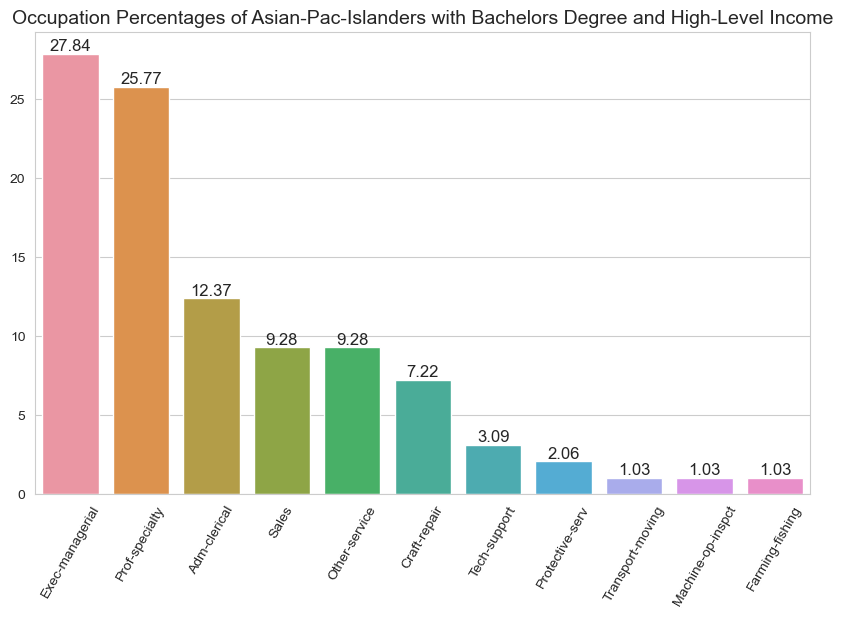

In [201]:
fig, ax = plt.subplots()

ax = sns.barplot(x = Asian_Pac_Islander.index, y = Asian_Pac_Islander.values)

plt.title("Occupation Percentages of Asian-Pac-Islanders with Bachelors Degree and High-Level Income", fontsize=14)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

**6. What is the mean of working hours per week by gender for education level, workclass and marital status? Try to plot all required in one figure.**

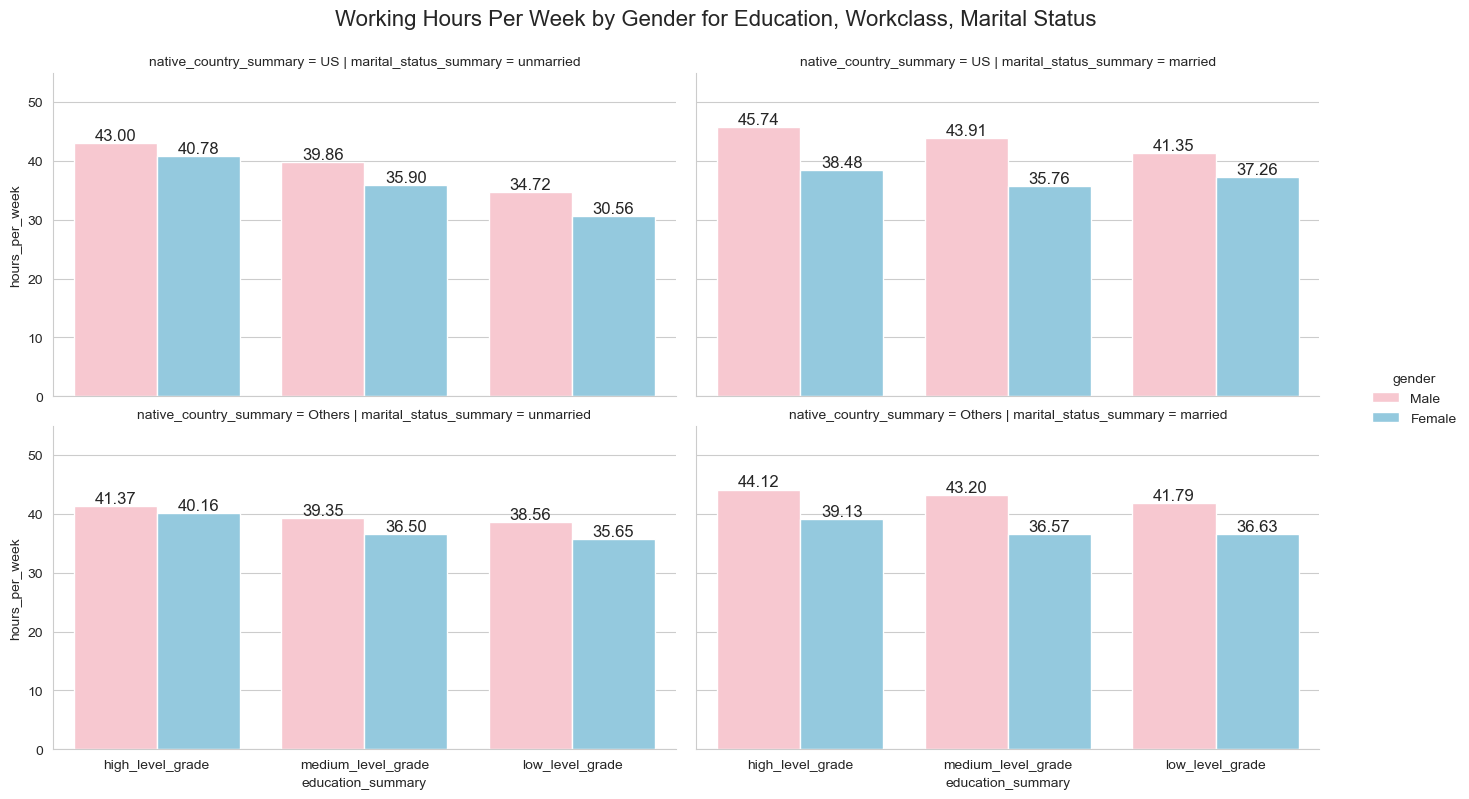

In [202]:
g = sns.catplot(x="education_summary",
                y="hours_per_week",
                data=df,
                kind="bar",
                estimator= np.mean,
                hue="gender",
                col="marital_status_summary",
                row="native_country_summary",
                ci=None,
                palette=sns.color_palette(['pink', 'skyblue']));

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Working Hours Per Week by Gender for Education, Workclass, Marital Status', fontsize=16)

# iterate through axes
for ax in g.axes.ravel():

    # add annotations
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", fontsize=12);
    
    ax.margins(y=0.2)

plt.show()